# SVM Impersonal

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import scipy.sparse as sp

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

from os import listdir, walk
from os.path import isfile, join, relpath

import scipy
from scipy.io import arff
import arff
from io import StringIO
import math
from sklearn.utils import shuffle
from prettytable import PrettyTable

In [3]:
def svm_feature_imp(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    #print(imp + names)
    #print(names[-10:])
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

svm_feature_imp and svm_feature function is used to plot the feature importance graph. Note: Only linear kernel can be used for this. 
Link Reference: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

In [4]:
def svm_feature(X,y):
    features_names = ["X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","Y0","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9","Z0","Z1","Z2","Z3","Z4","Z5","Z6","Z7","Z8","Z9","XAVG","YAVG","ZAVG","XPEAK","YPEAK","ZPEAK","XABSOLDEV","YABSOLDEV","ZABSOLDEV","XSTANDDEV","YSTANDDEV","ZSTANDDEV","RESULTANT"] 
    svm = sklearn.svm.SVC(kernel='linear')
    svm.fit(X, y.ravel())
    plt.figure(figsize=(20,10))
    names = svm_feature_imp(svm.coef_[0], features_names)

Calculating the TP, FP, FN, TN from the confusion matrix

In [5]:
def calculate_cf(confusion_mat, i=0, to_print=True):
    TP = confusion_mat[i,i]  
    FP = confusion_mat[:,i].sum() - TP  
    FN = confusion_mat[i,:].sum() - TP  
    TN = confusion_mat.sum().sum() - TP - FP - FN
    return TP, FP, FN, TN

Get the file list

In [6]:
file_dict = {0 : "Phone Accel" , 1:"Watch Accel", 2:"Phone Gyro", 3:"Watch Gyro"}

In [8]:
file1 = ["./data/transformed_data/phone/accel/" + f for f in listdir("./data/transformed_data/phone/accel/") if f.endswith('.csv')]
file2 = ["./data/transformed_data/watch/accel/" + f for f in listdir("./data/transformed_data/watch/accel/") if f.endswith('.csv')]
file3 = ["./data/transformed_data/phone/gyro/" + f for f in listdir("./data/transformed_data/phone/gyro/") if f.endswith('.csv')]
file4 = ["./data/transformed_data/watch/gyro/" + f for f in listdir("./data/transformed_data/watch/gyro/") if f.endswith('.csv')]
files = [file1] + [file2] + [file3] + [file4]
print (files)

[['./data/transformed_data/phone/accel/data_1600_accel_phone.csv', './data/transformed_data/phone/accel/data_1601_accel_phone.csv', './data/transformed_data/phone/accel/data_1602_accel_phone.csv', './data/transformed_data/phone/accel/data_1603_accel_phone.csv', './data/transformed_data/phone/accel/data_1604_accel_phone.csv', './data/transformed_data/phone/accel/data_1605_accel_phone.csv', './data/transformed_data/phone/accel/data_1606_accel_phone.csv', './data/transformed_data/phone/accel/data_1607_accel_phone.csv', './data/transformed_data/phone/accel/data_1608_accel_phone.csv', './data/transformed_data/phone/accel/data_1609_accel_phone.csv', './data/transformed_data/phone/accel/data_1610_accel_phone.csv', './data/transformed_data/phone/accel/data_1611_accel_phone.csv', './data/transformed_data/phone/accel/data_1612_accel_phone.csv', './data/transformed_data/phone/accel/data_1613_accel_phone.csv', './data/transformed_data/phone/accel/data_1615_accel_phone.csv', './data/transformed_dat

Activity names dictionary for printing the activity specific table

In [9]:
activity_names = {"A":"Walking","B":"Jogging","C":"Stairs","D":"Sitting","E":"Standing","F":"Typing","G":"Brushing Teeth","H":"Eating Soup","I":"Eating Chips","J":"Eating Pasta","K":"Drinking from Cup","L":"Eating Sandwich","M":"Kicking Soccer Ball","O":"Playing Catch w/Tennis Ball","P":"Dribblinlg (Basketball)","Q":"Writing","R":"Clapping","S":"Folding Clothes"}

(23074, 93)
[1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650]
Subject ID 1600:


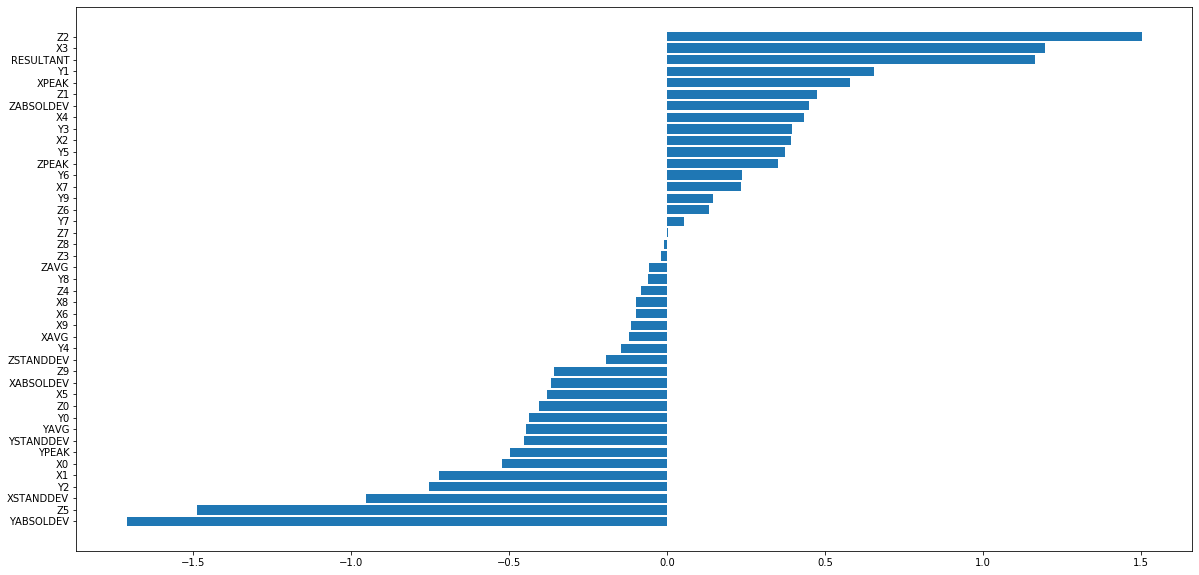

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  7  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


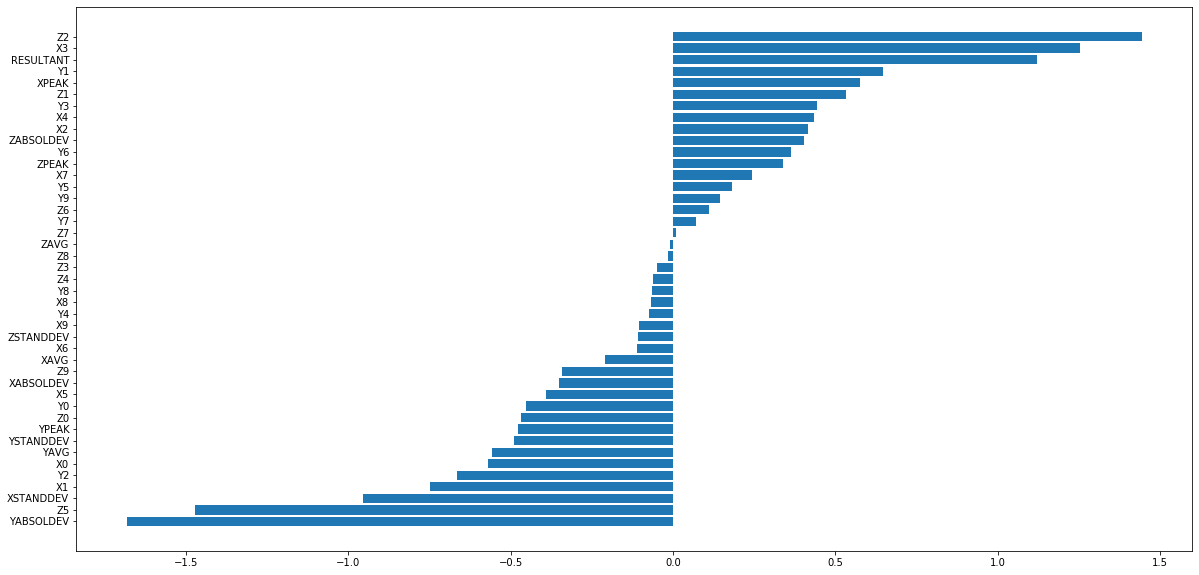

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


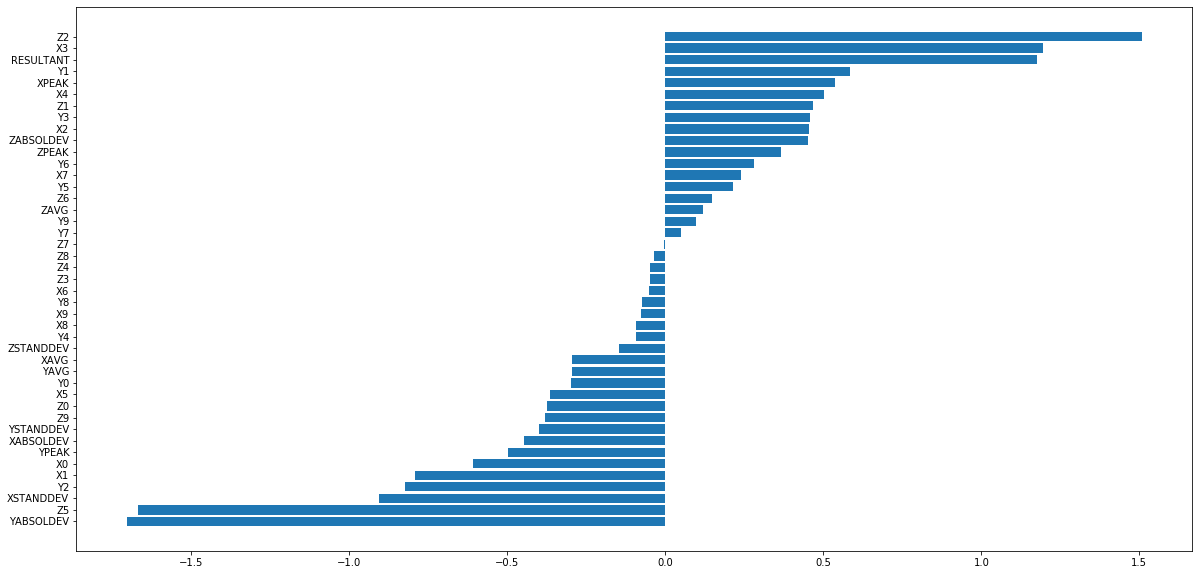

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


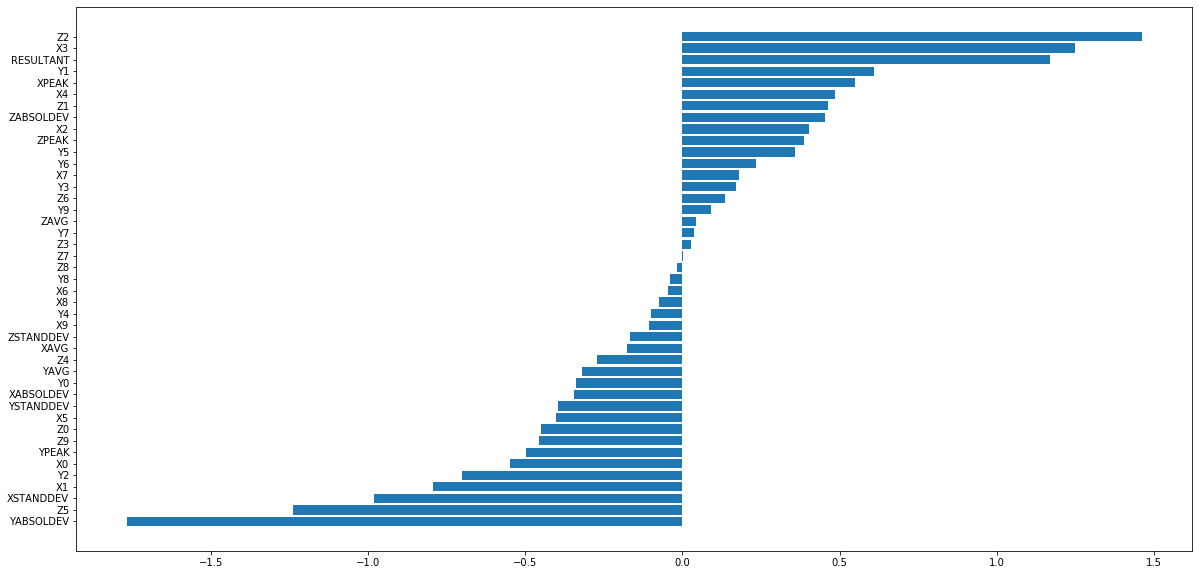

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  3  0  0  0  0  0 19  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14  8  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1604:


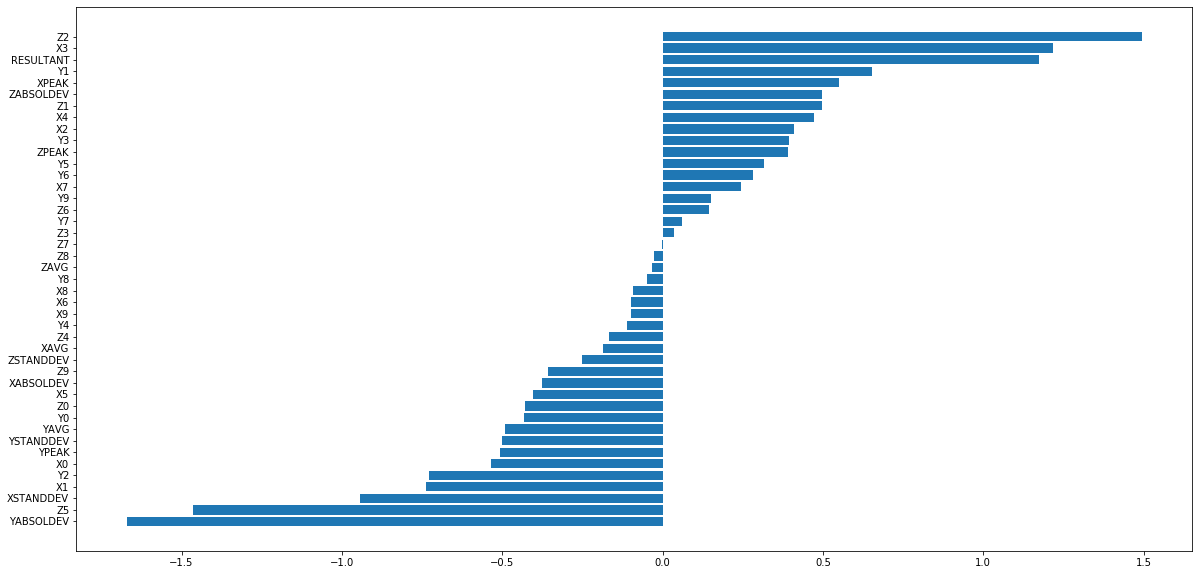

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  1  0  0  0  0  0 15  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 15  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  1  0  0  0  0  0]
 [ 8  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 14  0  0  0  0  0  3  0  0  0  0  0]
 [17  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0 16  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


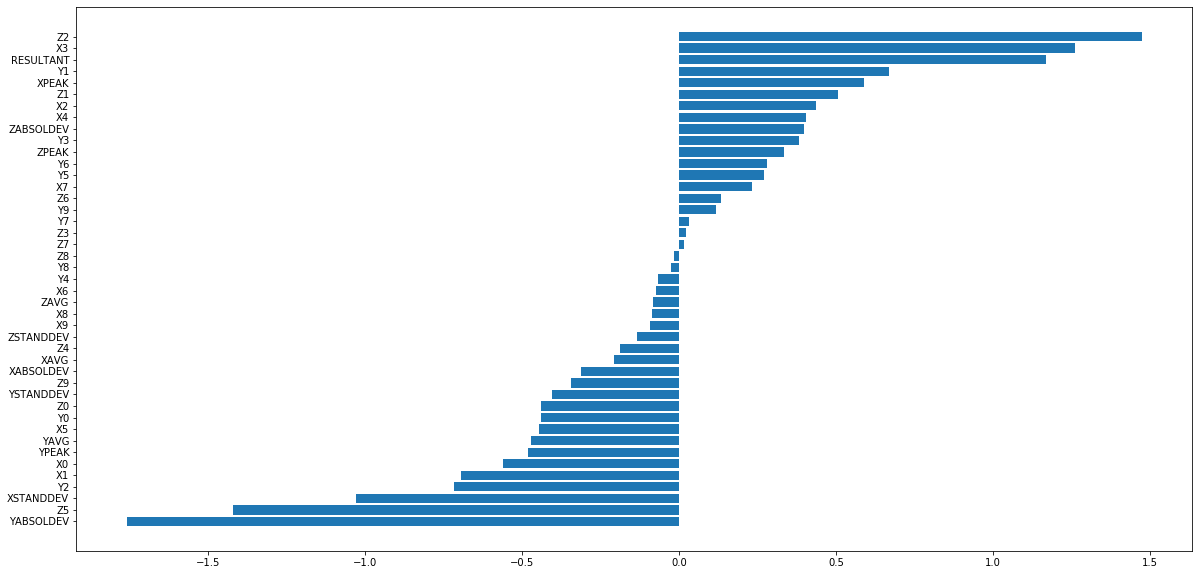

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 18  3  0  0  0  0]
 [ 2  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  5  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 1  0  0  0  0  0  5  0  0  0  0  0 16  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


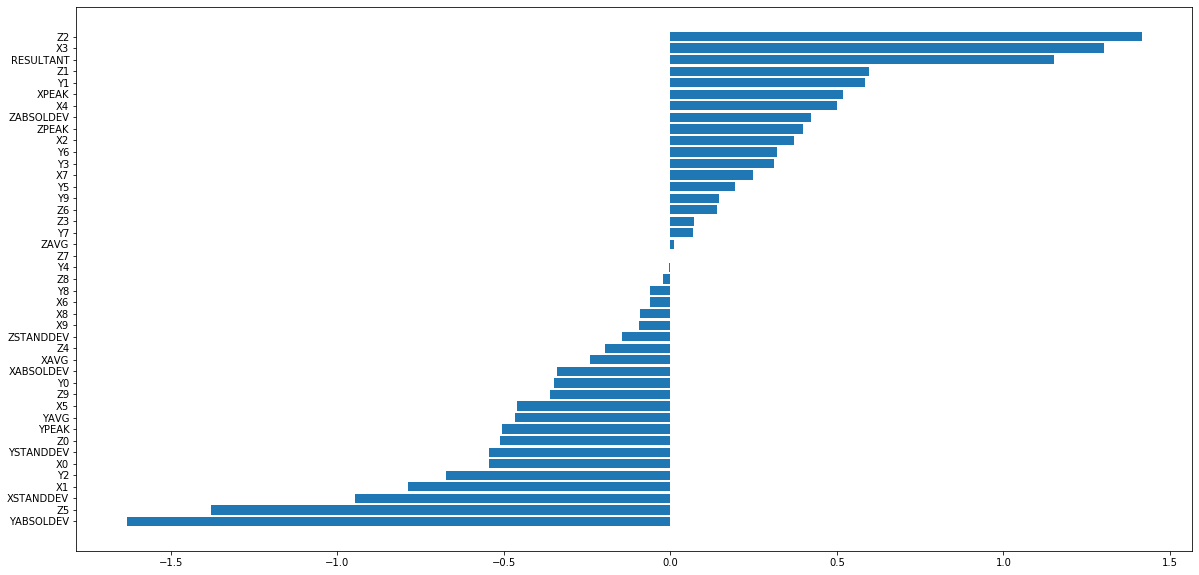

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


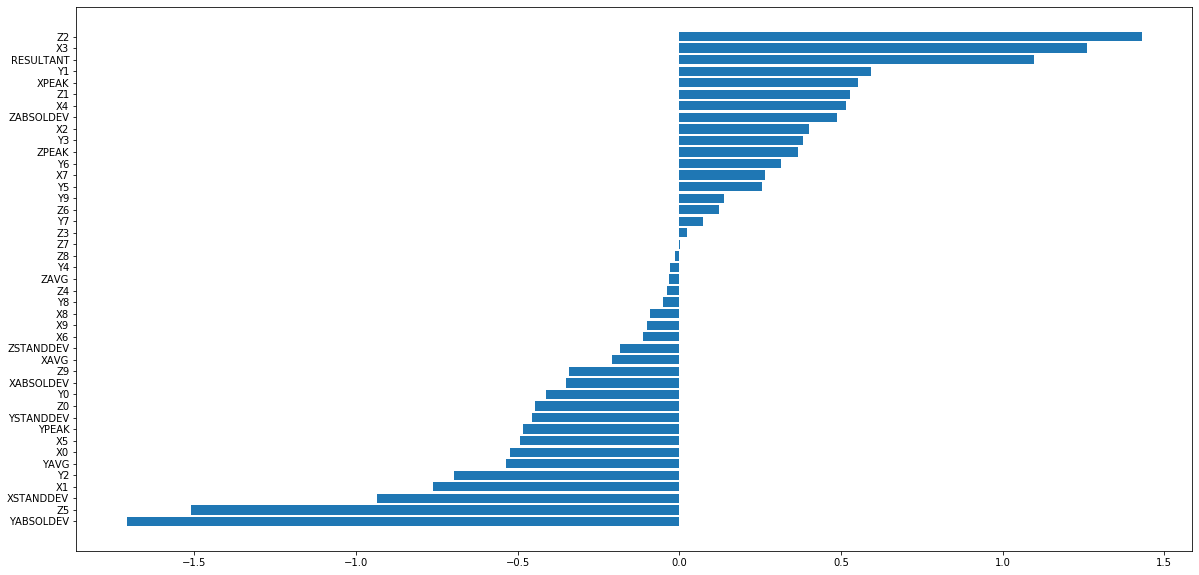

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [ 7  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.10   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


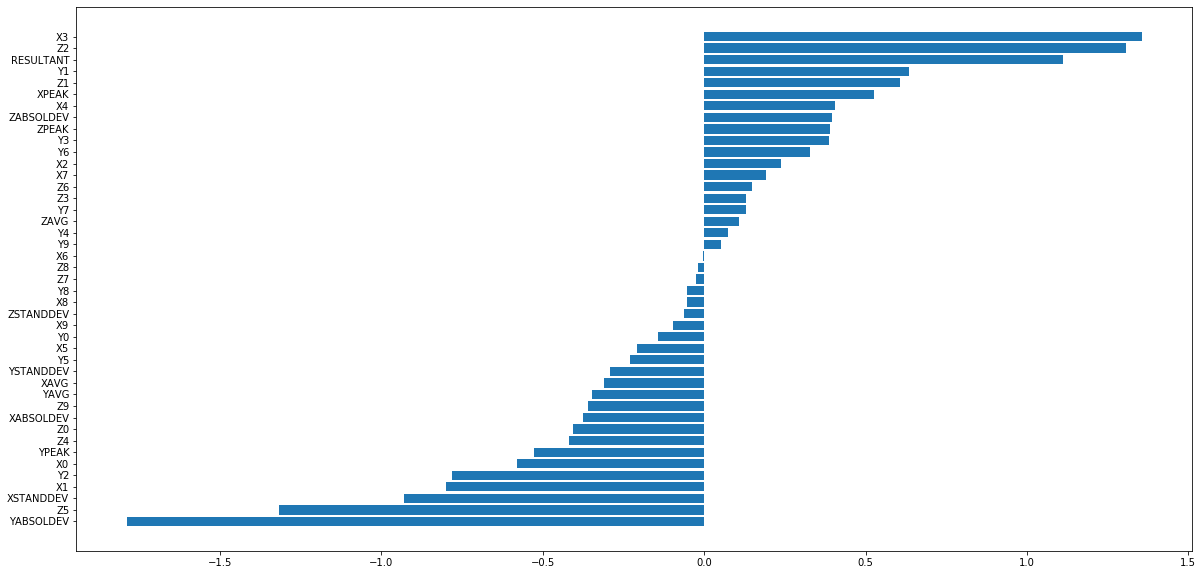

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [35 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 6  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 2  0  0  0  0  0  1  0  0  0  0  0 41  0  0  0  0  0]
 [36  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [41  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


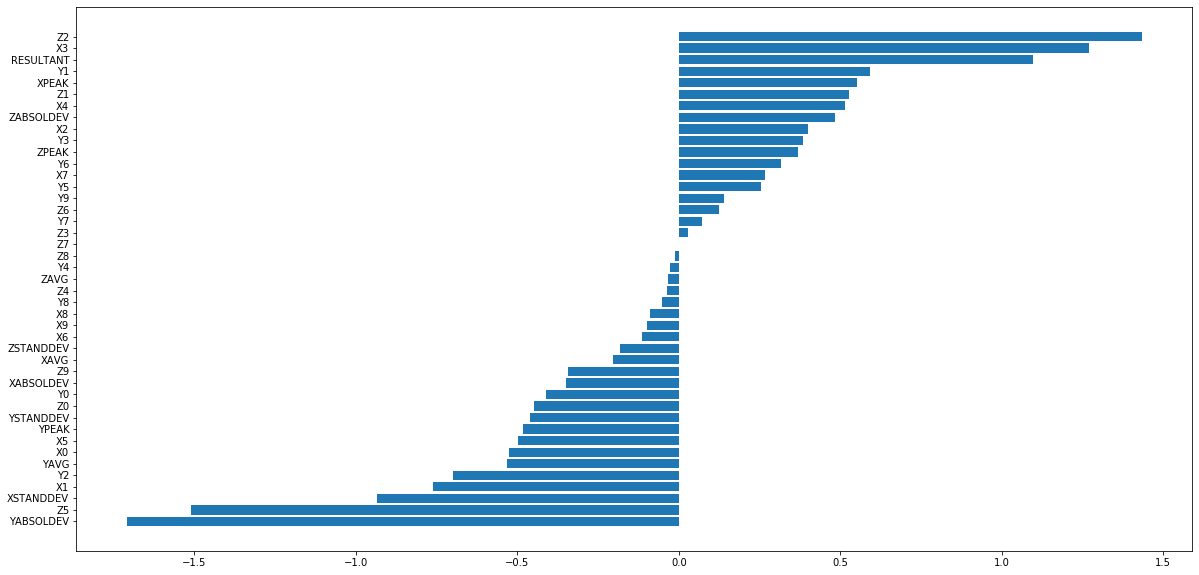

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 11  6  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  7  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 13  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  8  1  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 12  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.13   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


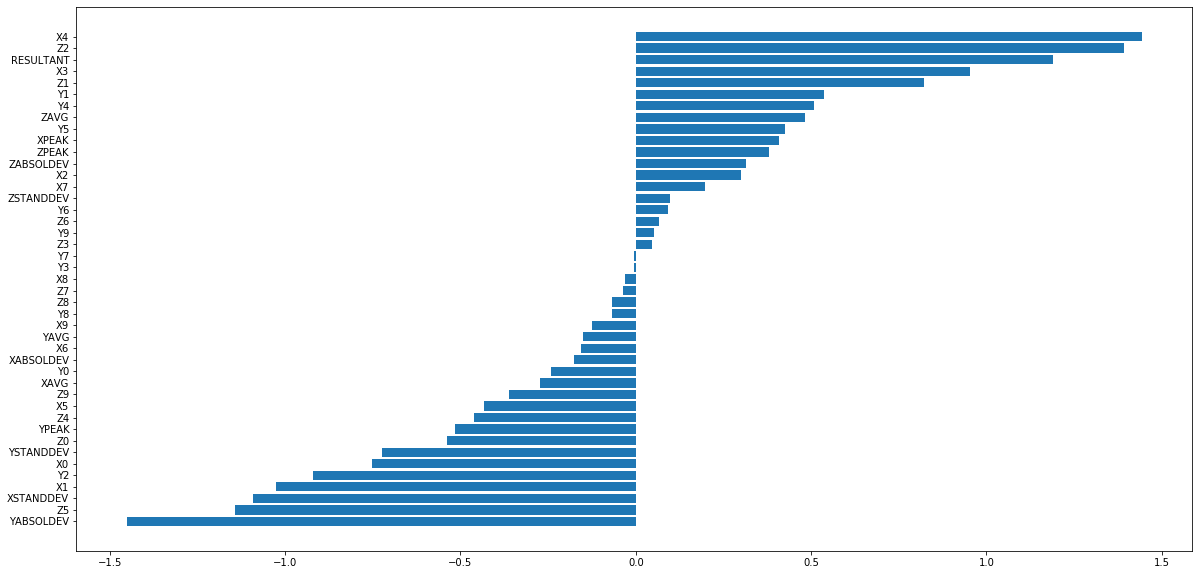

[[119   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [126  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [119   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0 119   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0 119   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0 119   0   0   0   0   0]
 [ 14  35   0   0   0   0  28   0   0   0   0   0  49   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 126   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   0   0   0 112   0   0   0   0   0   7   0   0   0   0   0]
 [  0   0   0   0   0   0 126   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  14   0   0   0   0   0 112   0   0   0   0   0]
 [315   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [315   0   0   0   0   0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1618:


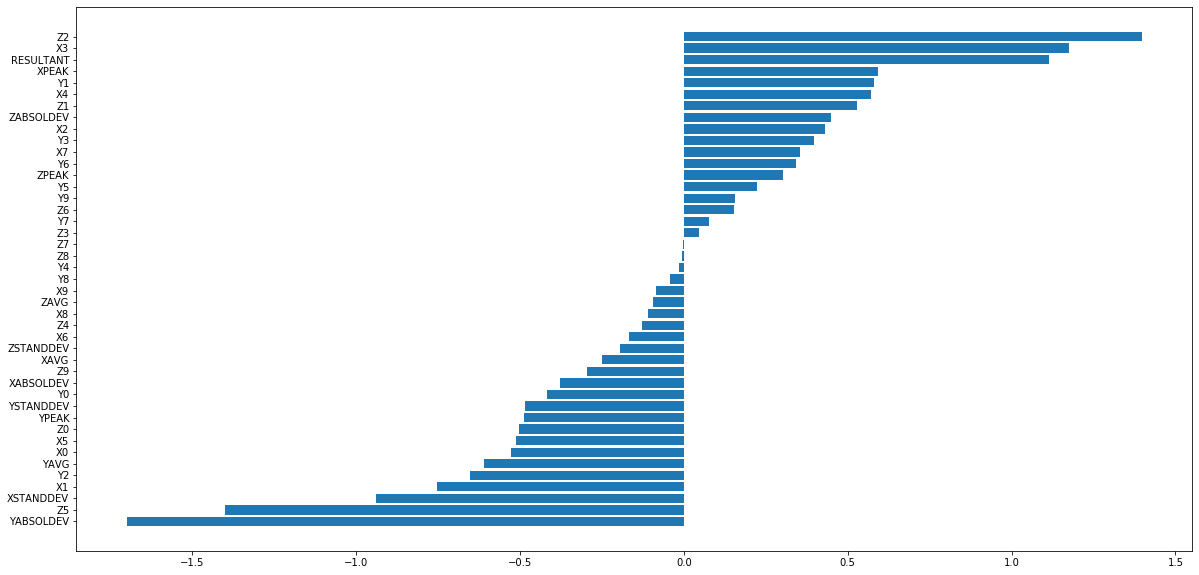

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.13   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


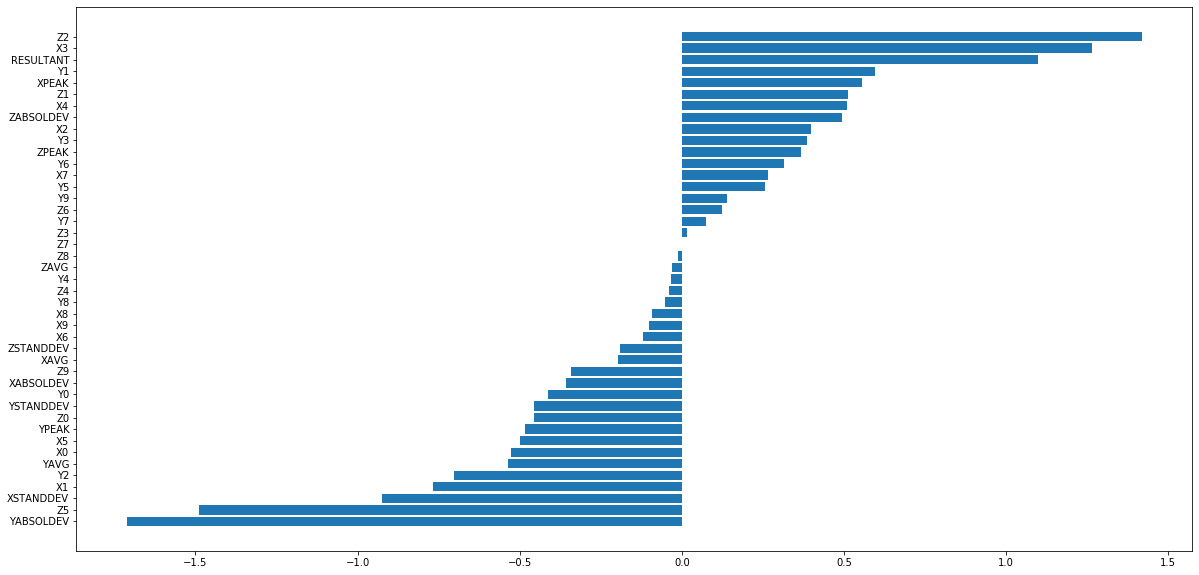

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


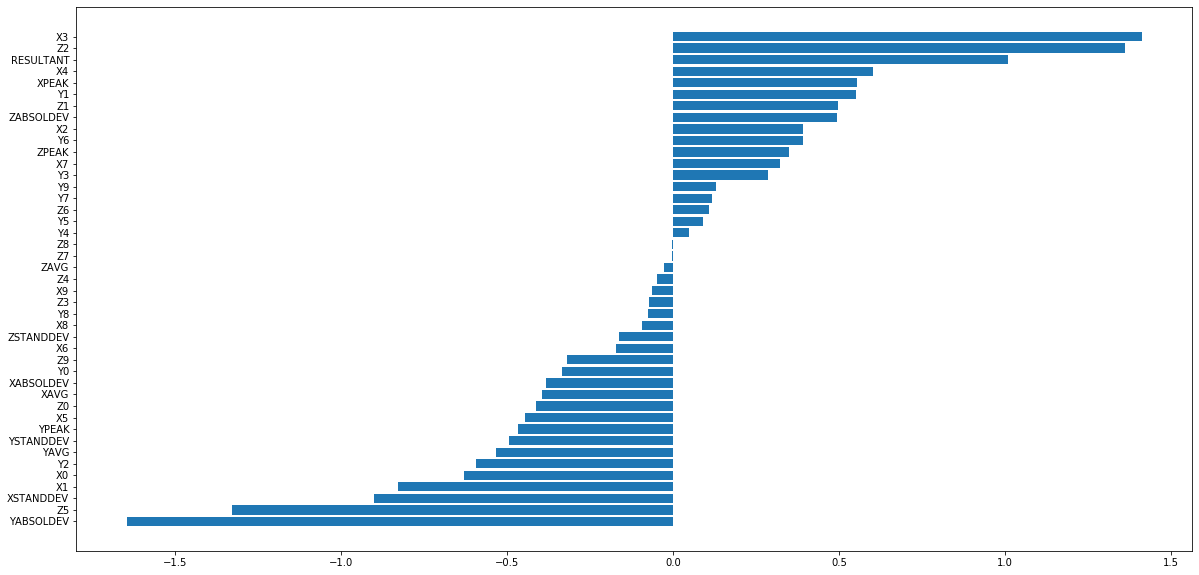

[[16  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 42  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0 30  0  0  0  0  0  4  8  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 43  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


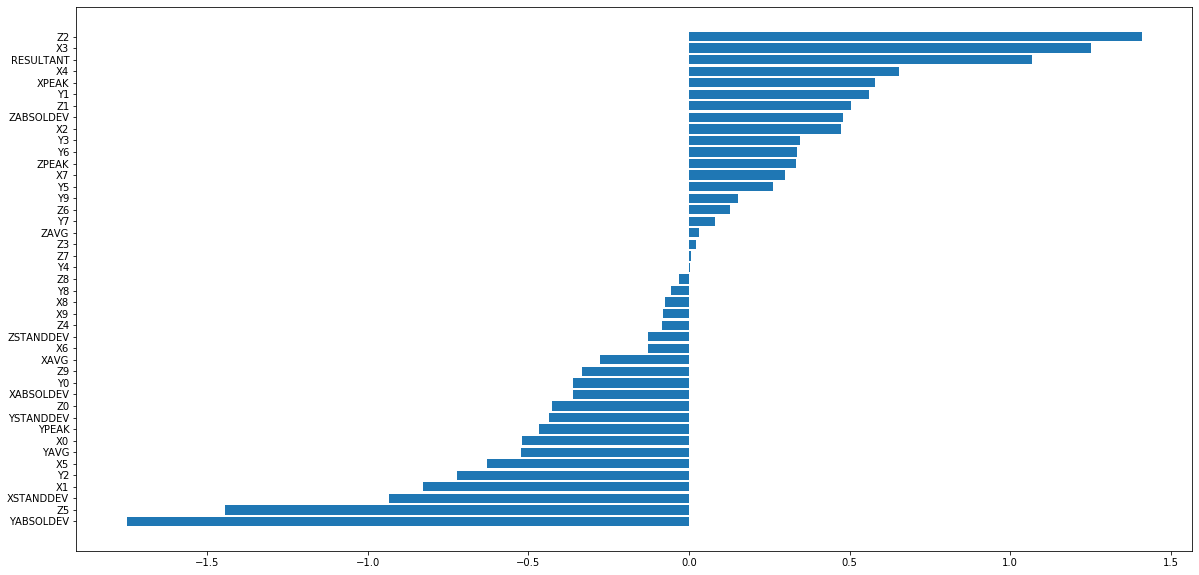

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 17  1  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


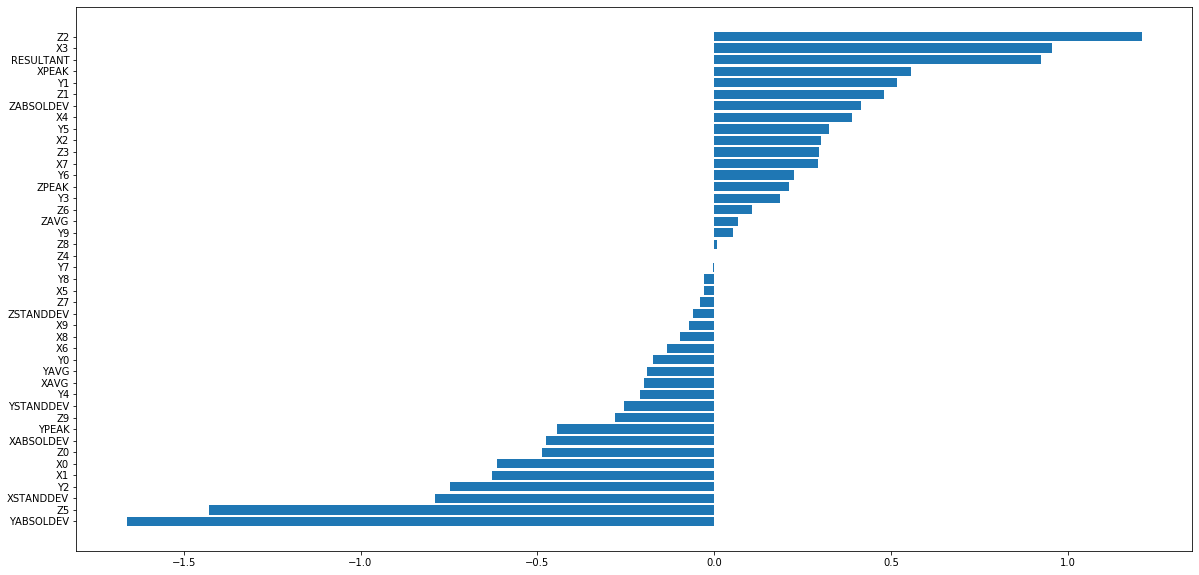

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


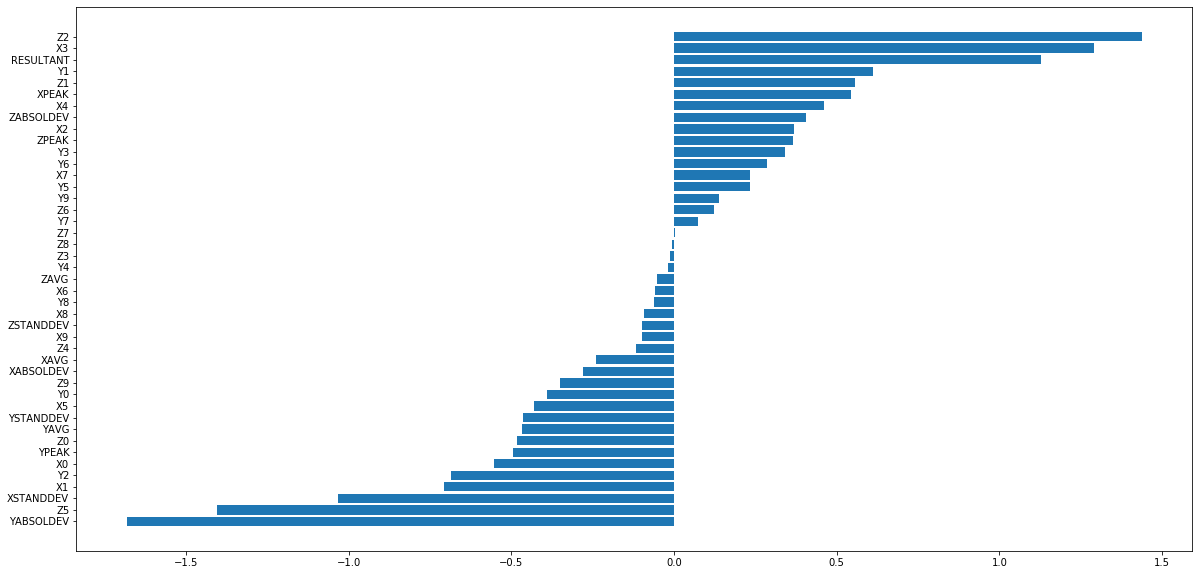

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26 17  1  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


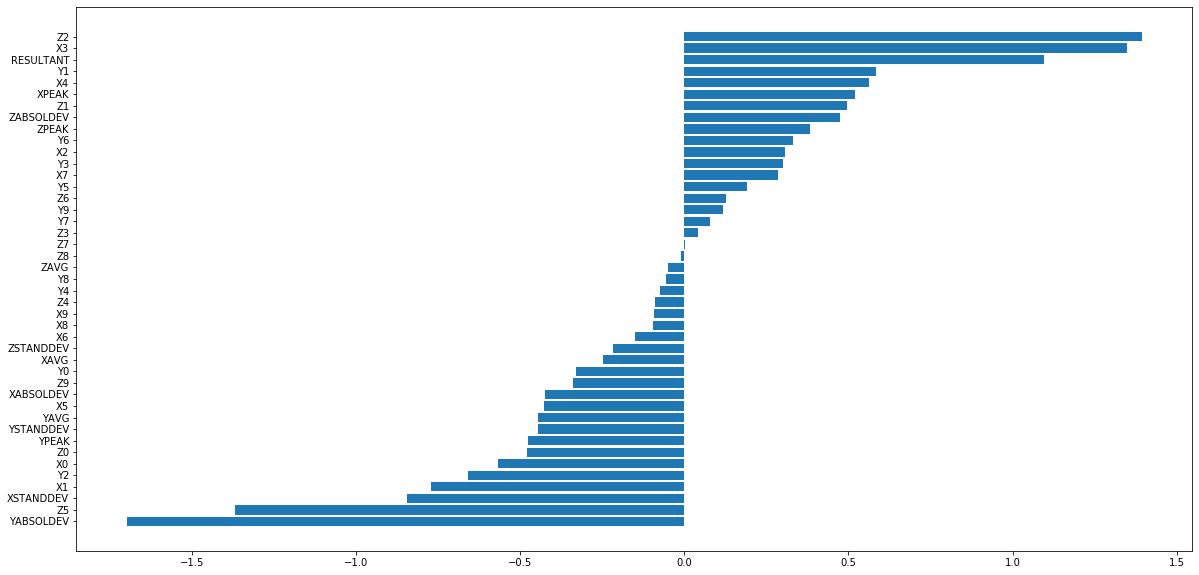

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  3 14  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  3  5  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 11  1  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 4  0  0  0  0  0  1  0  0  0  0  0  6  7  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  5 12  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


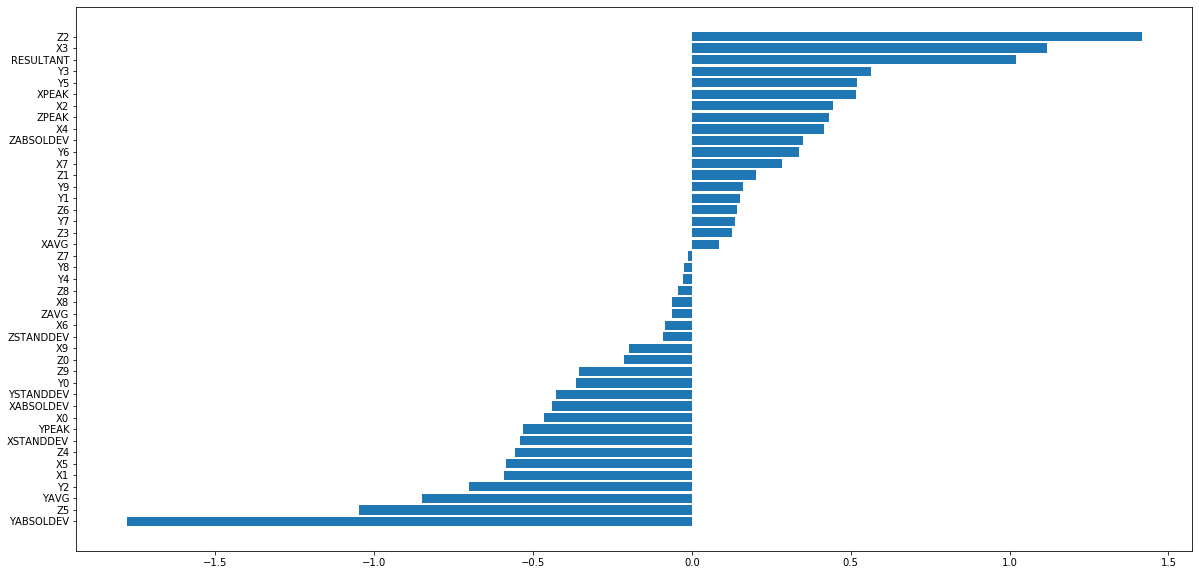

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [41  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 43  0  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


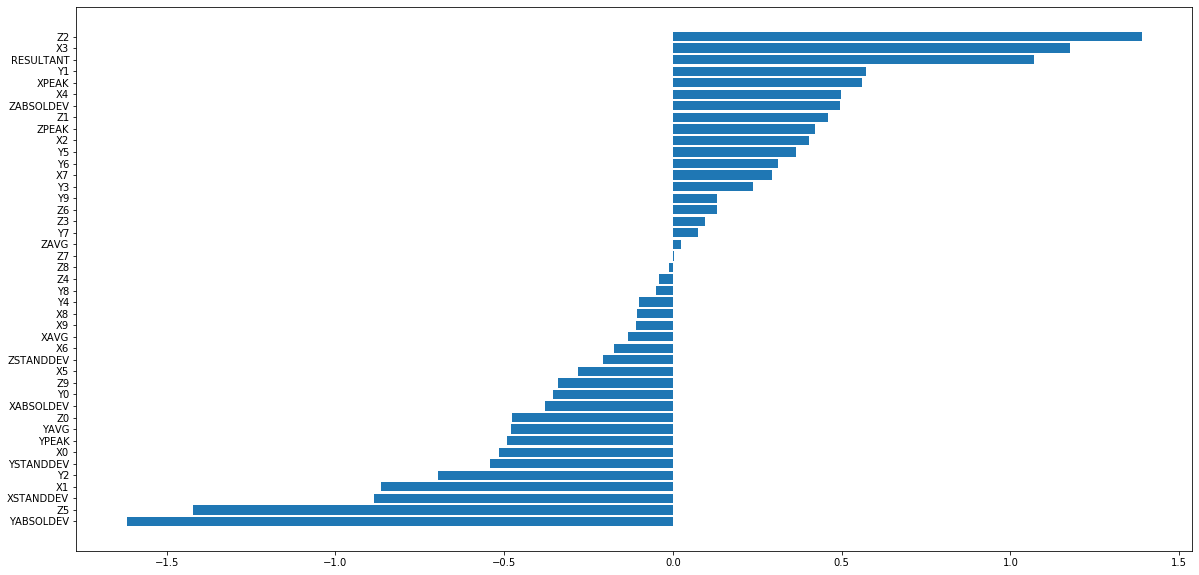

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  4 12  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 13  2  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 15  1  0  0  0  0]
 [ 1  0  0  0  0  0  9  0  0  0  0  0  8  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 14  1  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


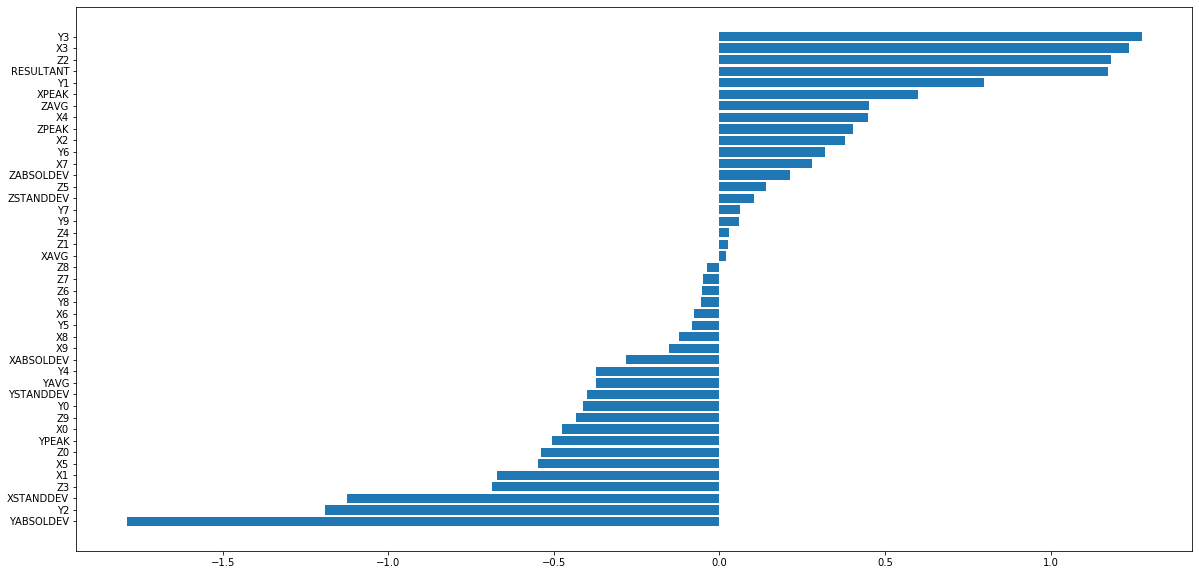

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [43  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 42  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0 30  1  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 41  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 43  0  0  0  0  0]
 [43  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2 42  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 43  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [34  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


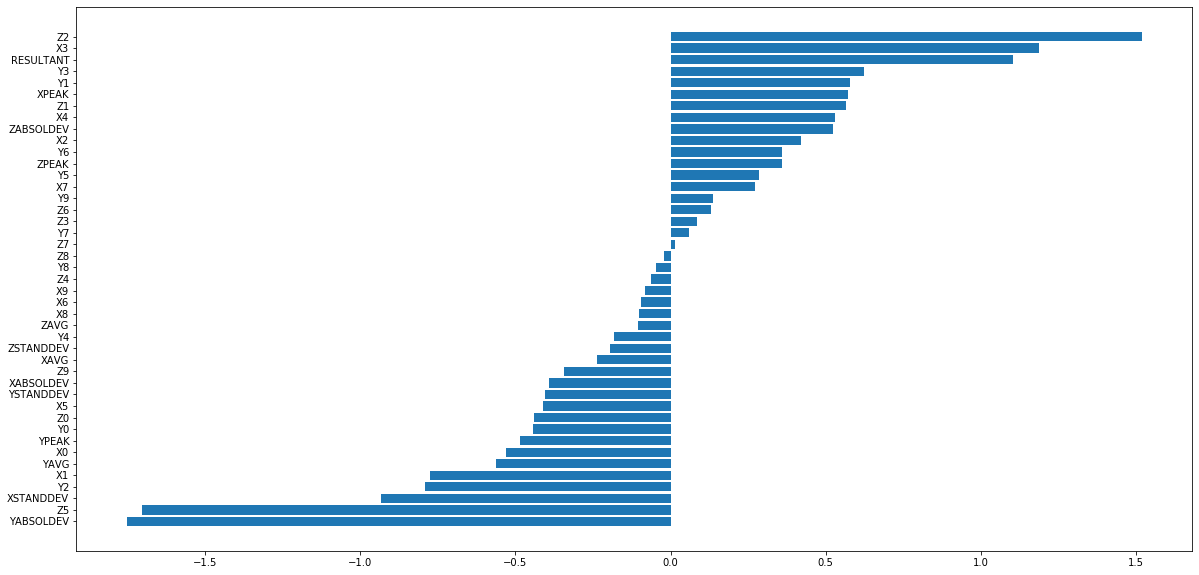

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


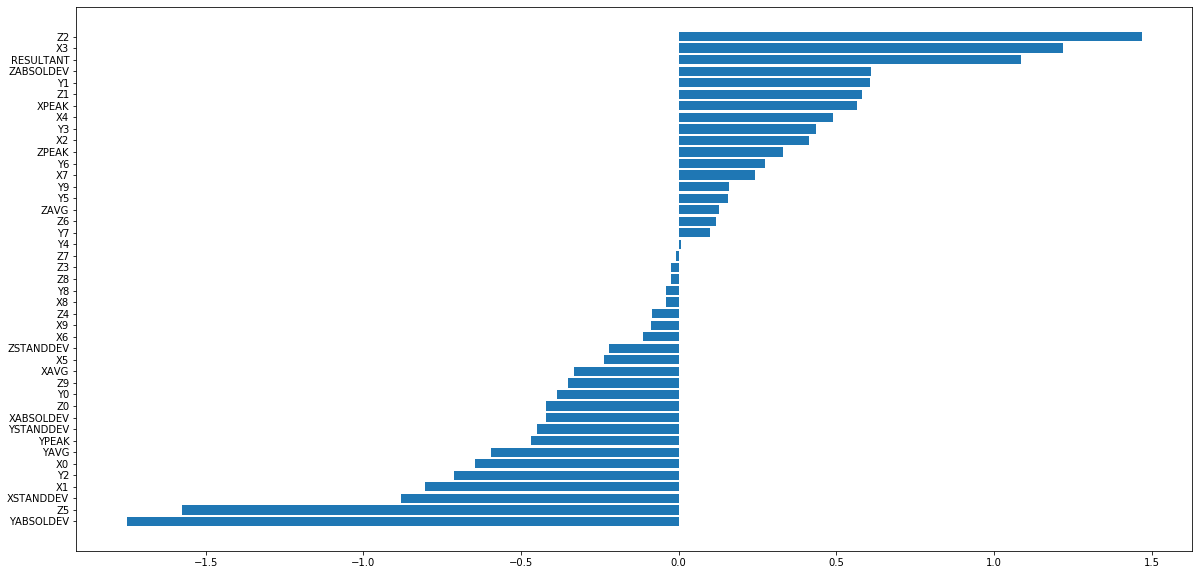

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 9  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 2  0  0  0  0  0 43  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 10  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


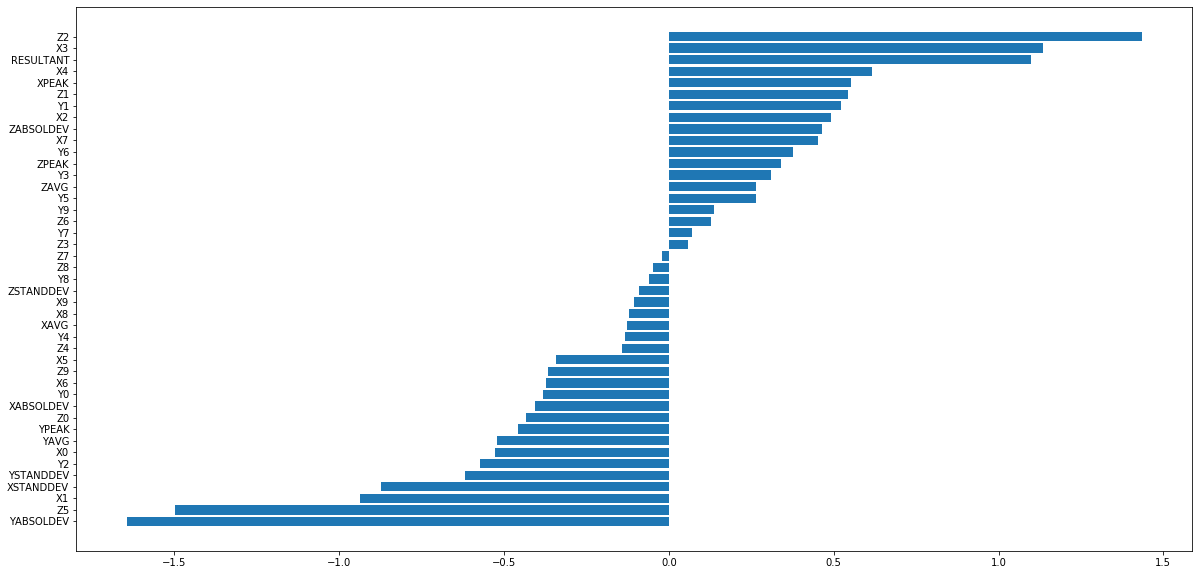

[[11  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  1  0  0  0  0  0  9  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  3  0  0  0  0  0 14  0  0  0  0  0]
 [ 2  0  0  0  0  0  2  0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  7  0  0  0  0  0]
 [ 8  0  0  0  0  0  1  0  0  0  0  0  9  0  0  0  0  0]
 [ 1  0  0  0  0  0 12  0  0  0  0  0  5  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0 16  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  9  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


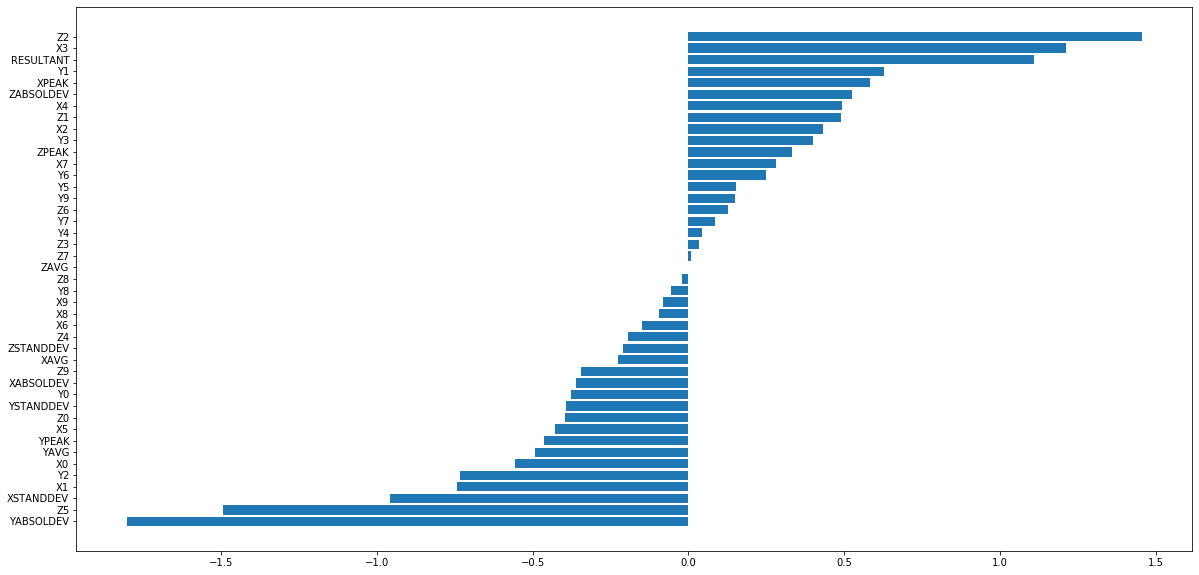

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


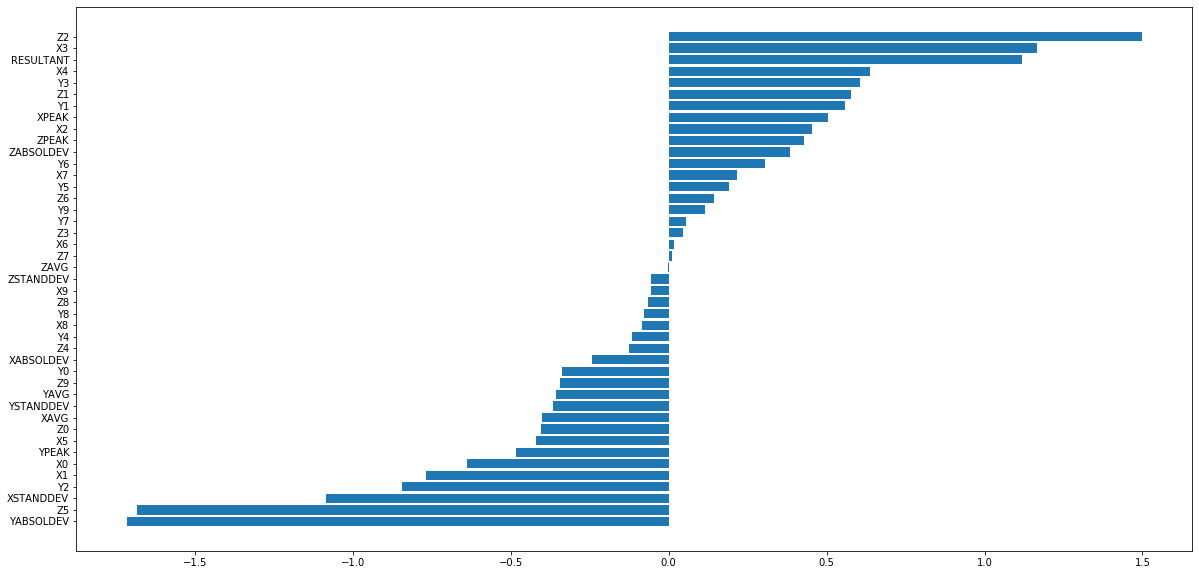

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [14  0  0  0  0  0  3  0  0  0  0  0  0  0  1  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [12  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 3  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


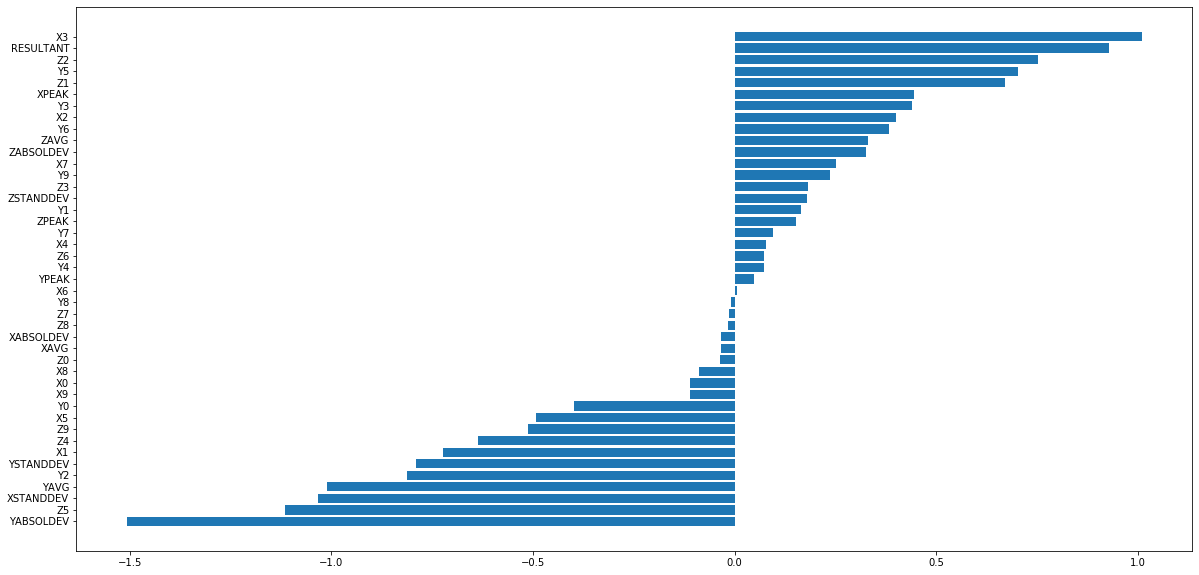

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 9  0  0  0  0  0  5  0  0  0  0  0  0  0  4  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


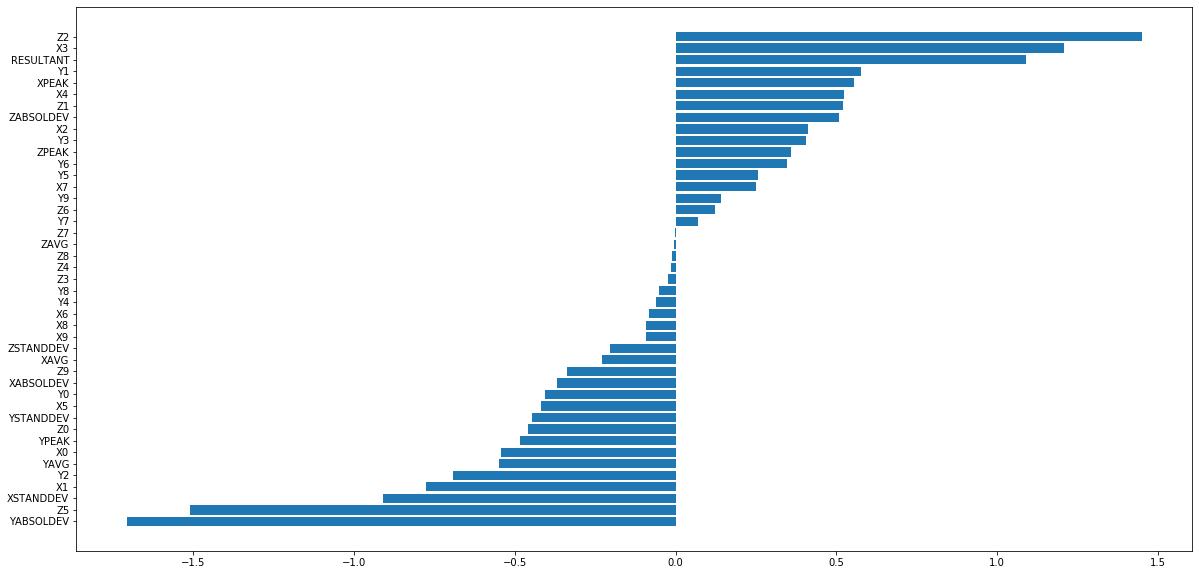

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  1  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 1  0  0  0  0  0 16  0  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0 10  0  0  0  0  0  4  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


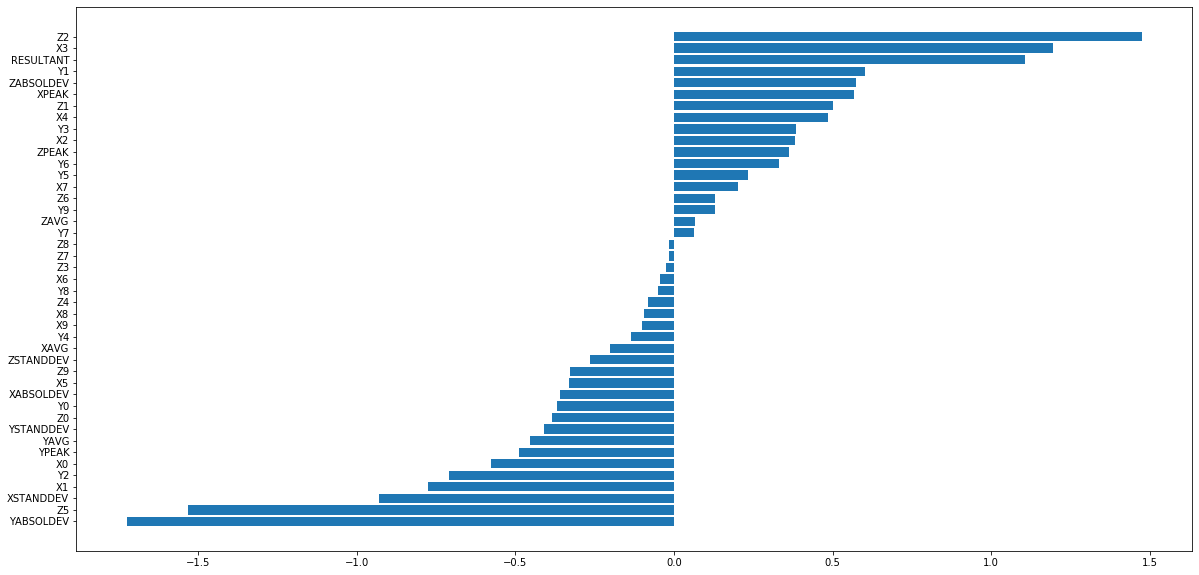

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [36  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  3 14  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0]
 [39  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0 36  0  0  0  0  0  1  1  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


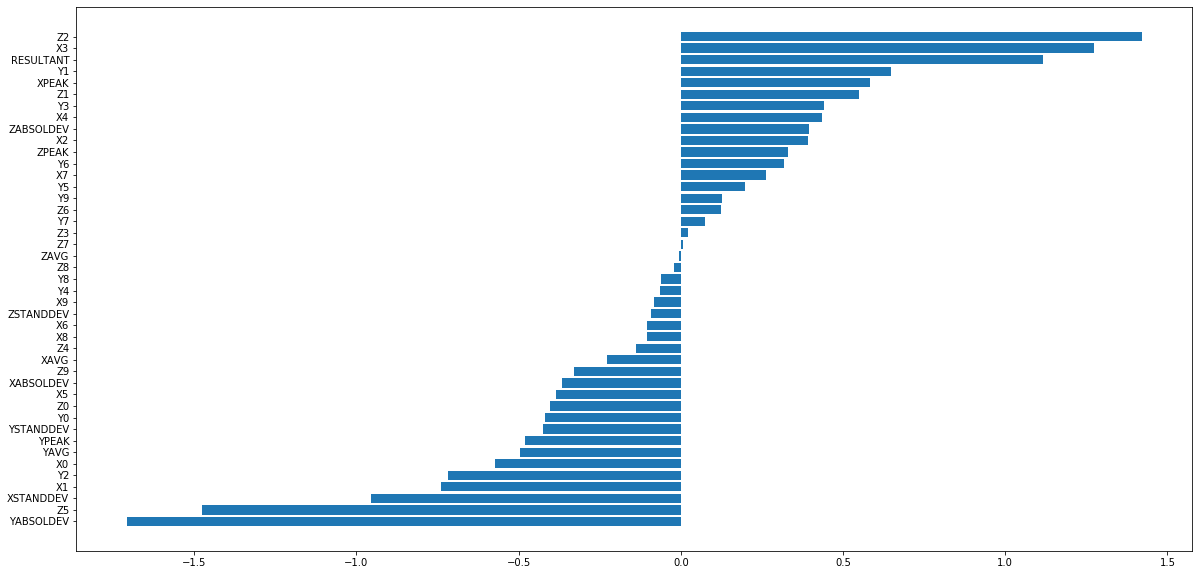

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


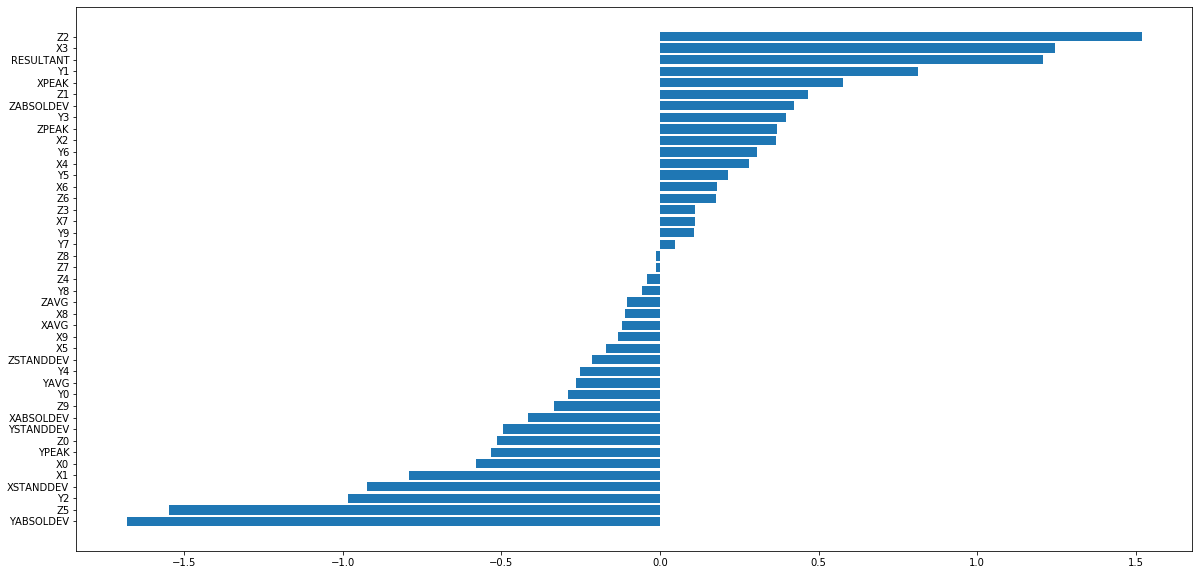

[[ 3  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [14  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


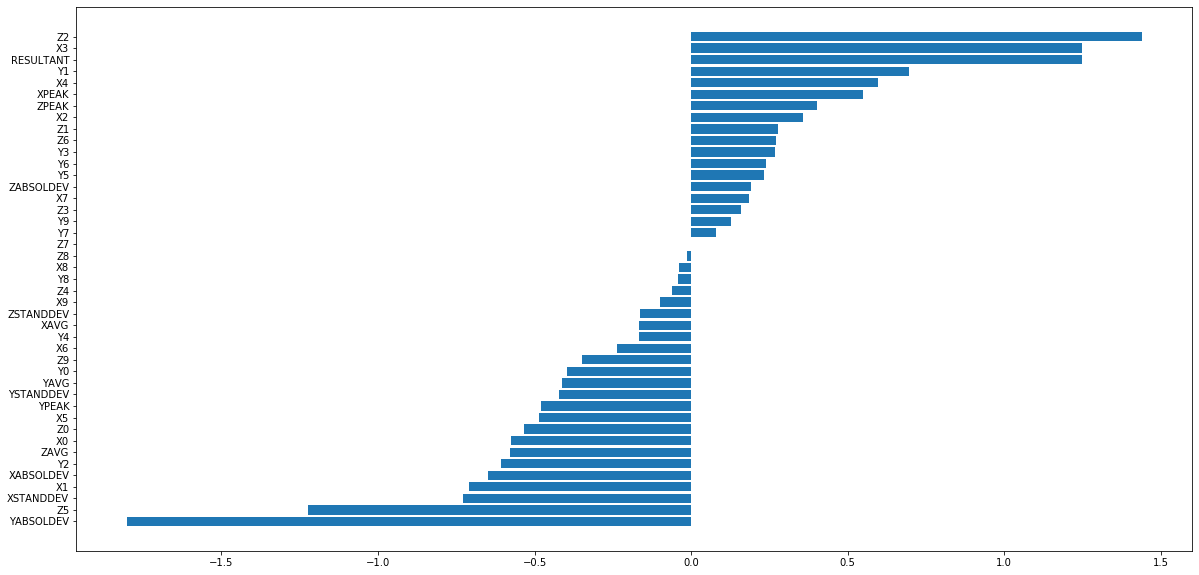

[[16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  1  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  3  0  0  0  0  0  0  7  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  1  0  0  0  0  0  7  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


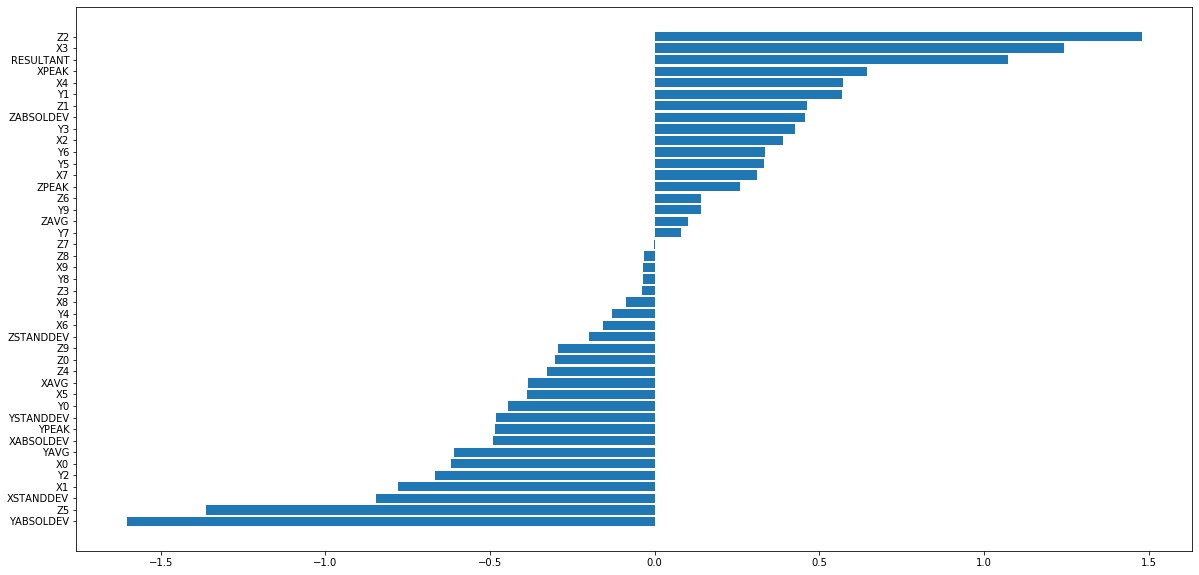

[[ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  3 14  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


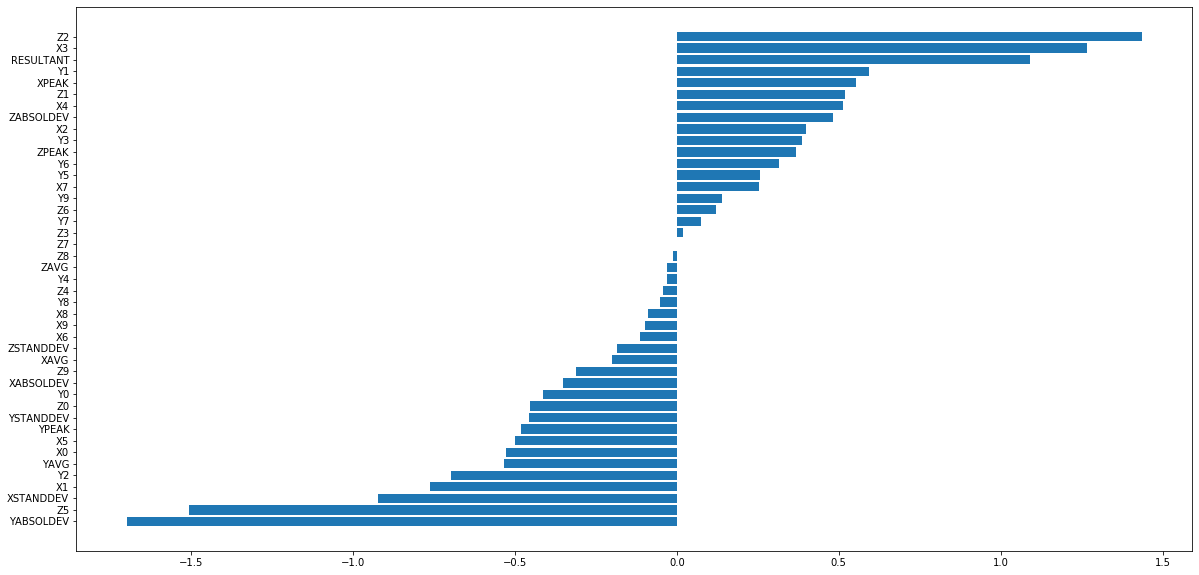

[[15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  4  4  0  0  0  0]
 [ 2  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  2  0  0  0  0  0  6  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


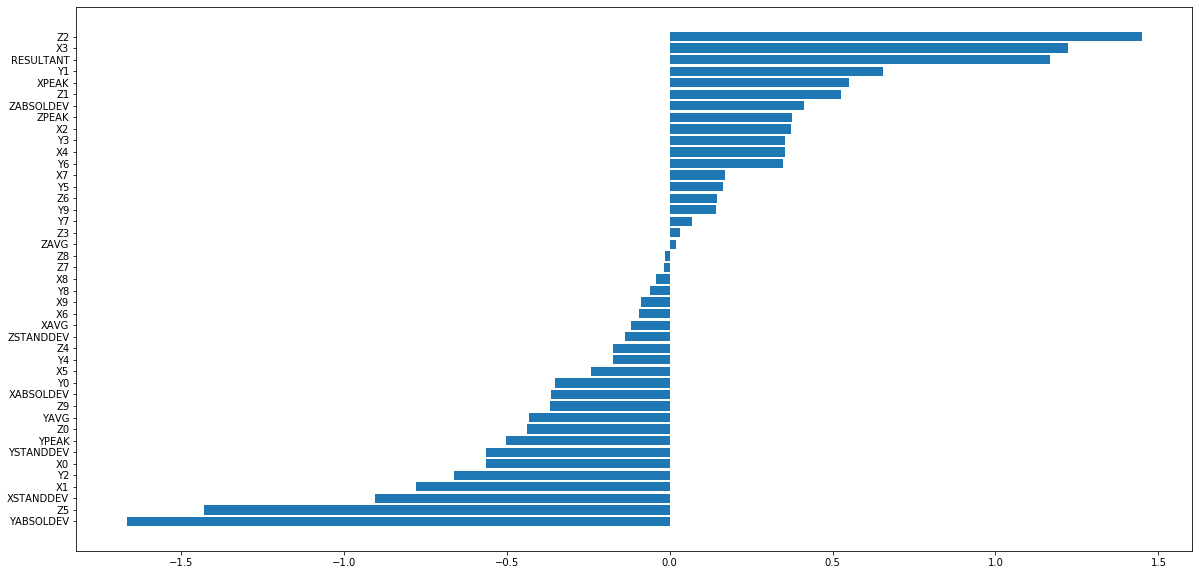

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [41  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 43  0  0  0  0  0]
 [37  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [24  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 44  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1642:


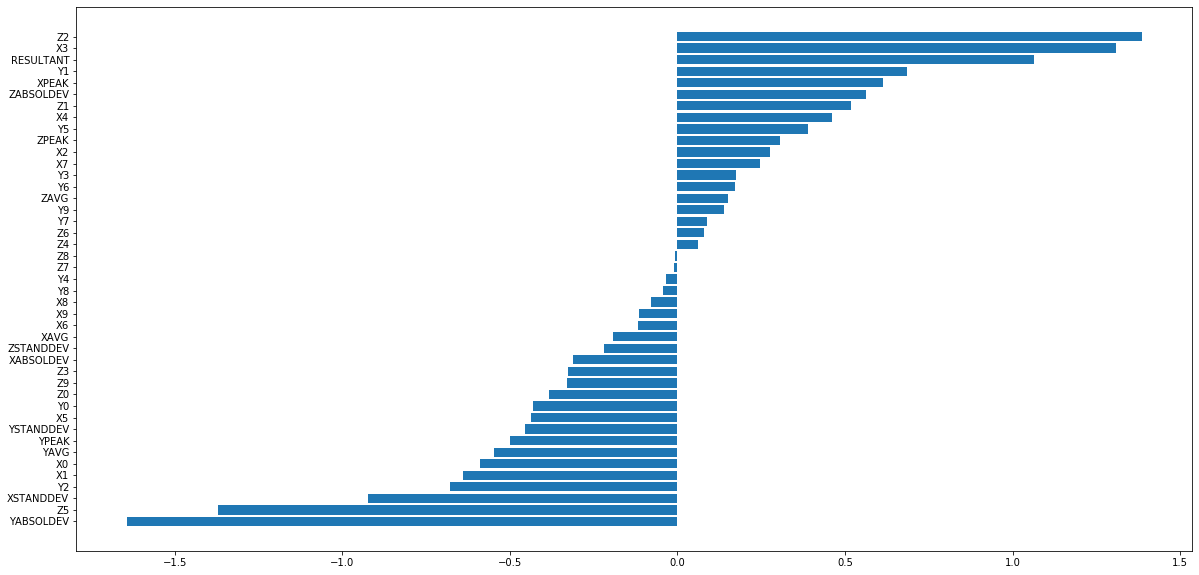

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [43  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [36  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [40  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [43  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0  0  0 14  0  0  0]
 [ 2  0  0  0  0  0 40  0  0  0  0  0  2  0  0  0]
 [ 4  0  0  0  0  0 38  0  0  0  0  0  3  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.09      1.00      0.17        44
           1       0.00      0.00      0.00        45
           2       0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1643:


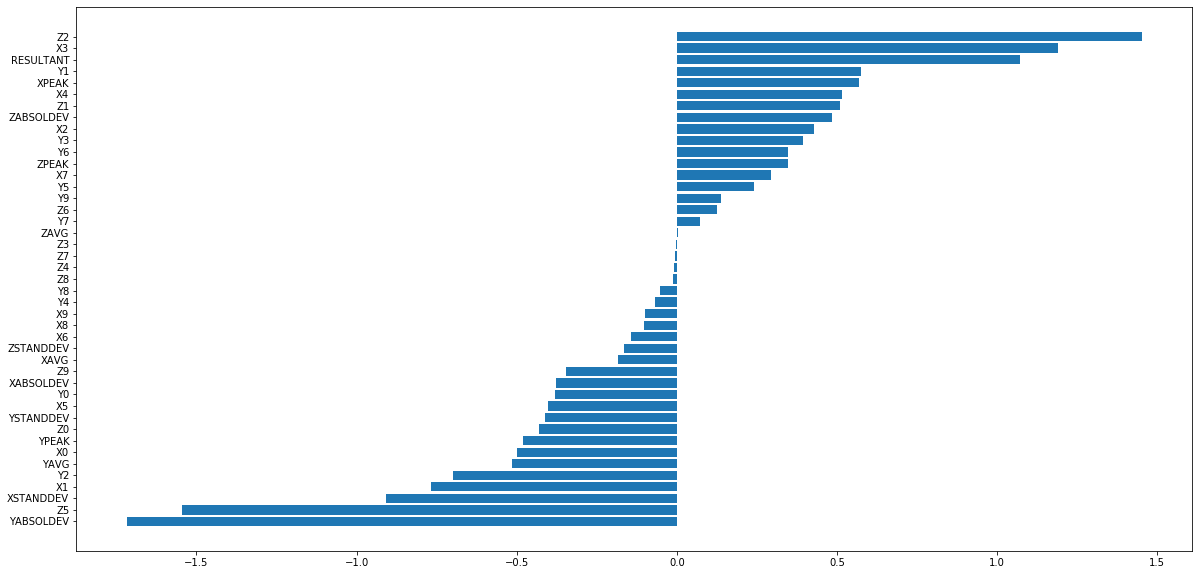

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0 12  0  0  0  0  0 30  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 43  0  0  0  0]
 [26  0  0  0  0  0  8  0  0  0  0  0  2  8  0  0  0]
 [ 9  0  0  0  0  0 22  0  0  0  0  0 13  1  0  0  0]
 [ 1  0  0  0  0  0  4  0  0  0  0  0 35  5  0  0  0]
 [ 1  0  0  0  0  0 14  0  0  0  0  0 25  4  0  0  0]
 [ 3  0  0  0  0  0 22  0  0  0  0  0 19  0  1  0  0]
 [ 2  0  0  0  0  0 25  0  0  0  0  0 14  4  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [25  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0]
 [ 6  0  0  0  0  0  8  0  0  0  0  0 28  3  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.11   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1644:


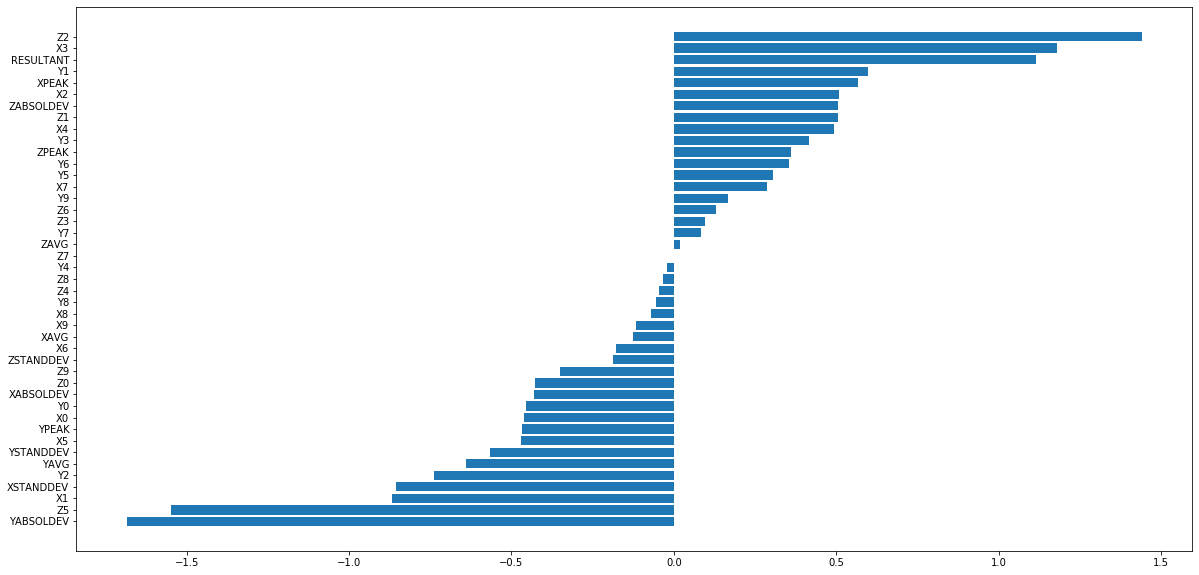

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [29 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  3  0  0  0  0  0 33  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [42  0  0  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0]
 [43  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1645:


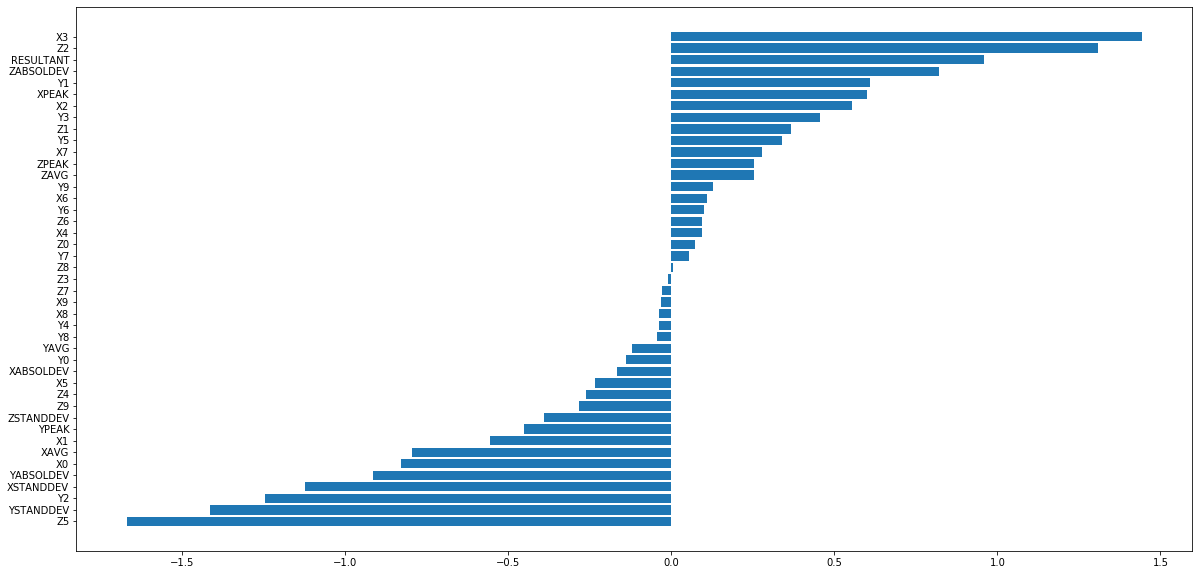

[[43  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  8  0  0  0  0  0 33  0  2  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0 19  0  0  0  0  0 12  0  1  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  4  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [26  0  0  0  0  0 14  0  0  0  0  0  5  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0 43  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1646:


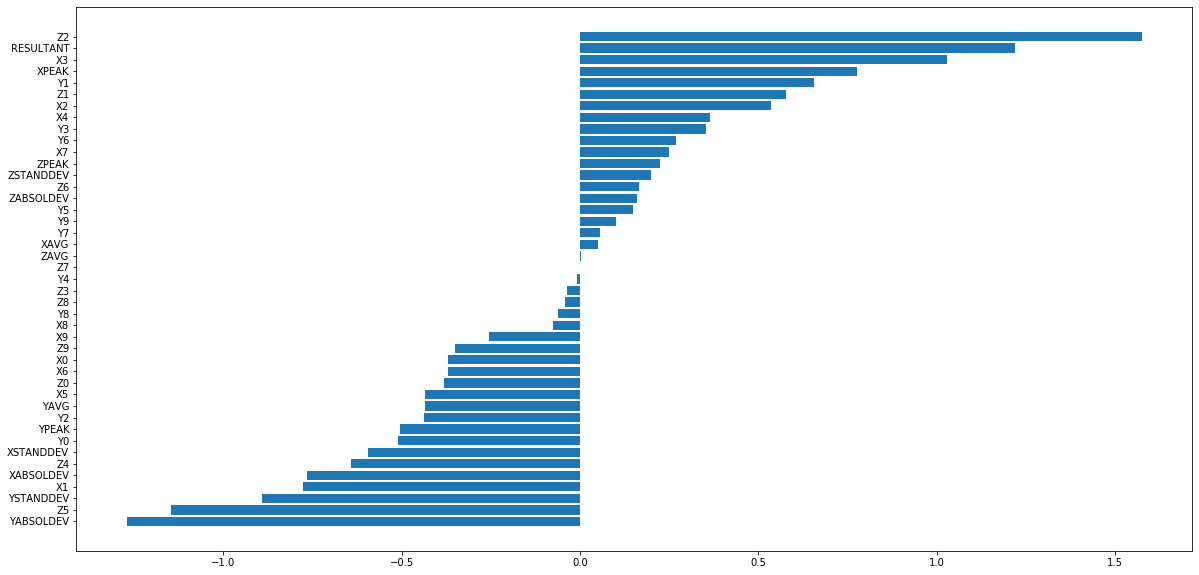

[[43  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [43  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


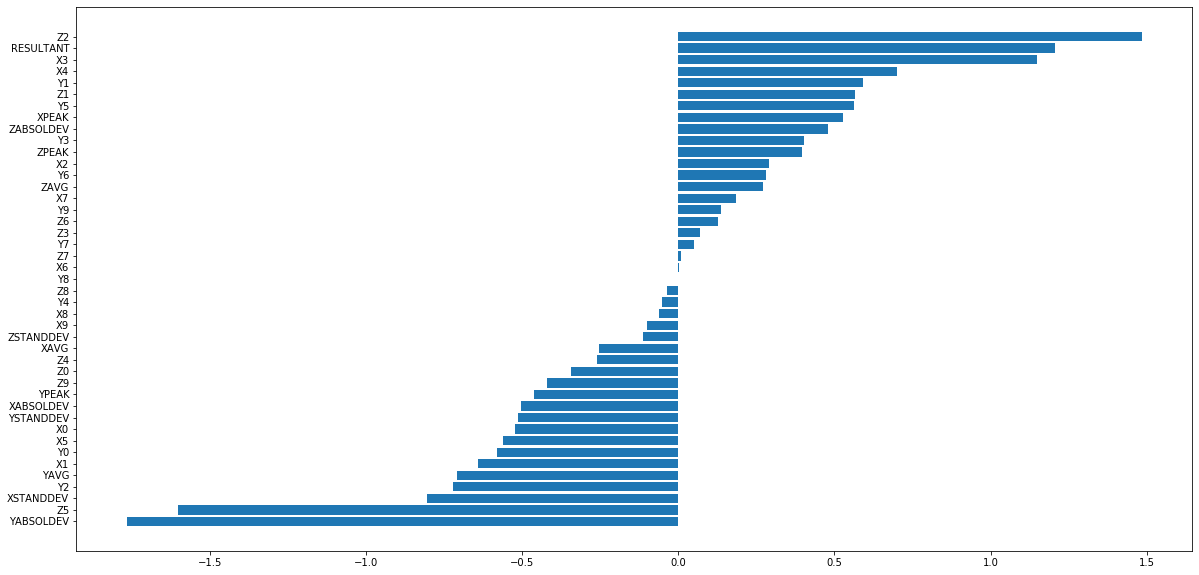

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 18  1  1  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 4  0  0  0  0  0  1  0  0  0  0  0 18  0  0  0  0  0]
 [11  0  0  0  0  0  1  0  0  0  0  0 10  0  0  0  0  0]
 [12  0  0  0  0  0  1  0  0  0  0  0  5  4  1  0  0  0]
 [10  0  0  0  0  0  1  0  0  0  0  0 12  0  0  0  0  0]
 [ 1  1  0  0  0  0  9  0  0  0  0  0 12  0  0  0  0  0]
 [22  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 20  2  0  0  0  0]
 [ 4  0  0  0  0  0 12  0  0  0  0  0  7  0  0  0  0  0]
 [19  0  0  0  0  0  1  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1648:


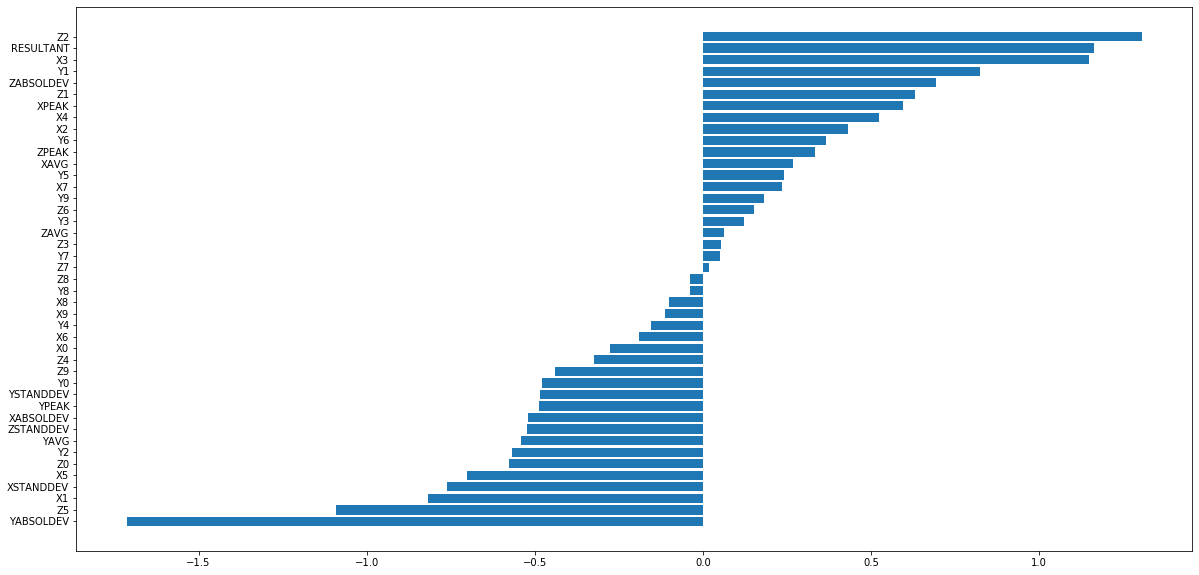

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0 23  2  0  0  0  0]
 [25  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 33 11  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 43  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0  0  0 21  0  0  0  0  0]
 [44  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [42  0  0  0  0  0  1  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


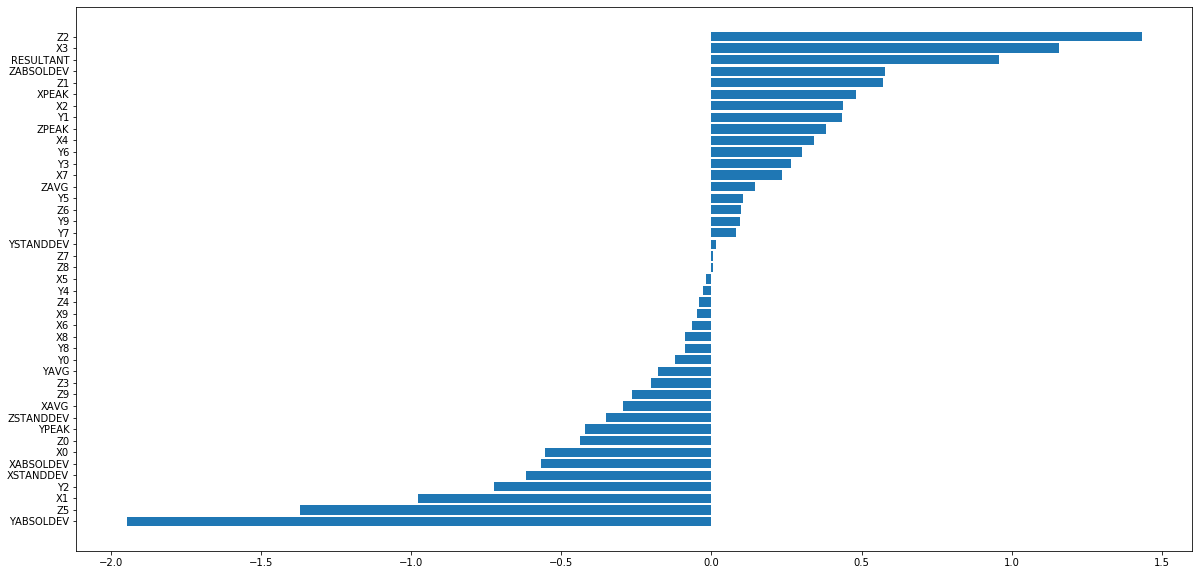

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [19  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 19  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0 13  2  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  3  0  0  0  0]
 [22  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0 14  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1650:


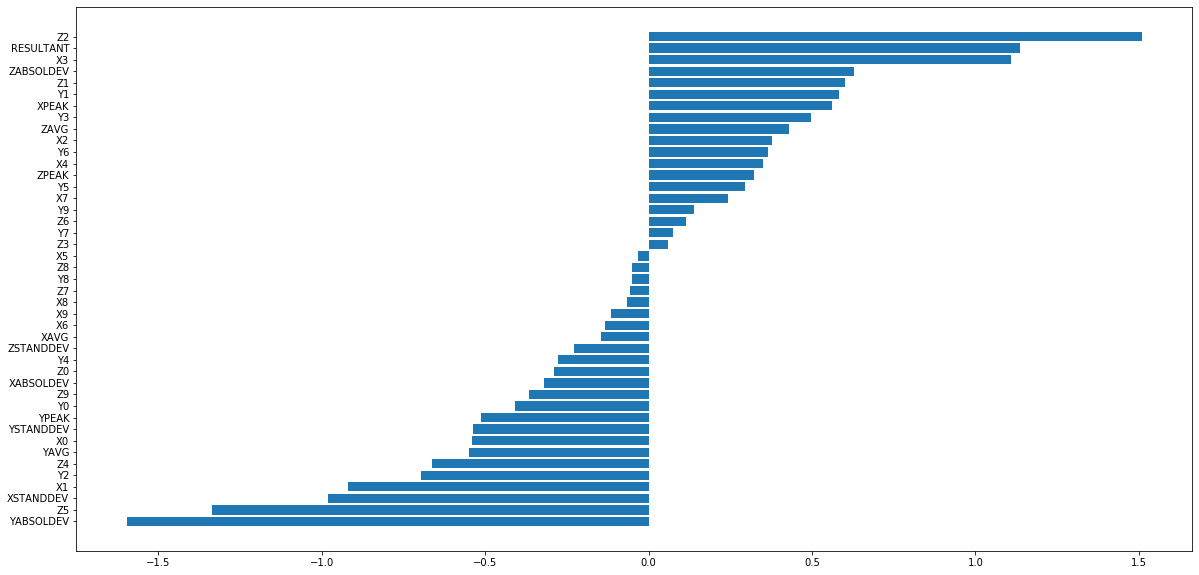

[[19  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [31  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [28  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [38  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [26  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  2  0  0  0  0  0 35  7  0  0  0  0]
 [ 6  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0]
 [42  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [41  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0 42  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0 31  0  0  0  0  0  2  0  0  0  0  0]
 [35  0  0  0  0  0  9  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(18211, 93)
[1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650]
Subject ID 1600:


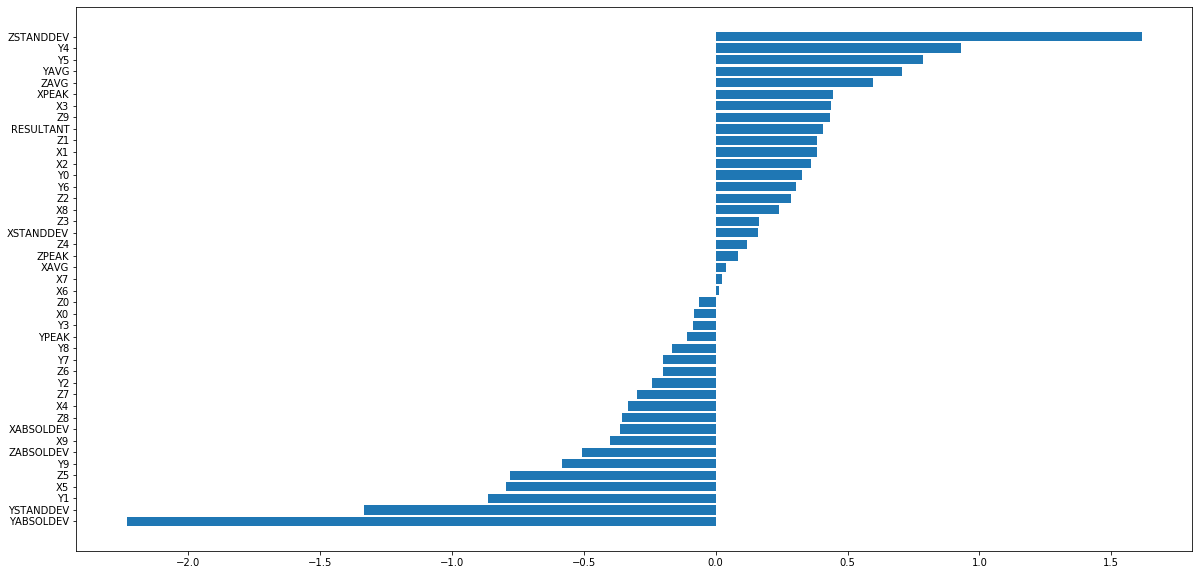

[[10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [16  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


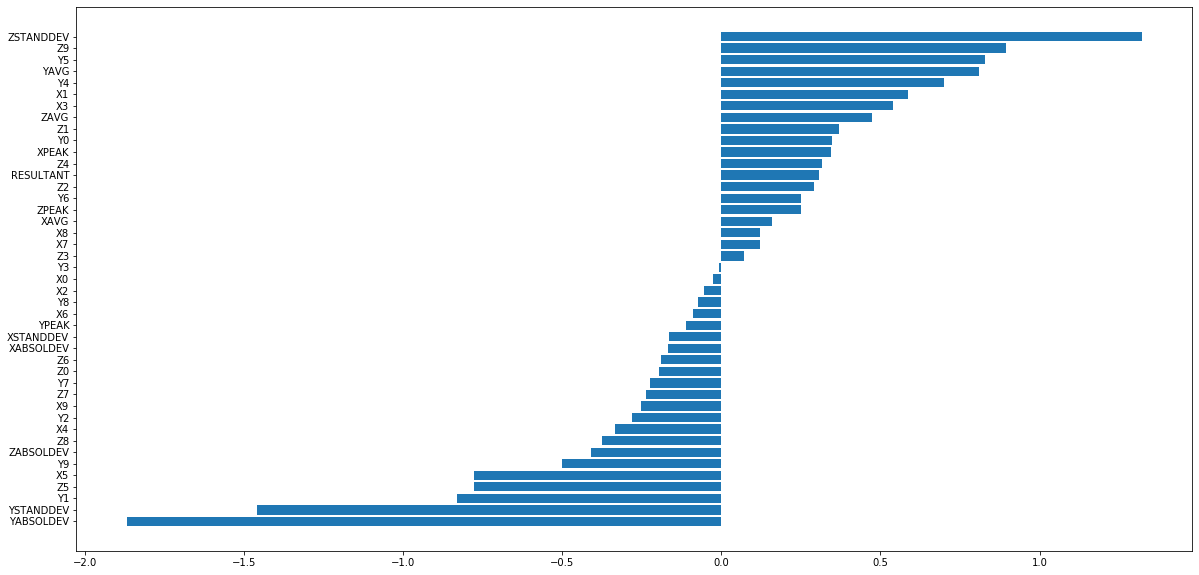

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [15  0  1  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  4  4  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


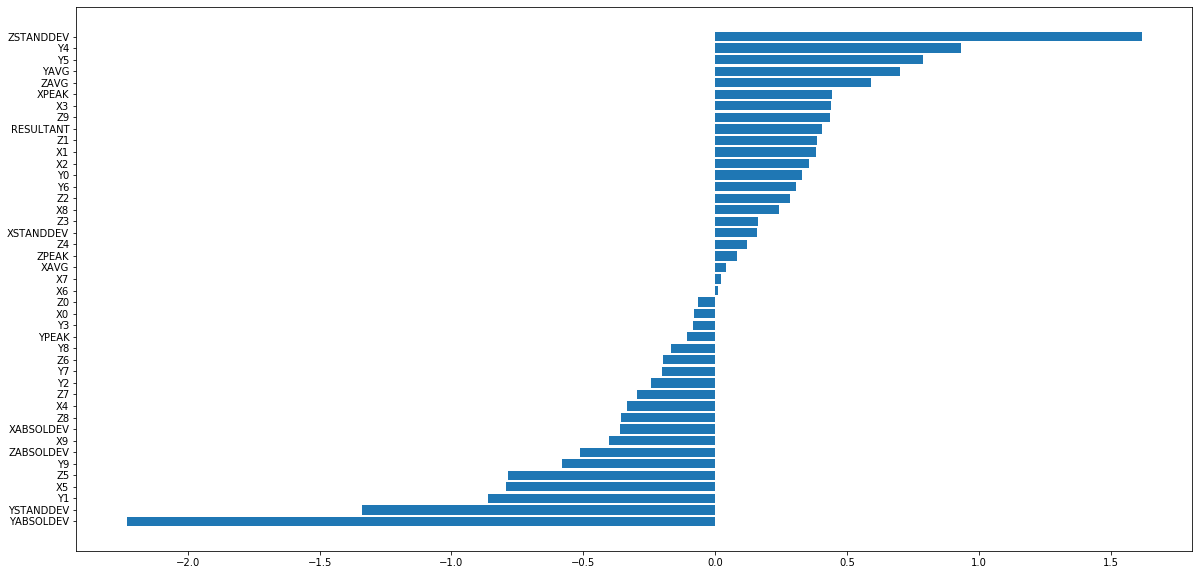

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [13  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


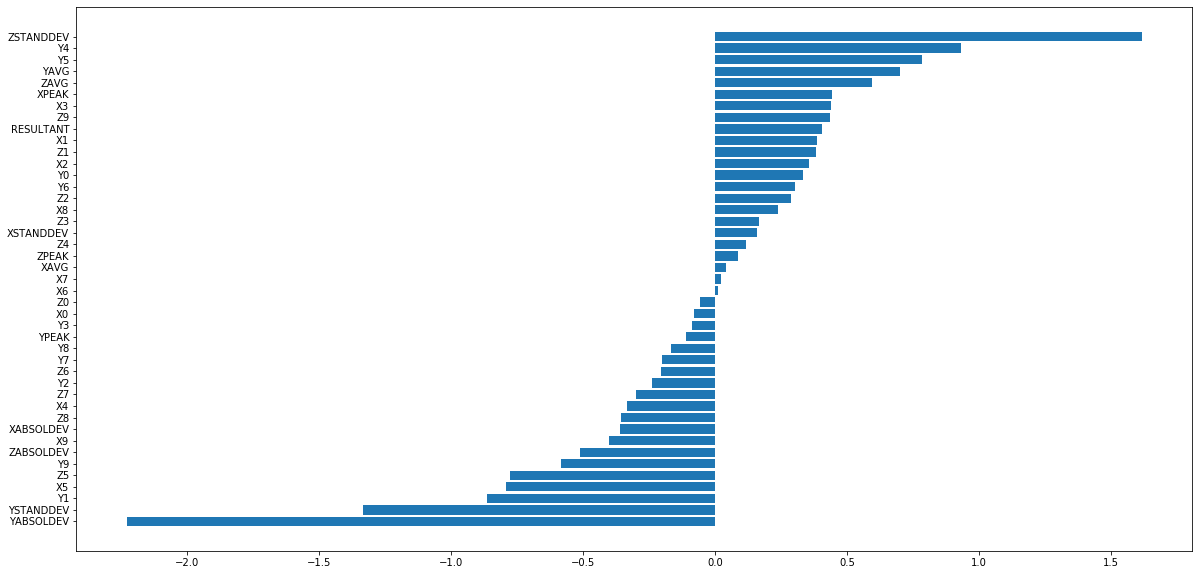

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


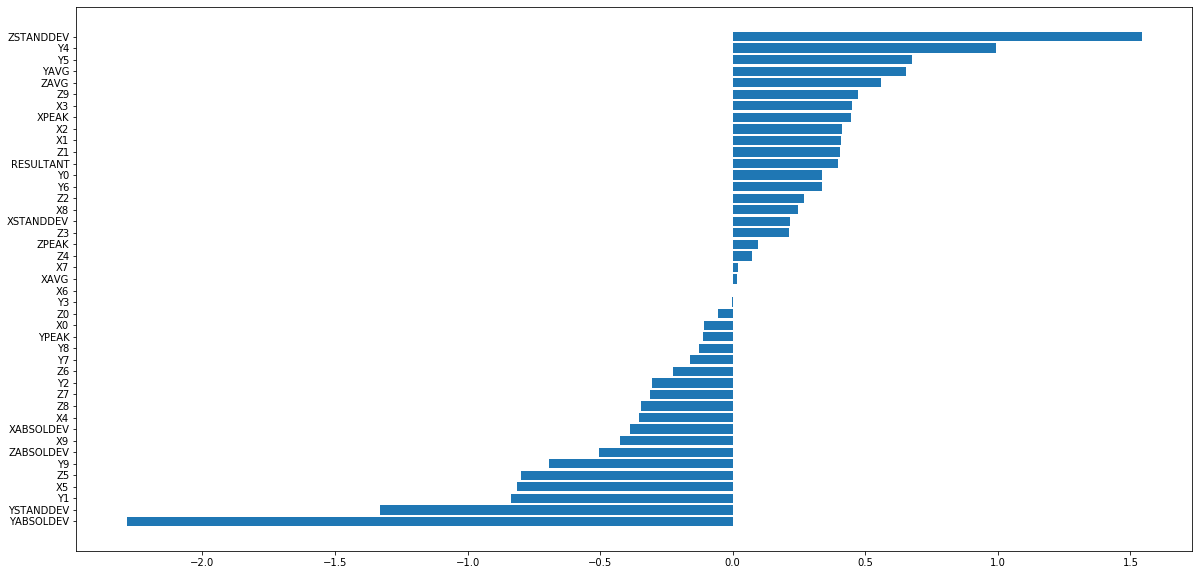

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  1  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 3  1  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


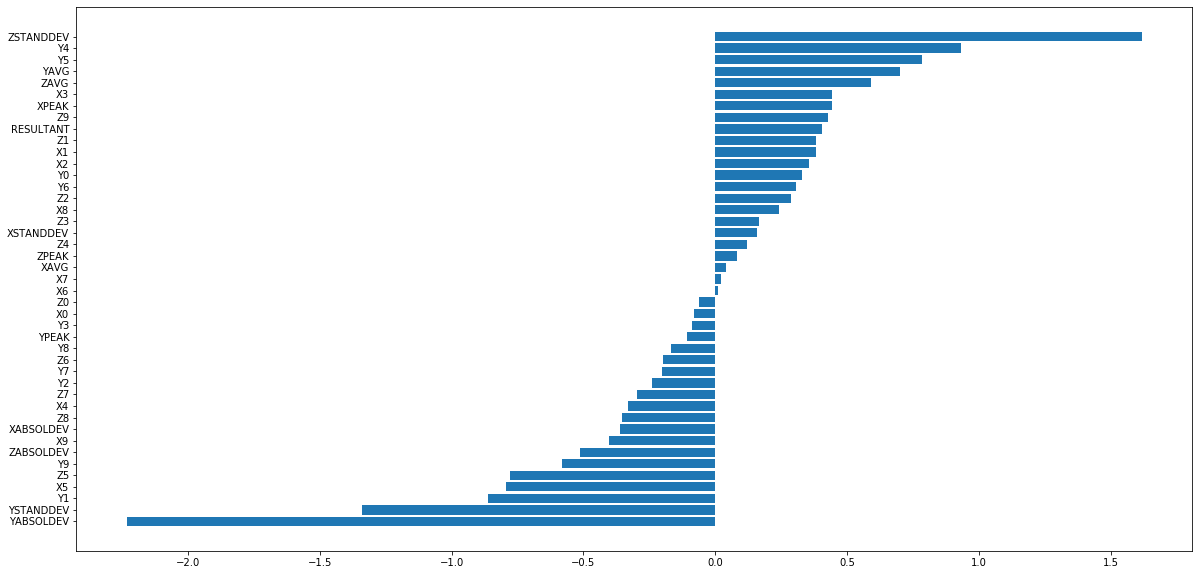

[[15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


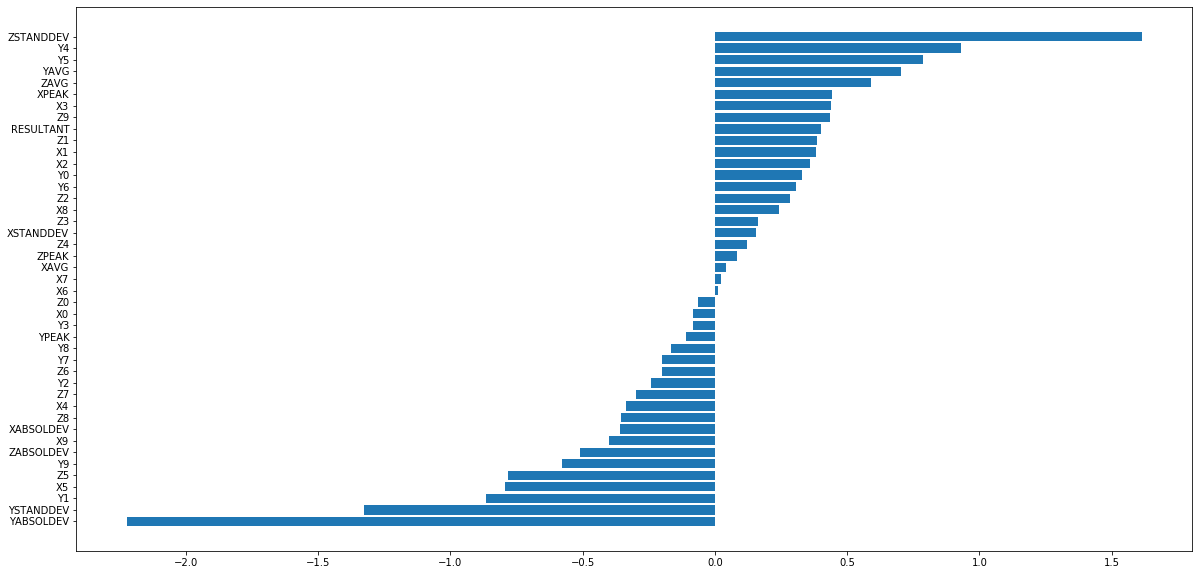

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  1 11  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  1  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


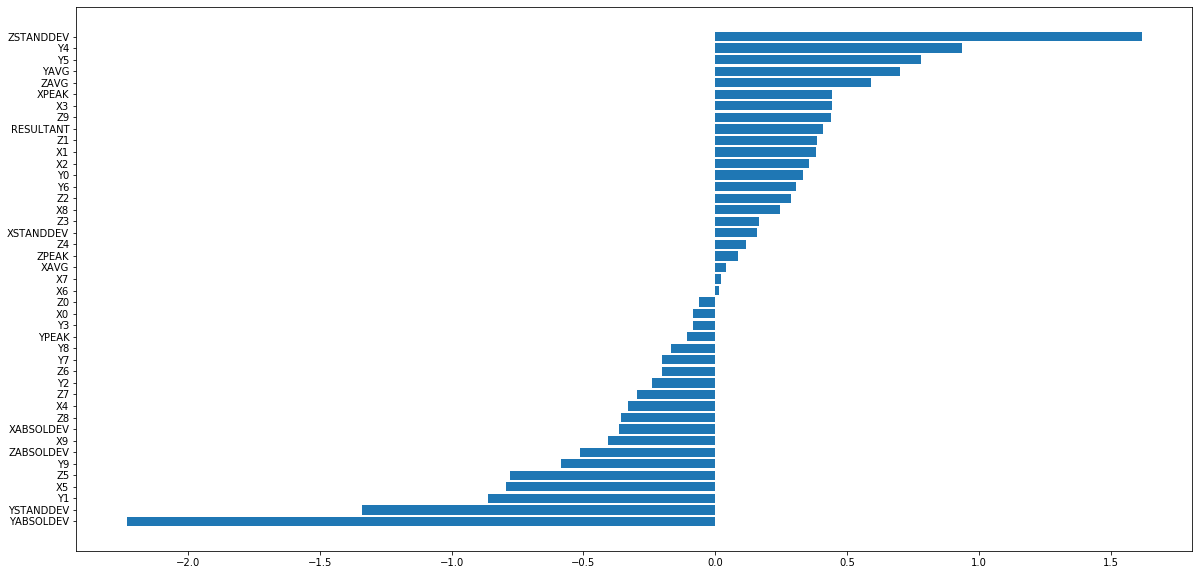

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 13  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


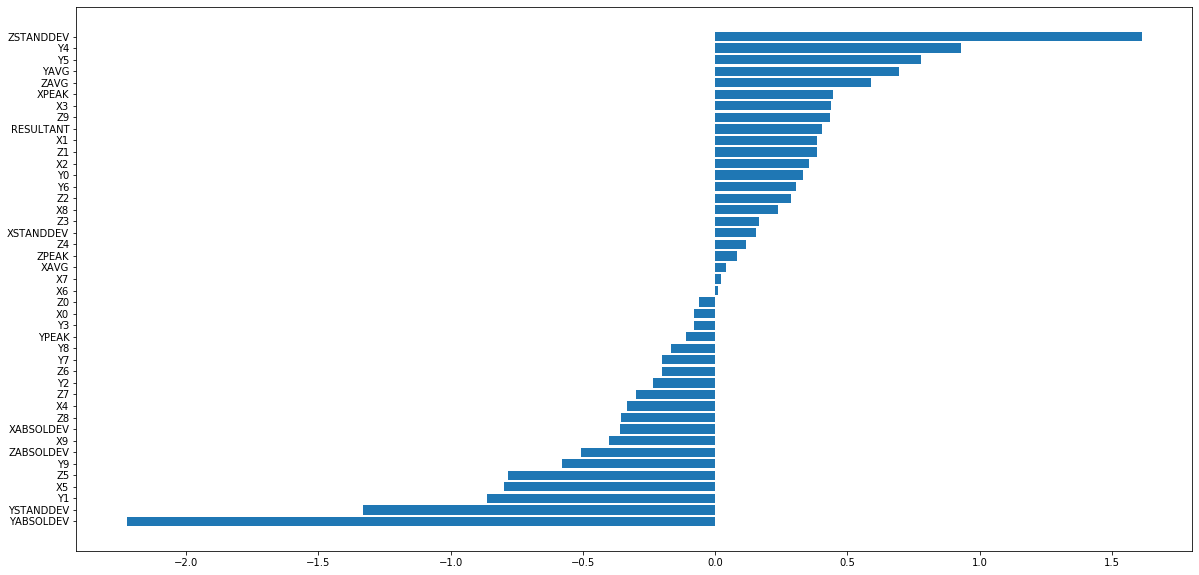

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0  0  0  3  2  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0  1  9  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  2  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


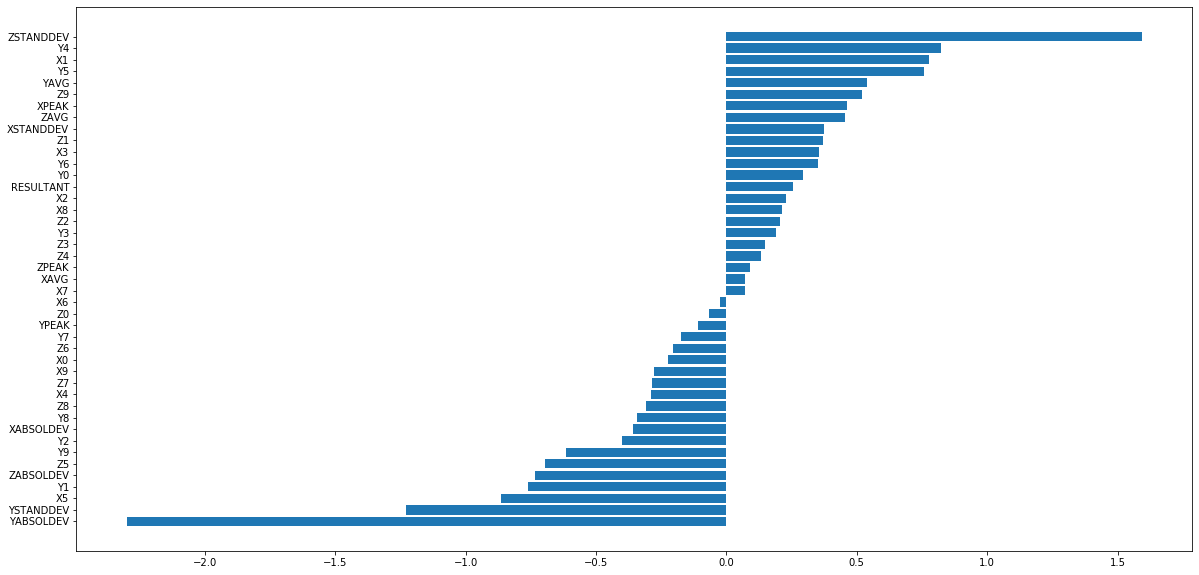

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  1  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


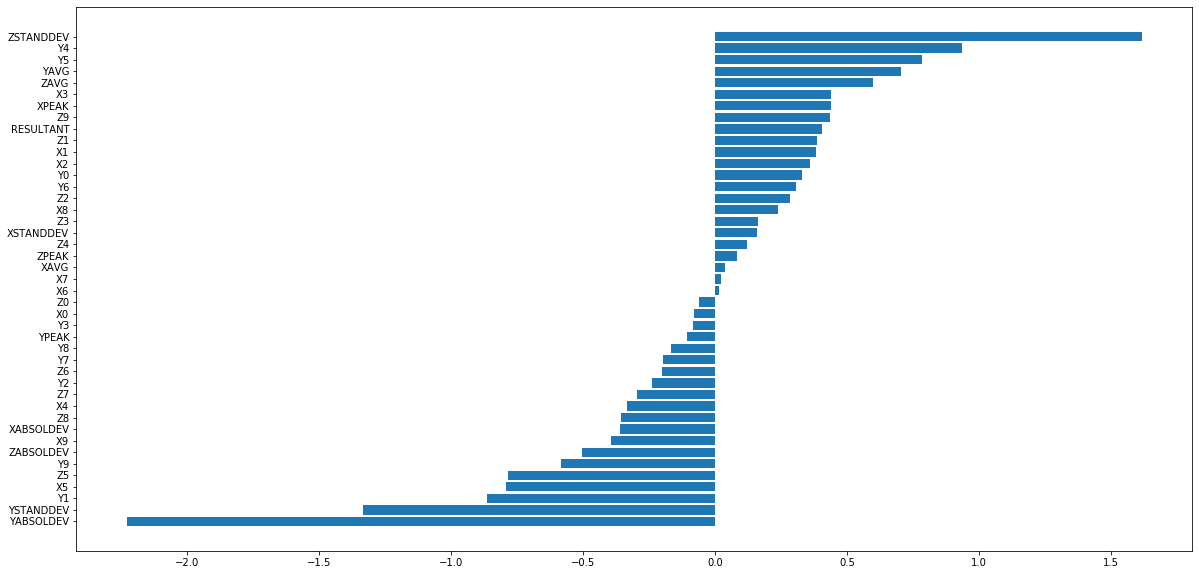

[[13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  3  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


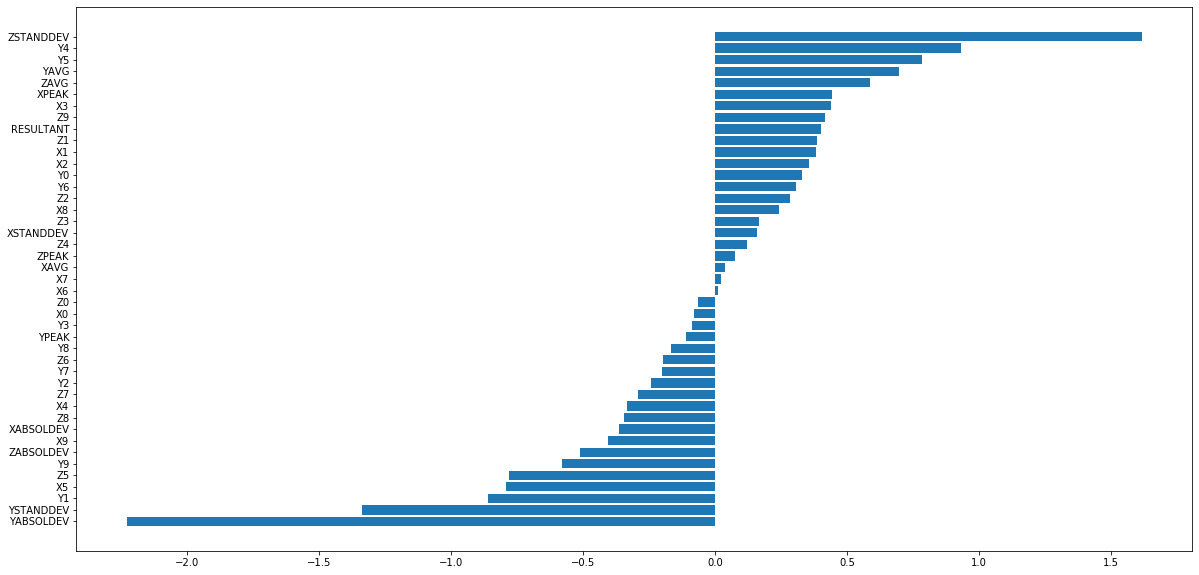

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 14  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


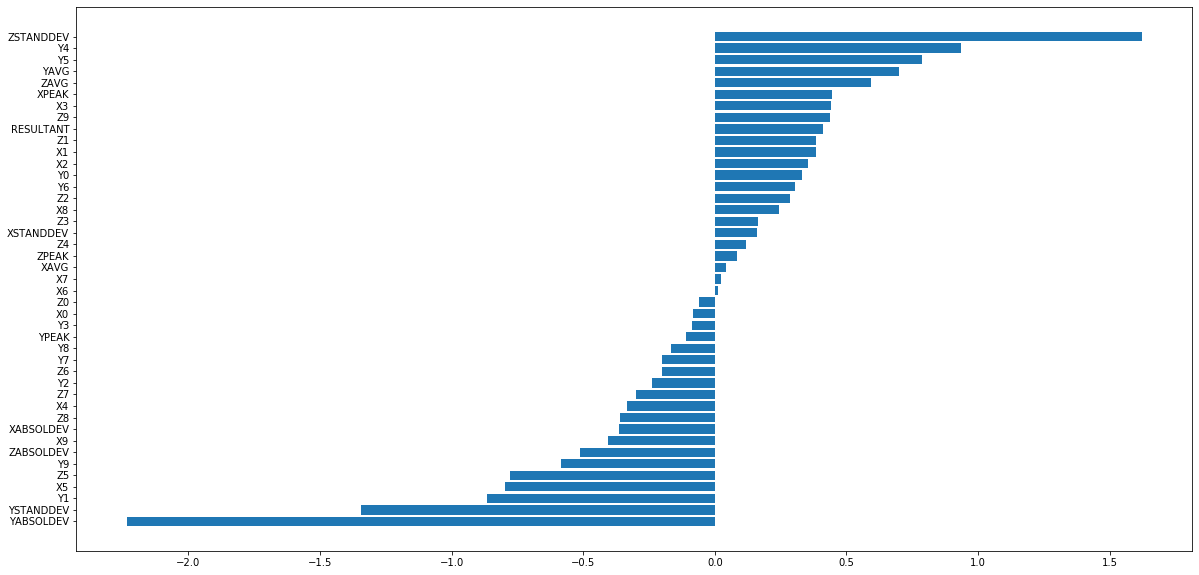

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 16  1  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  2  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


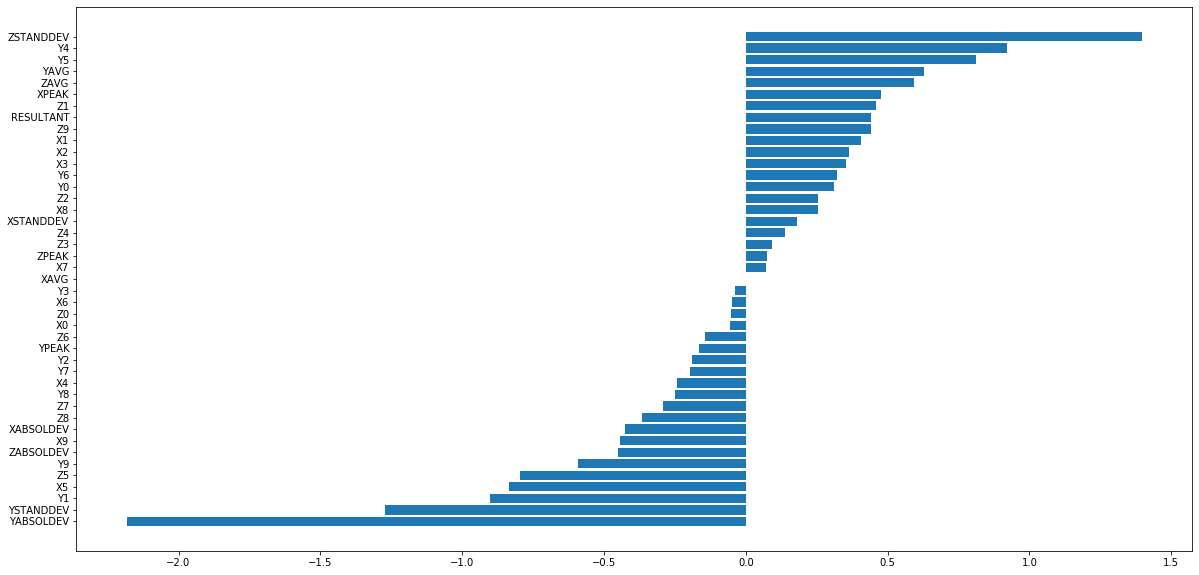

[[11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  2  4  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


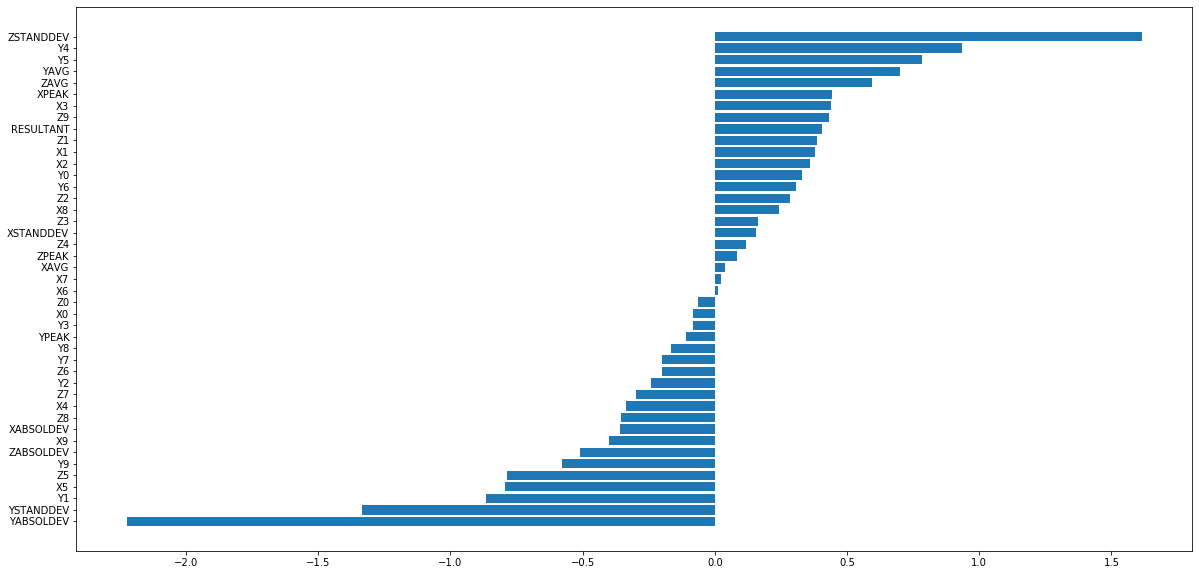

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  3  0  1  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  3  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [13  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


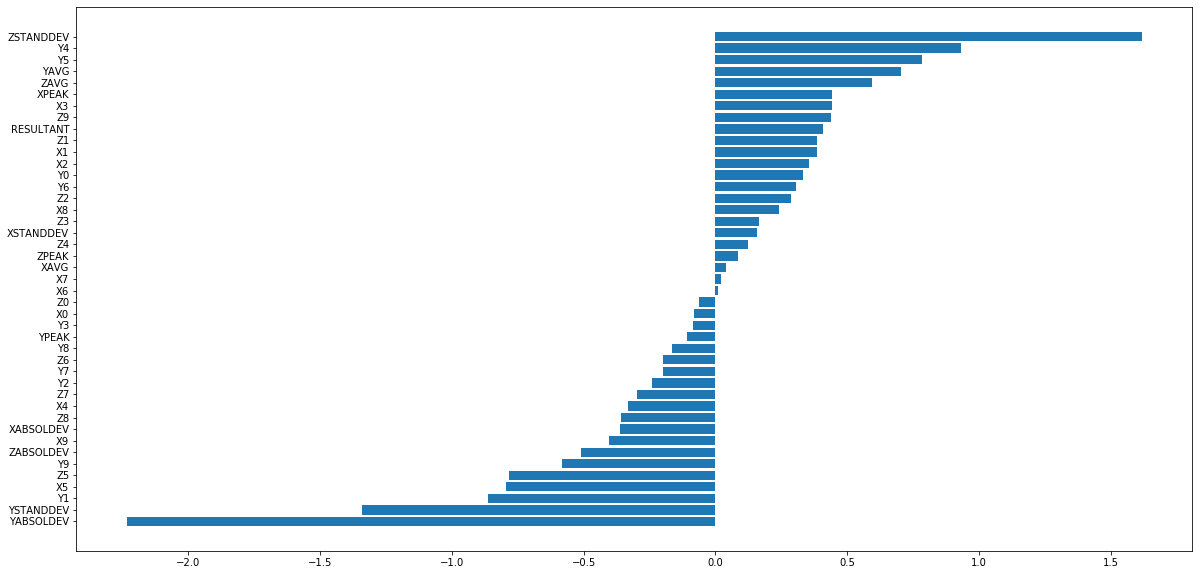

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  2  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  8  0  1  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.07   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


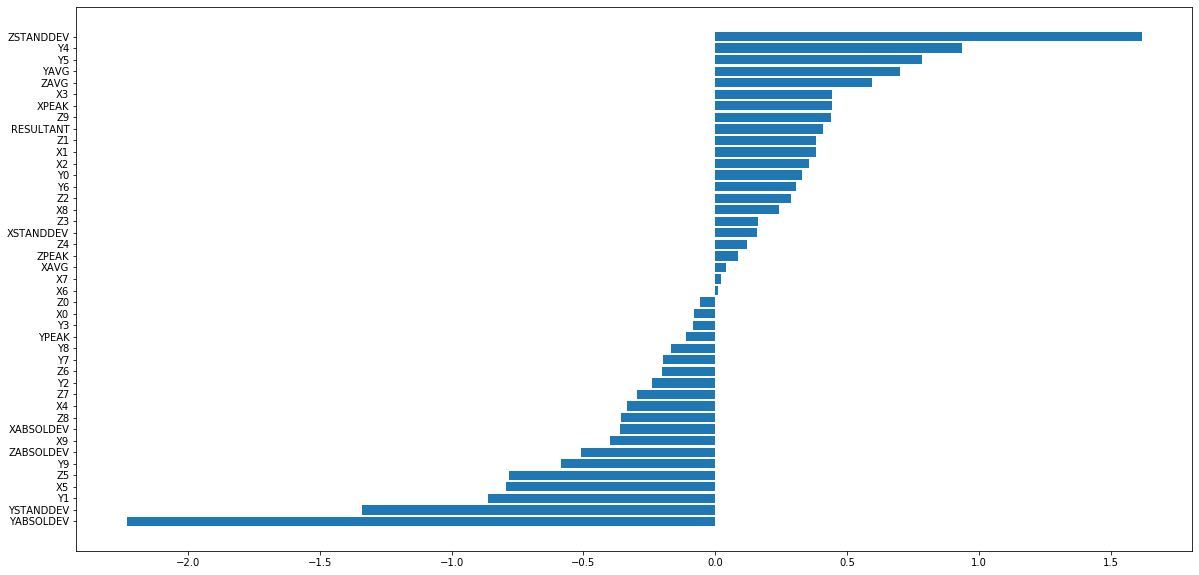

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [10  0  1  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  5  0 11  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


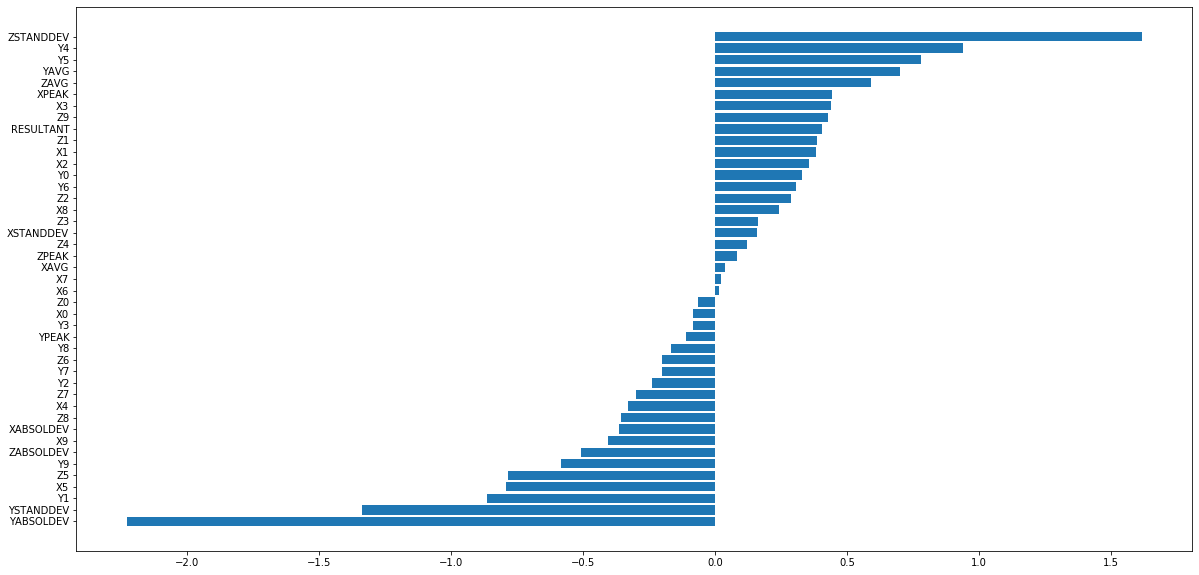

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  7  0  1  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.06   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


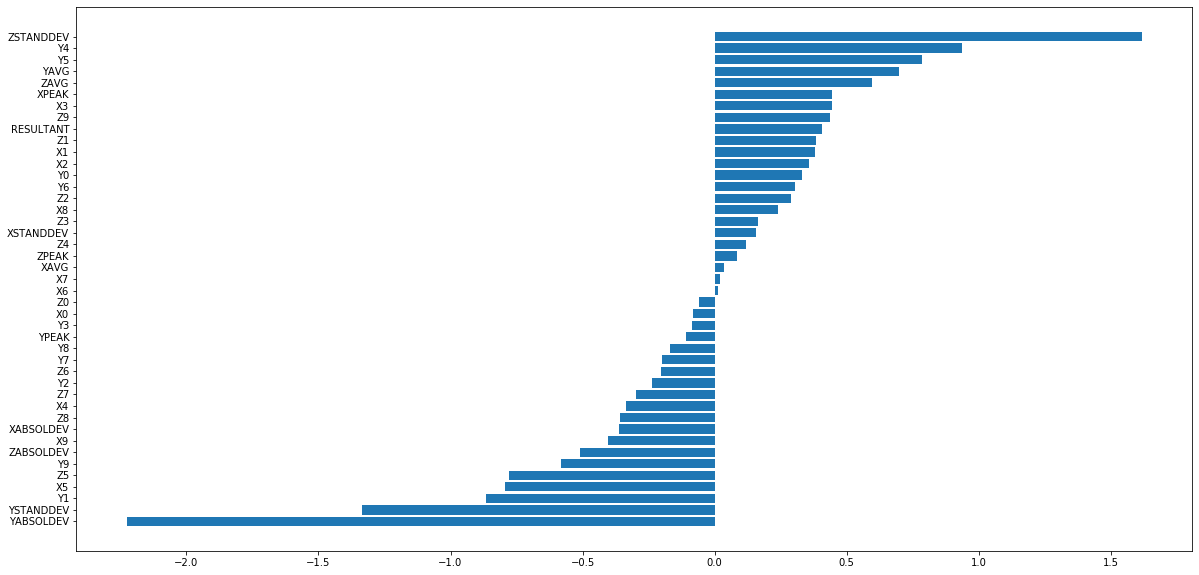

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


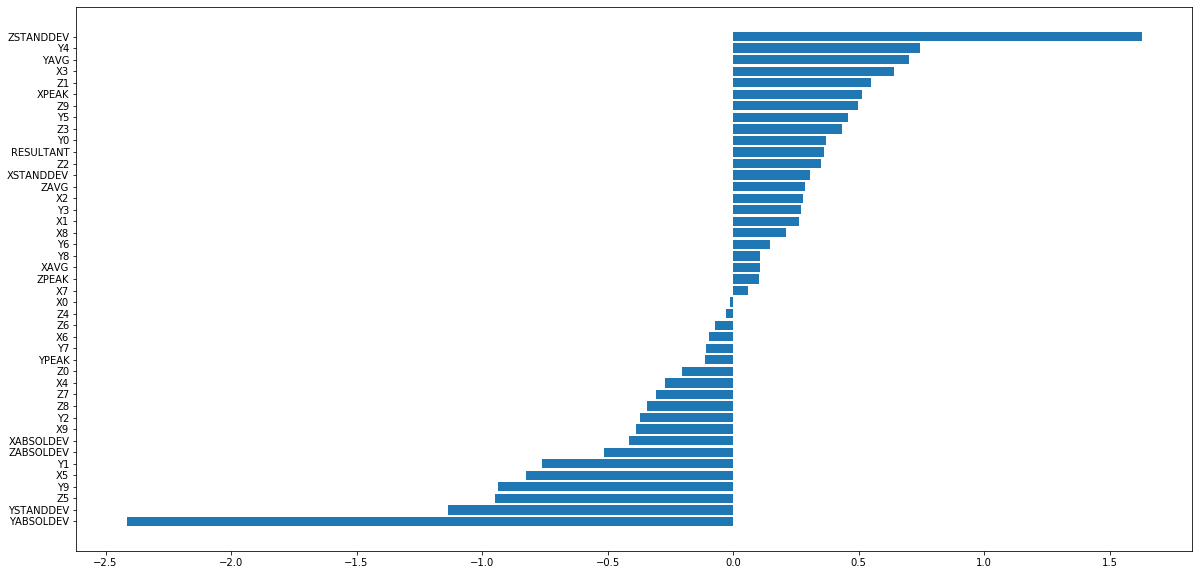

[[12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  2  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


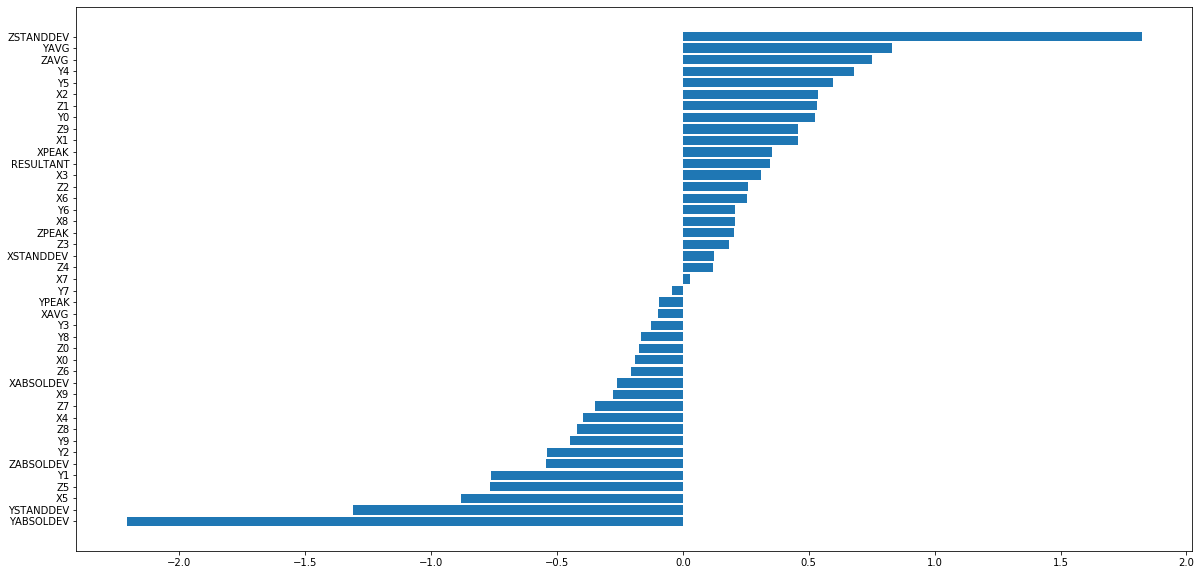

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  3  4  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


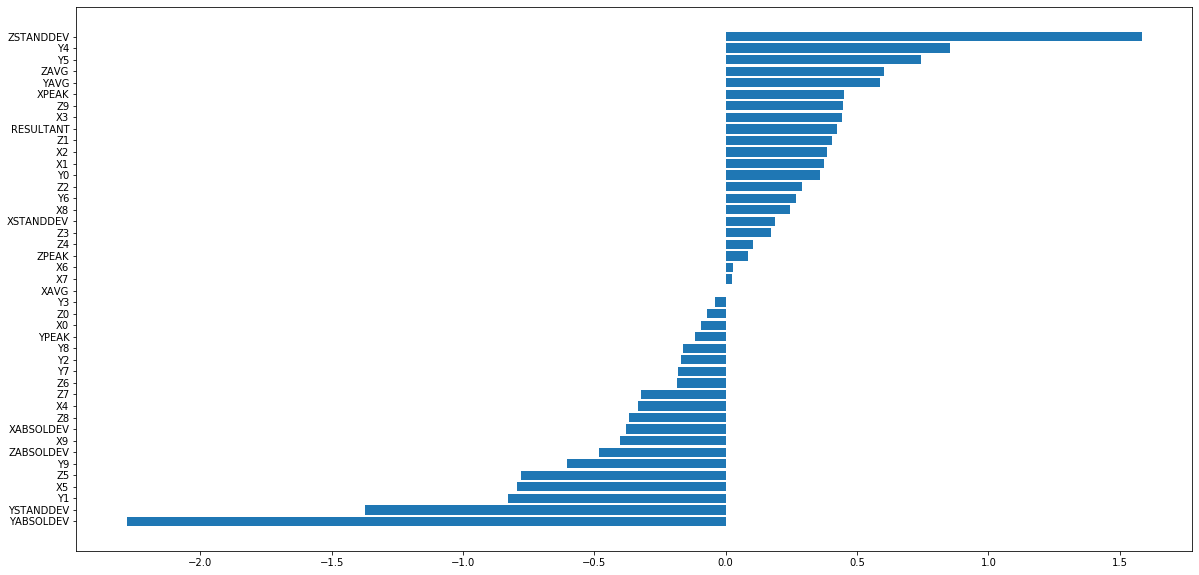

[[12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  4 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


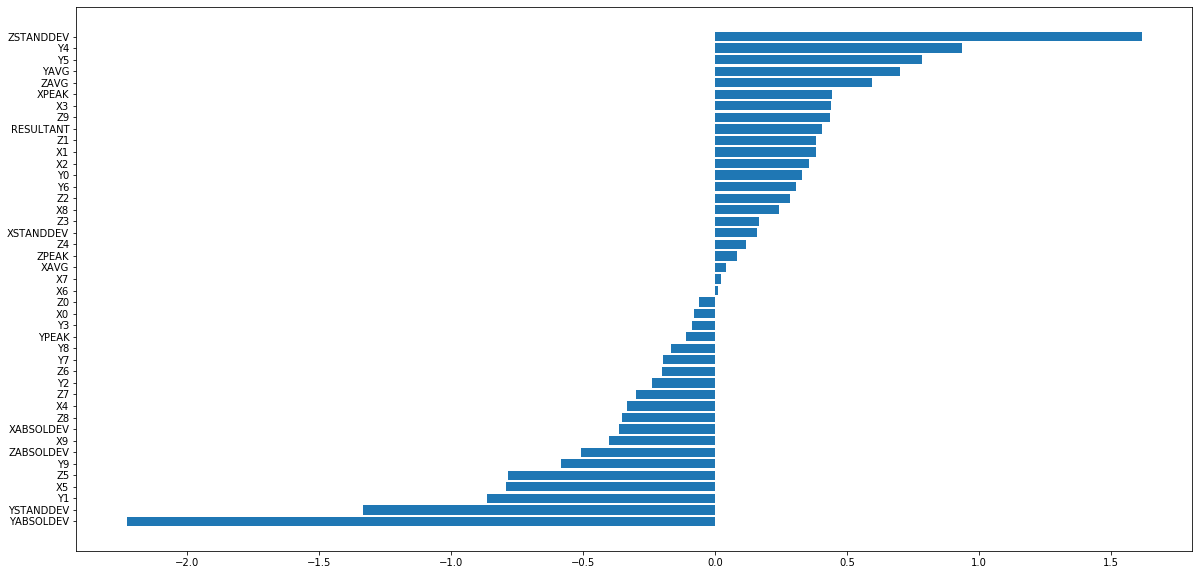

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


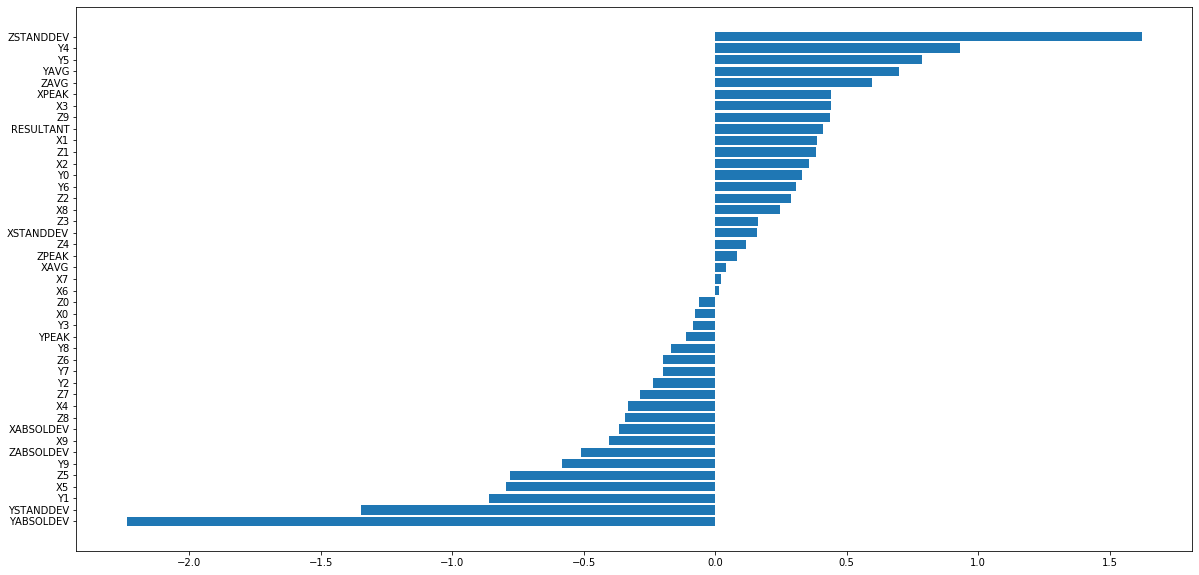

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  8  1  8  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


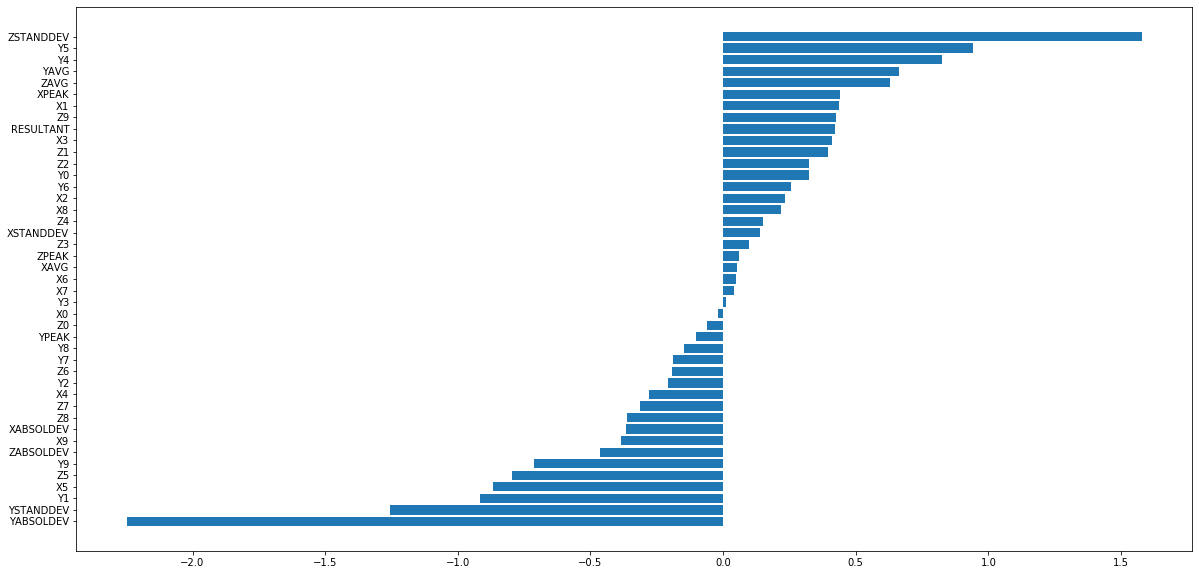

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  7  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


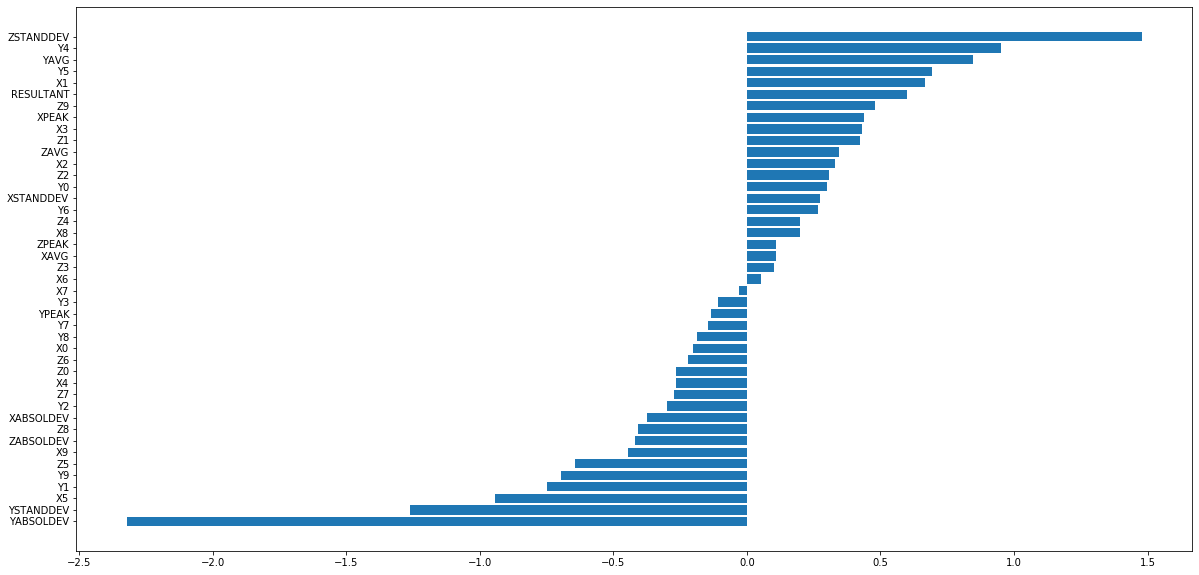

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  9  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  5  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 14  2  0  0  0]
 [30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


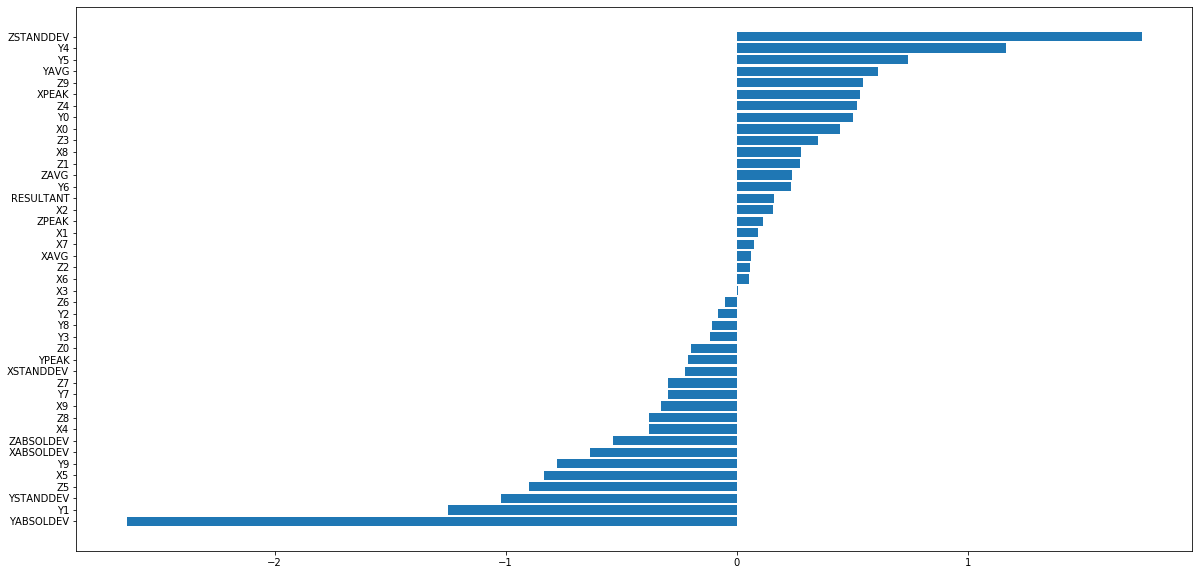

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  6  8  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [16  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


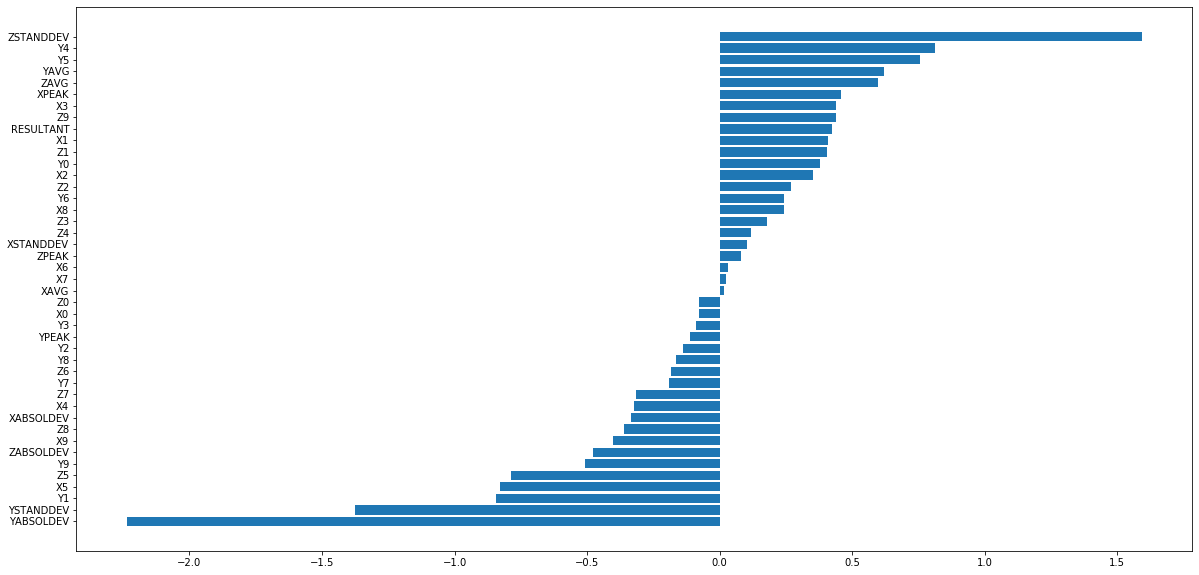

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


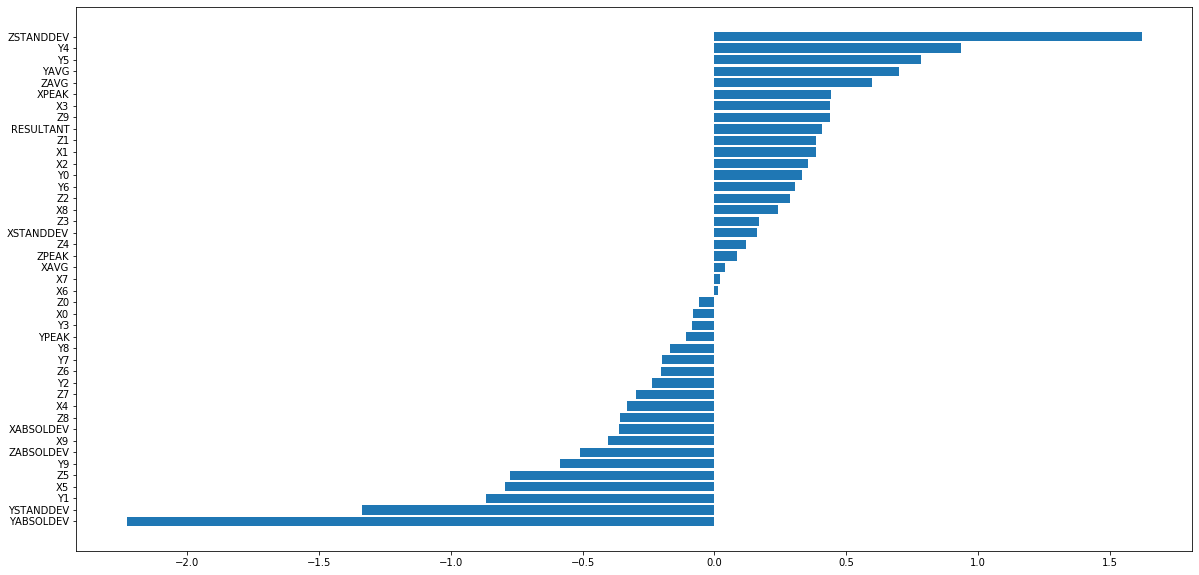

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 9  1  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


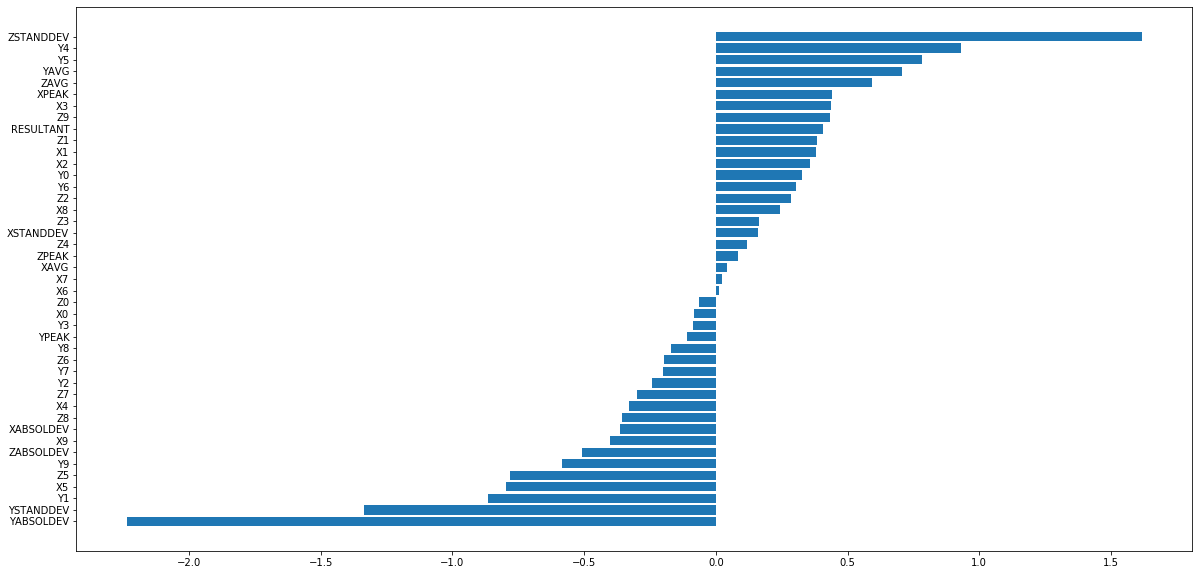

[[12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [15  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


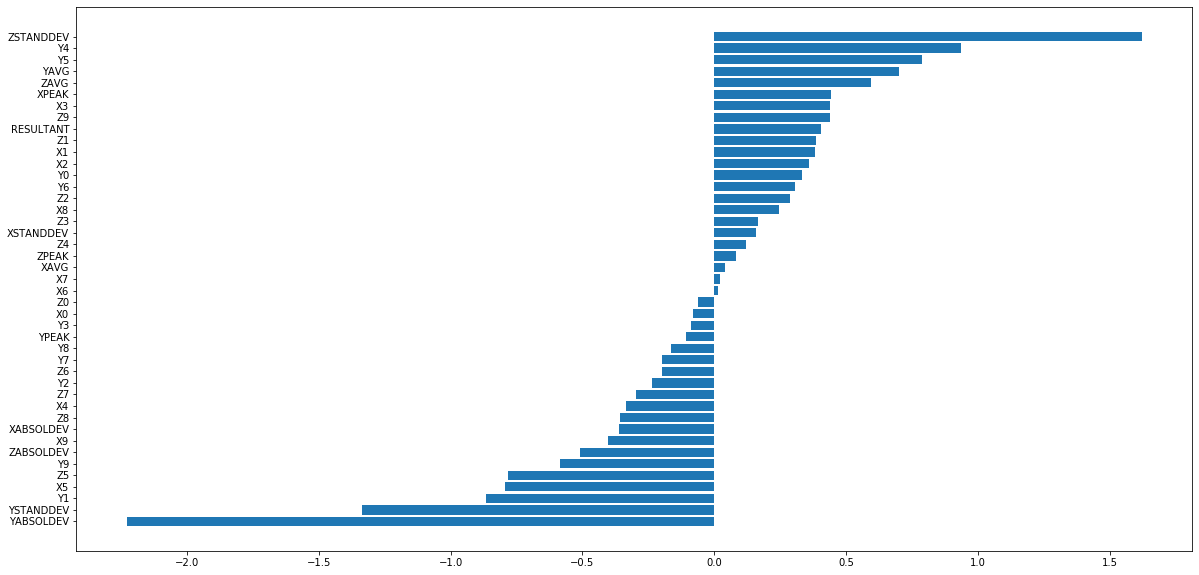

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  2  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [13  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 2  7  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


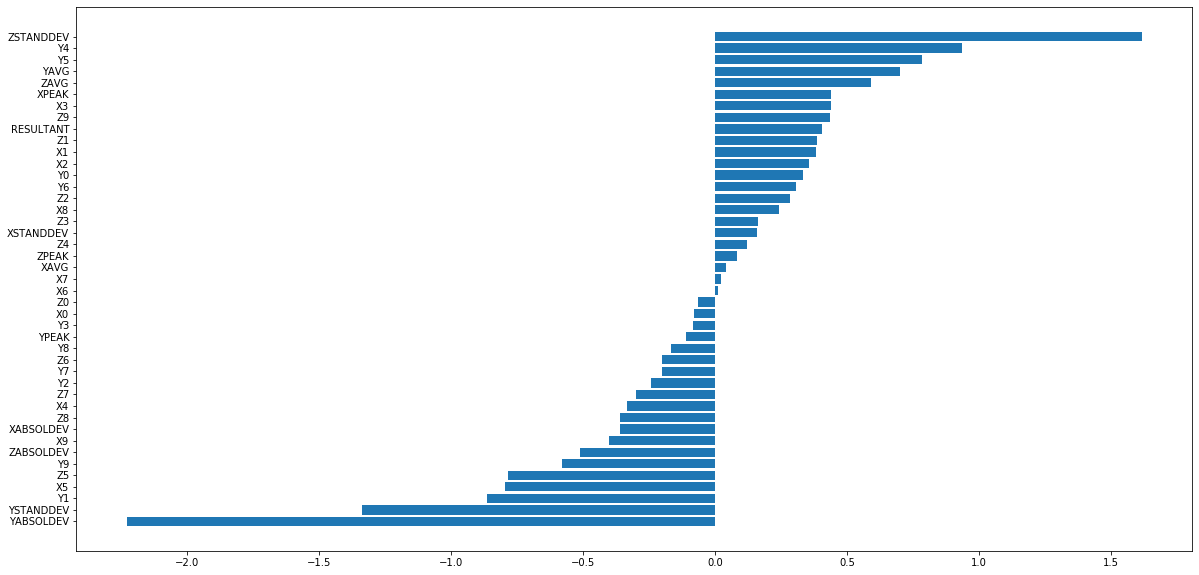

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [15  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


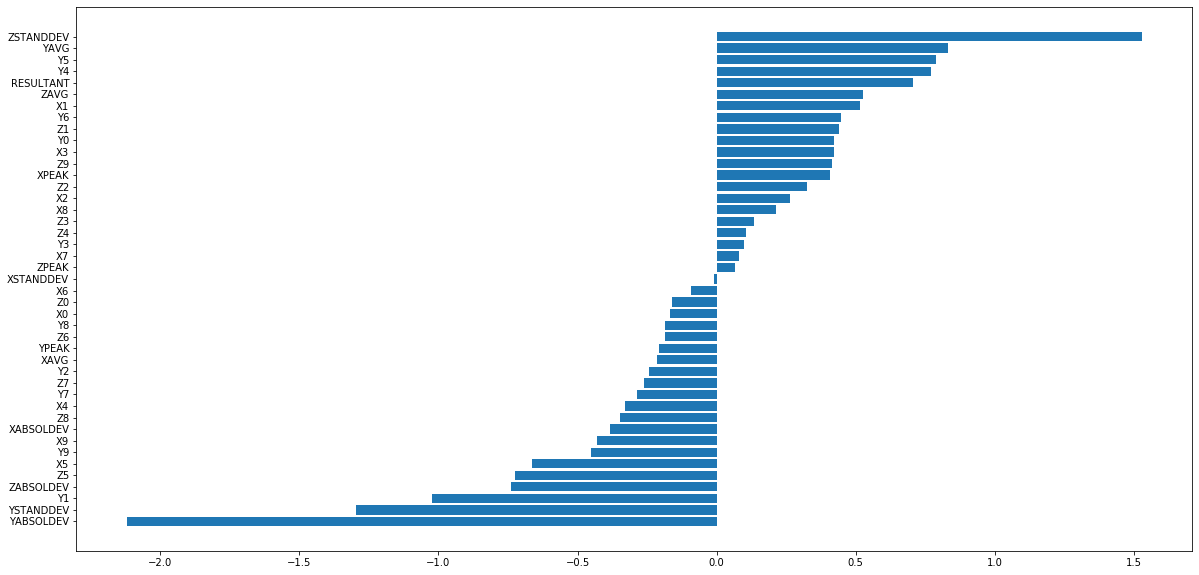

[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  3  8  0  0  0]
 [14  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 11  4  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


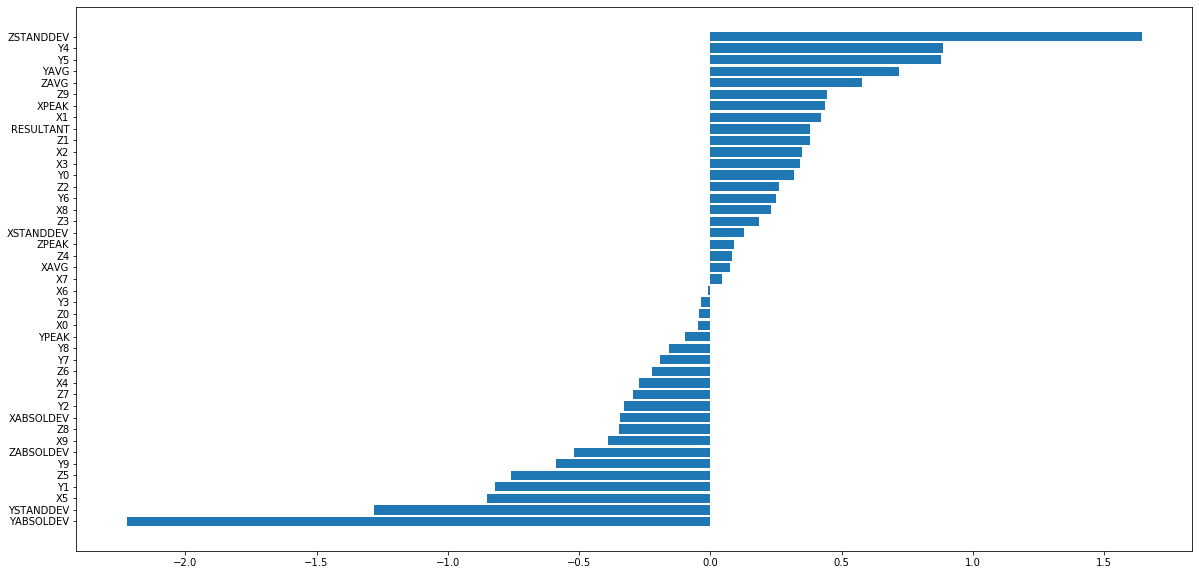

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


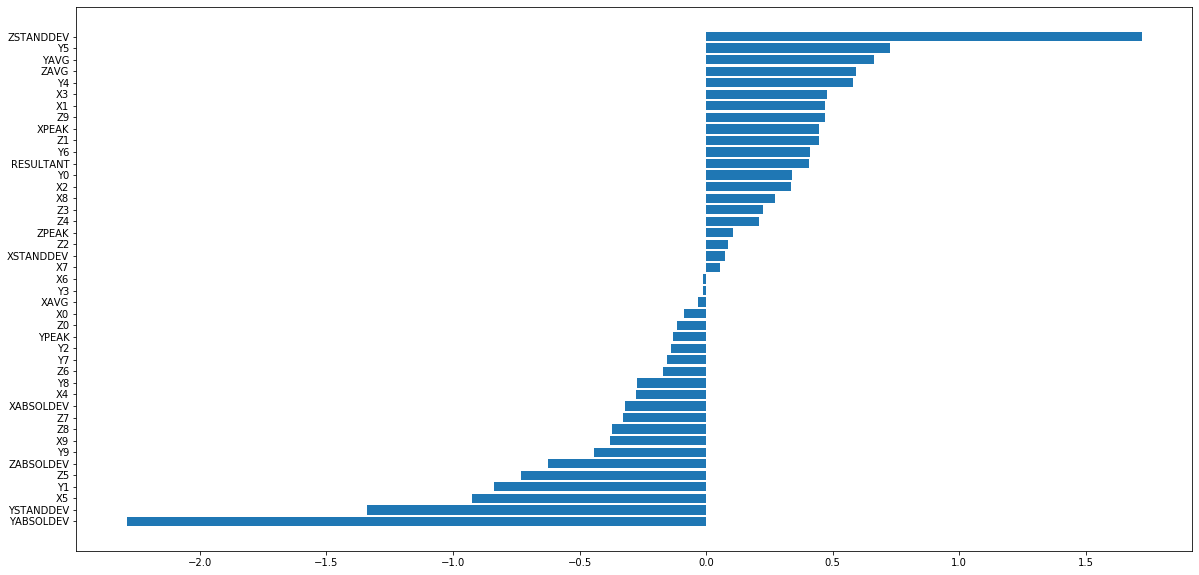

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  3  8  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


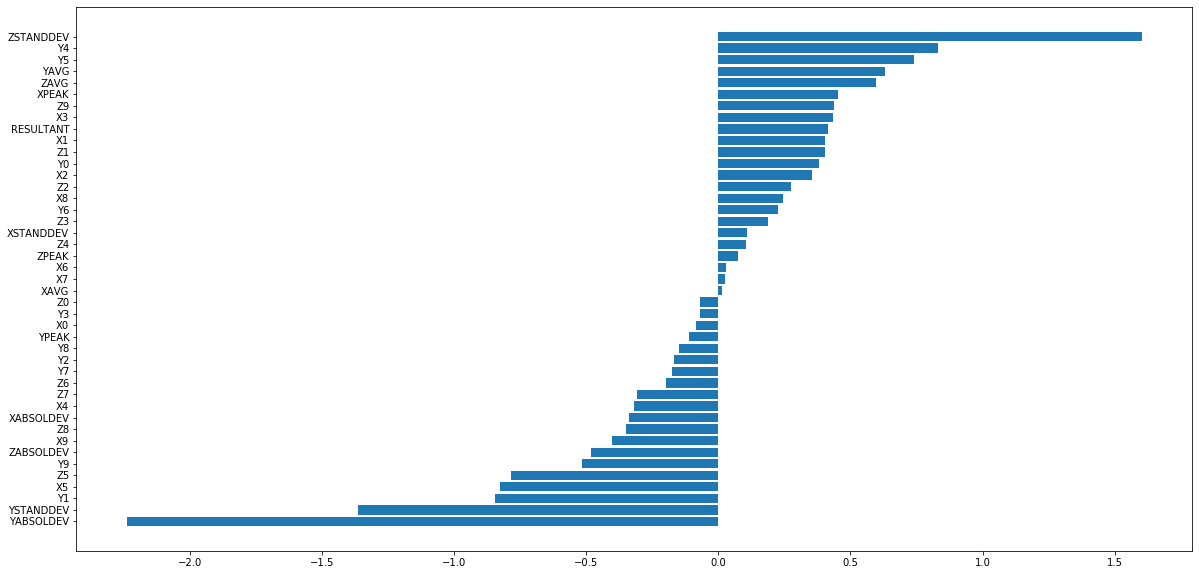

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  2  9  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  1 10  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  5  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


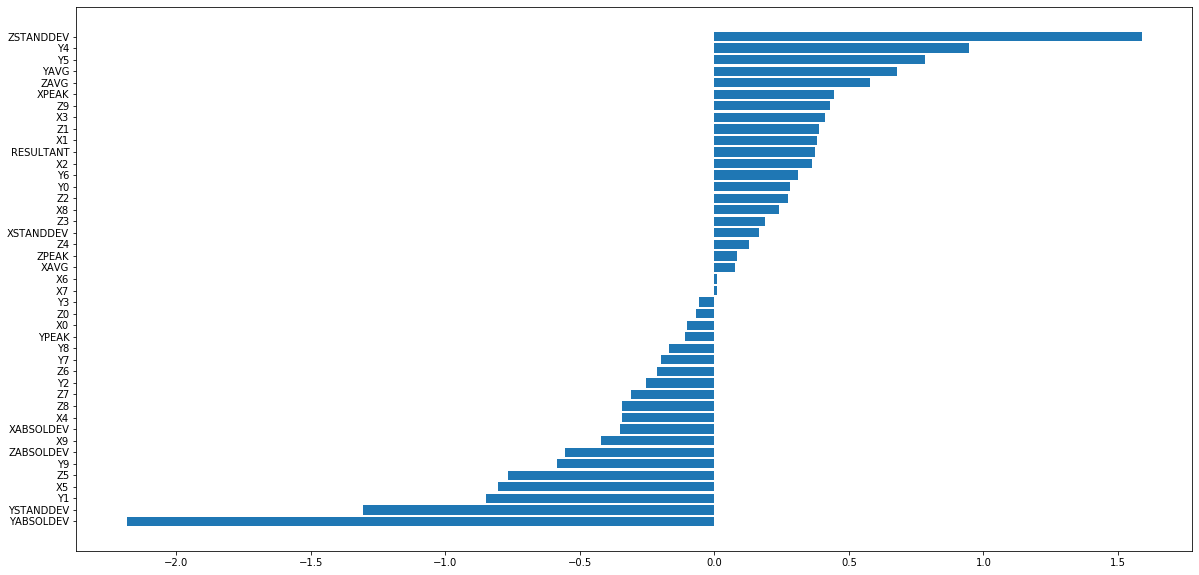

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0]
 [42  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0 29  5  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  1 42  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [25  0  0  0  0  0  0  0  0  0  0  0 14  6  0  0  0]
 [28  0  0  0  0  0  0  0  0  0  0  0  0 13  3  0  0]
 [33  0  0  0  0  0  0  0  0  0  0  0  3  0  9  0  0]
 [ 8  0  1  0  0  0  0  0  0  0  0  0 12 22  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0 11 21  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  2  3 34  0  0]]
              precision    recall  f1-score   support

           0       0.19   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


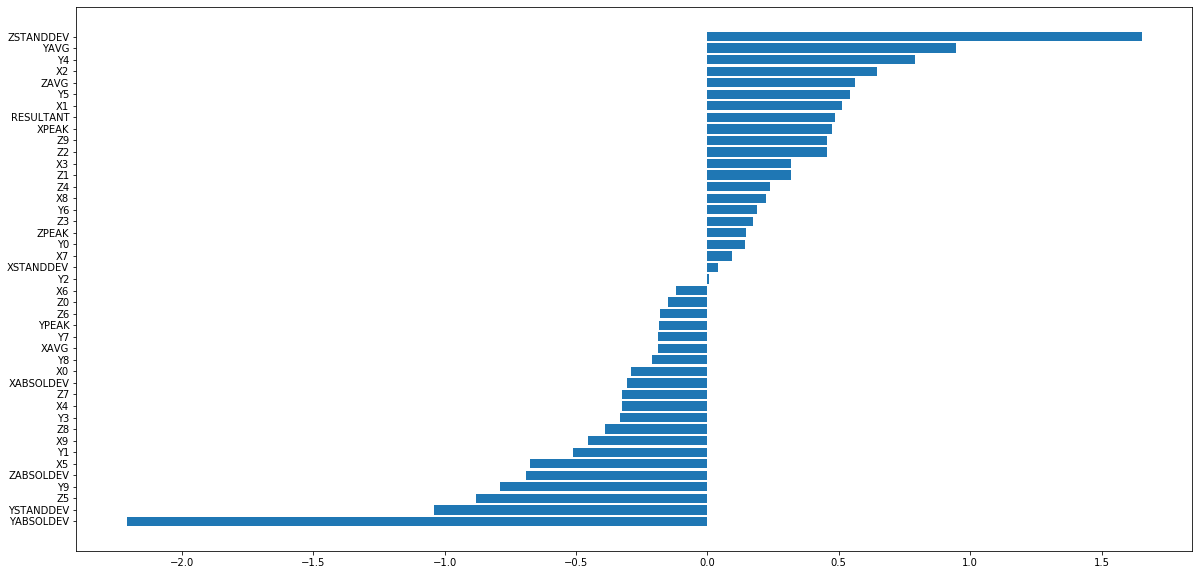

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 42  0  0  0  0]
 [33  0  6  0  0  0  0  0  0  0  0  0  2  4  0  0  0  0]
 [18  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [31  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [36  0  5  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [26  0  8  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [27  0  5  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [12  0 25  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [25  0  8  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [27  0  5  0  0  0  0  0  0  0  0  0  1 12  0  0  0  0]
 [36  0  0  0  0  0  0  0  0  0  0  0  1  8  0  0  0  0]
 [32  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0]
 [26  0  6  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


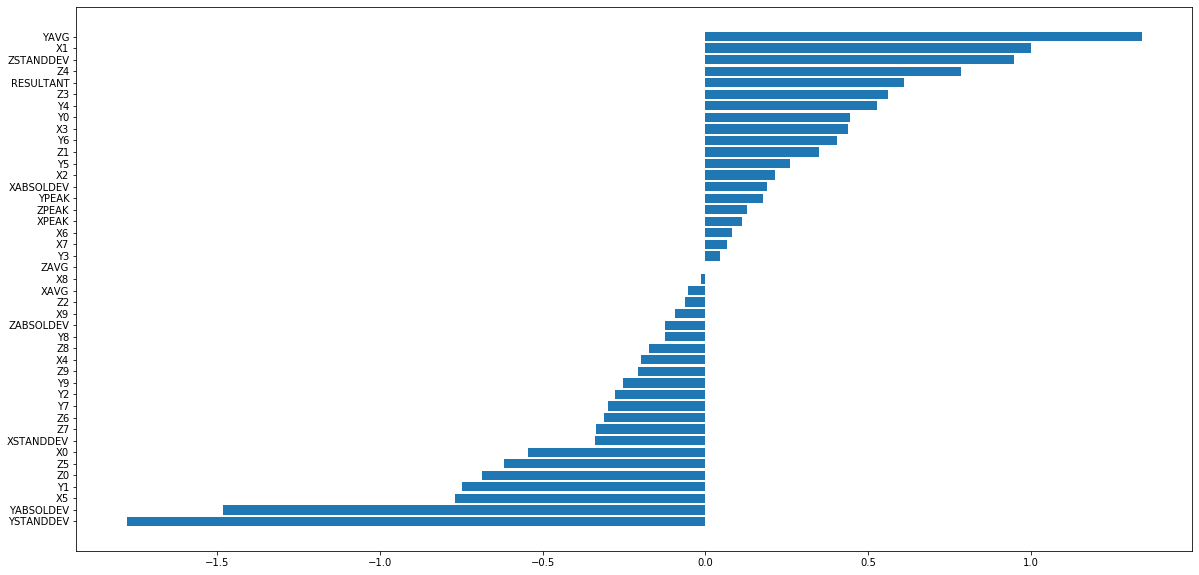

[[14 28  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 43  1  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [34  0  3  0  0  0  0  0  0  0  0  0  5  2  0  0  0]
 [16  0 10  0  0  0  0  0  0  0  0  0 10  9  0  0  0]
 [23  0  7  0  0  0  0  0  0  0  0  0 13  2  0  0  0]
 [24  0  0  0  0  0  0  0  0  0  0  0 11  9  0  0  0]
 [21  0 11  0  0  0  0  0  0  0  0  0  7  6  0  0  0]
 [14  0  1  0  0  0  0  0  0  0  0  0 30  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  1 37  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 37  0  0  0]
 [40  0  2  0  0  0  0  0  0  0  0  0  1  1  0  0  0]
 [30  0  1  0  0  0  0  0  0  0  0  0  8  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]]
              precision    recall  f1-score   support

           0       0.04   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


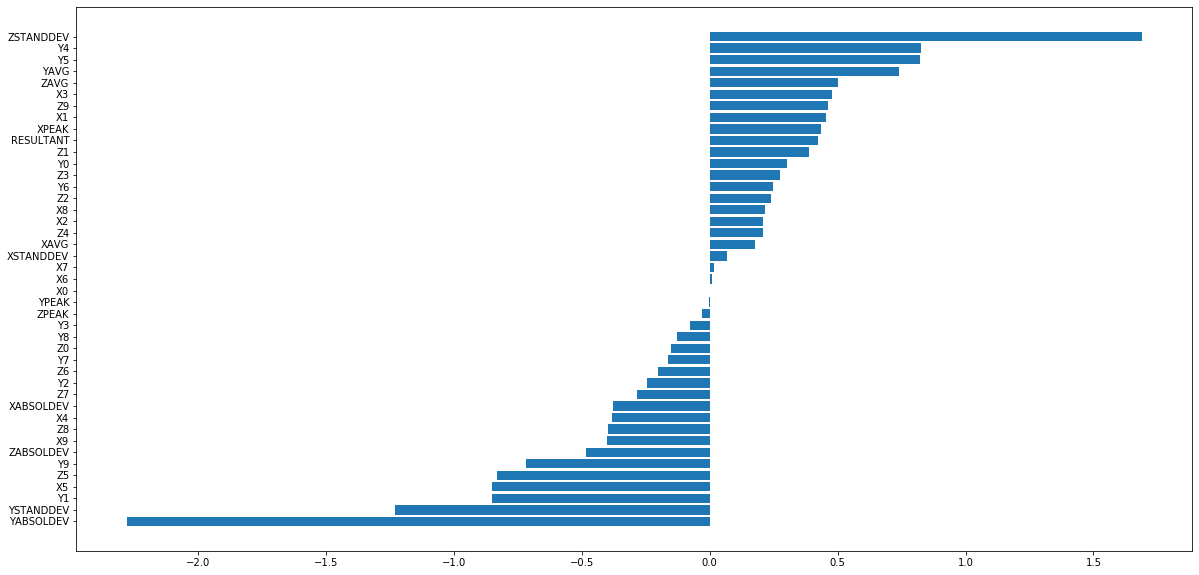

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [30 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 41  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 29 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12 32  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  2 40  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 43  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 26 18  0  0  0]
 [30  0  0  0  0  0  0  0  0  0  0  0  0 14  1  0  0  0]
 [16  0  4  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0]
 [30  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


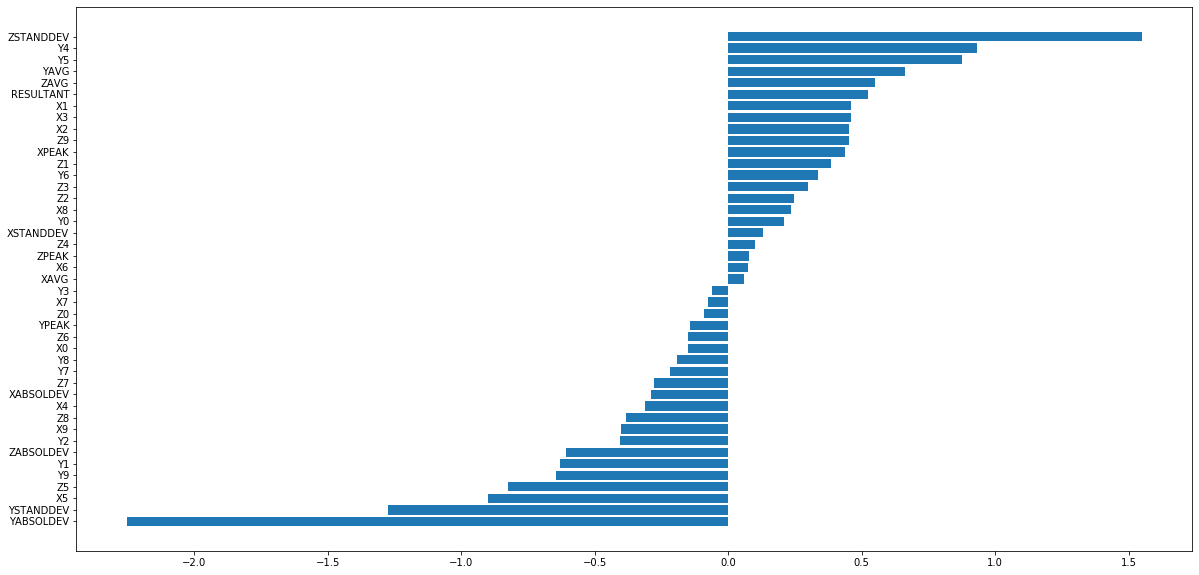

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  4 12  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


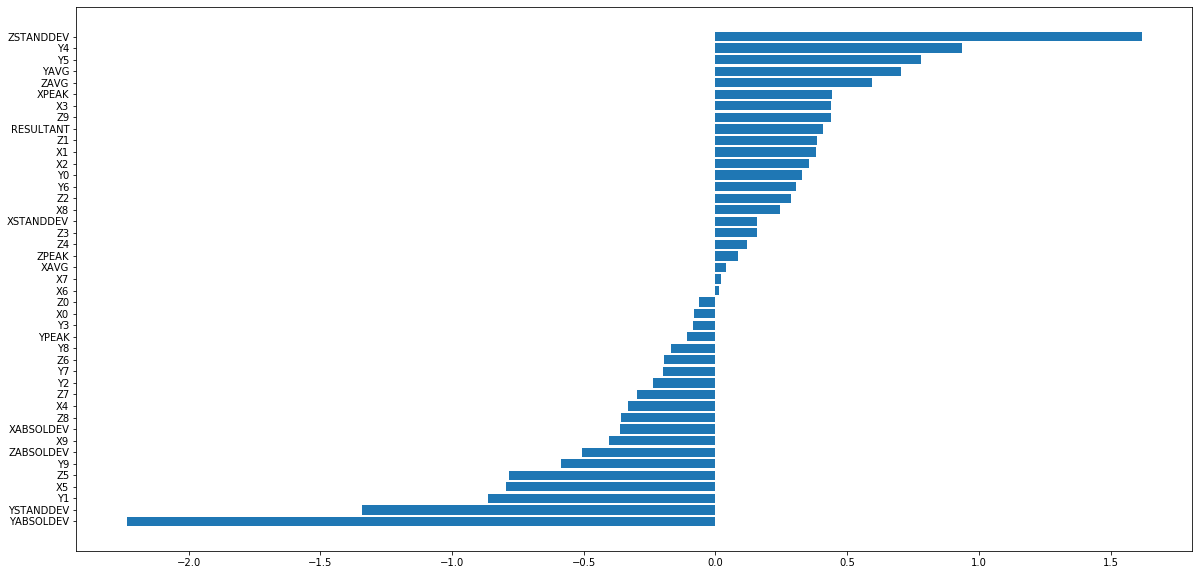

[[15  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 11  0  2  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [25  0  0  0  0  0  0  0  0  0  0  0  4  1  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.07      0.83      0.12        18
           1       0.00      0.00      0.00        18
           2       0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1643:


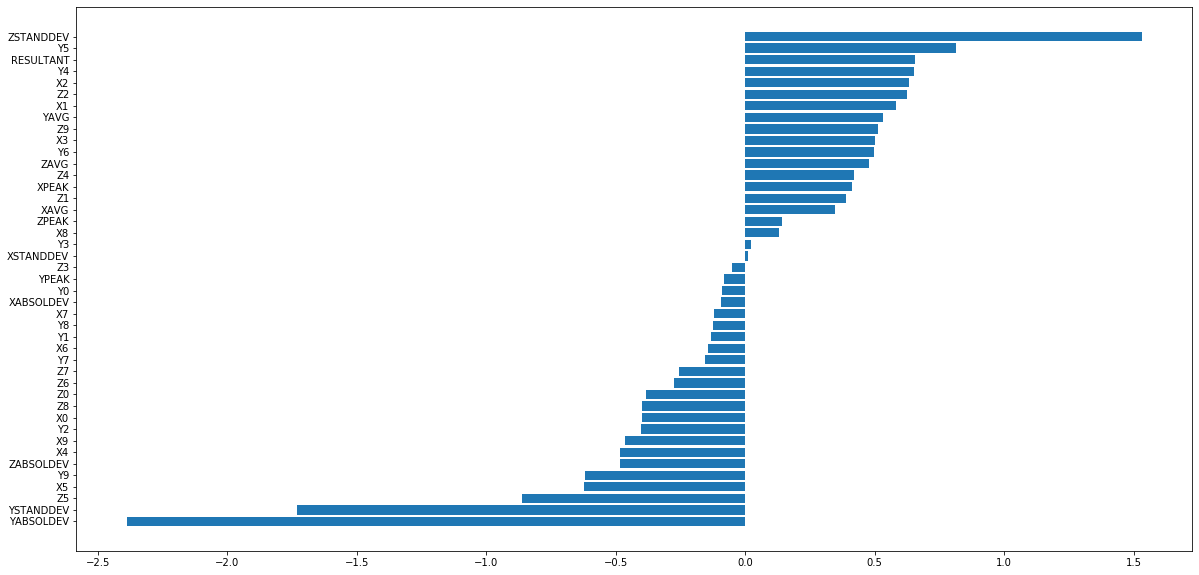

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  1  4  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  6  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1644:


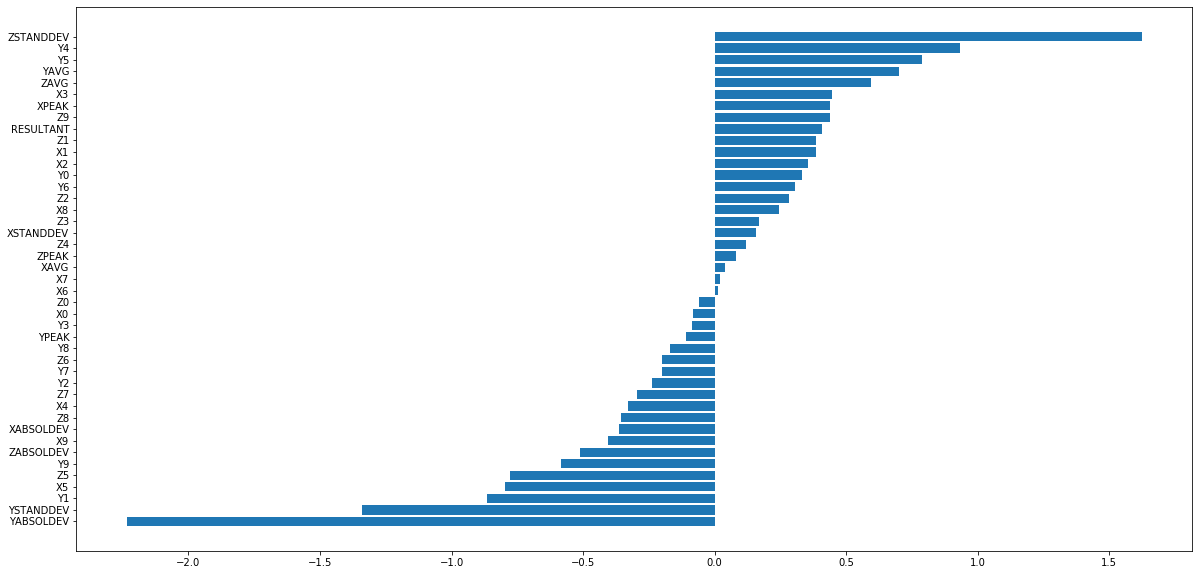

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  1  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  3  9  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  7  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


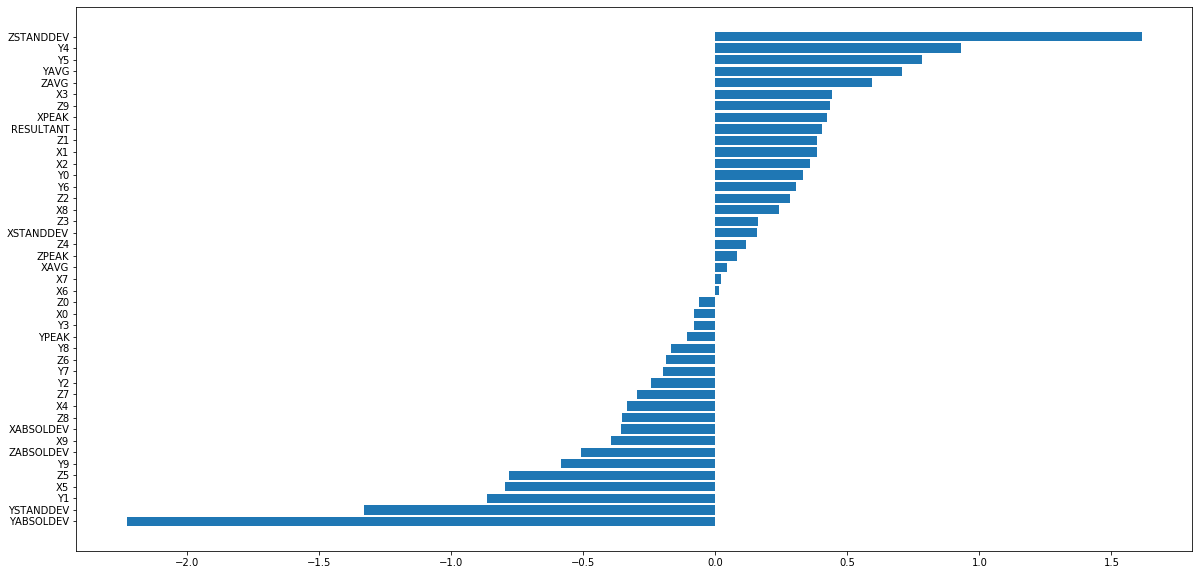

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  1  0  0  0  0  0  0  0  0  0  0  5 11  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  7  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  1  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [10  1  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


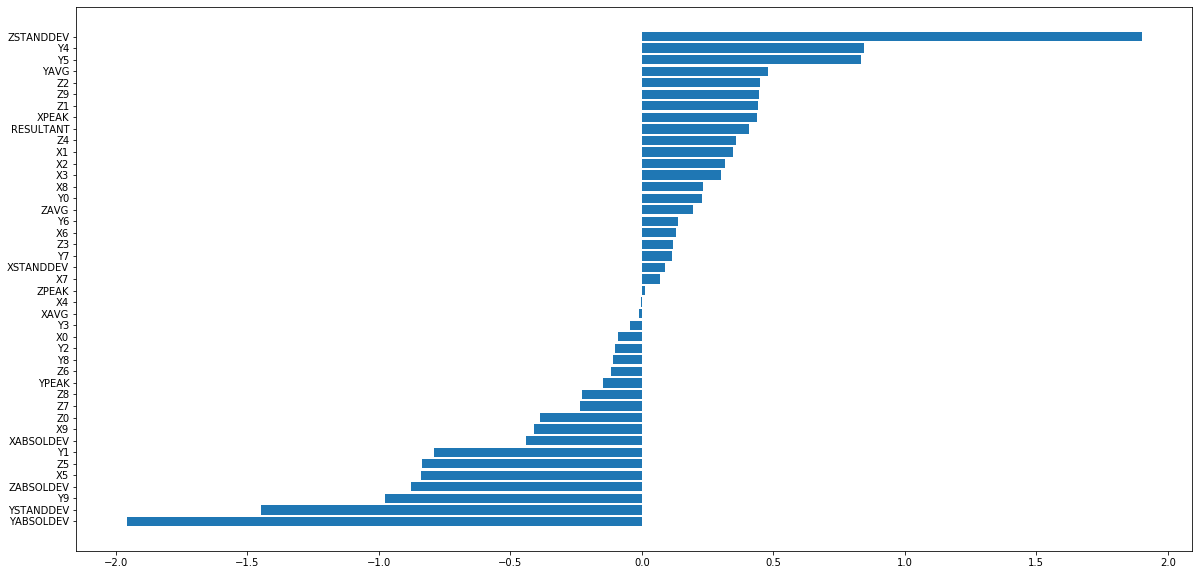

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1647:


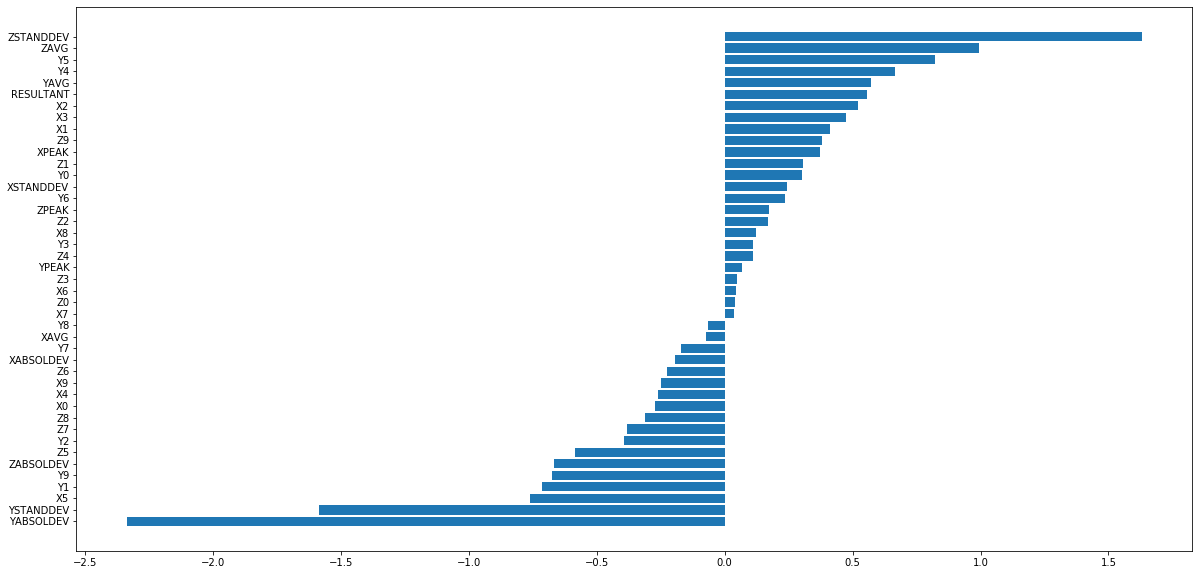

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  1  0  8  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


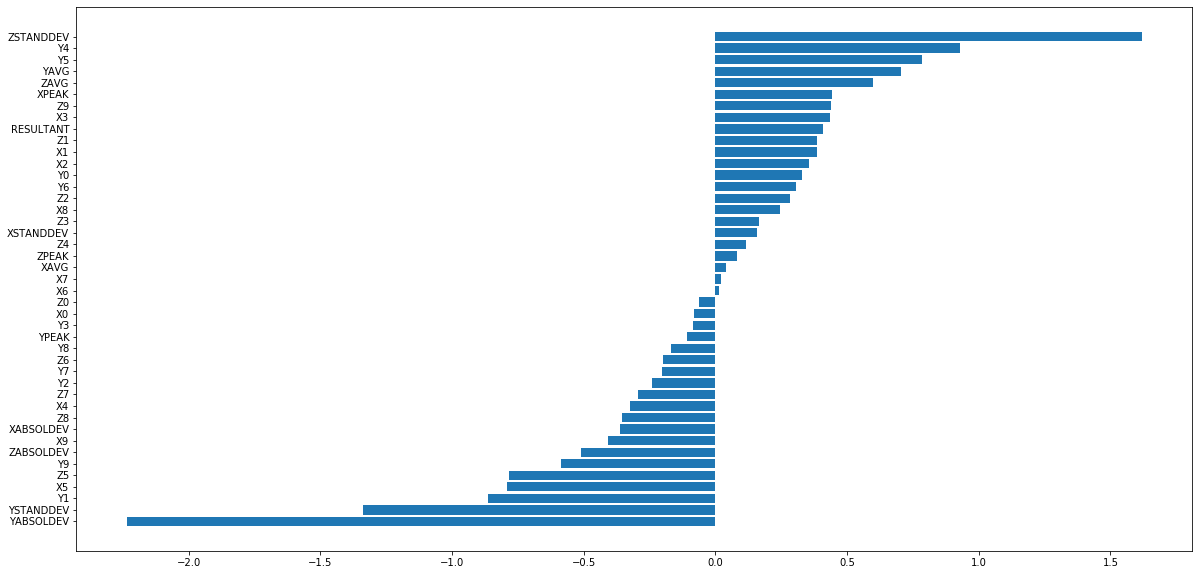

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 10  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


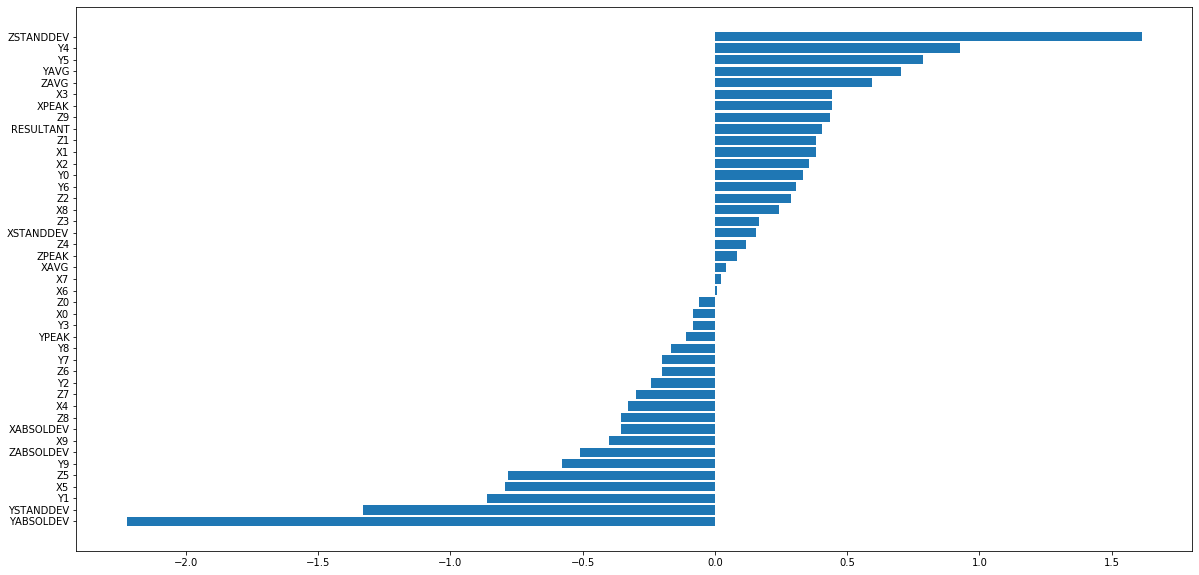

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 8  1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


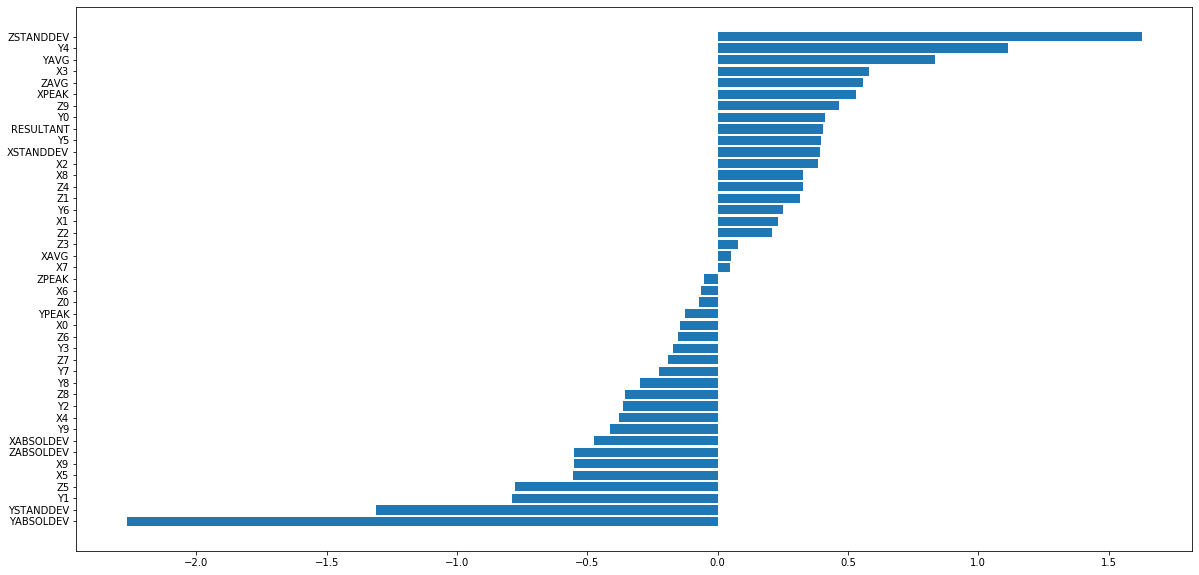

[[ 9  0  0  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  1  0 13  0  0  0]
 [ 4  0  1  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 12  0  2  0  0  0]
 [ 9  0  1  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  2  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 3  4  0  0  0  0  0  0  0  0  0  0  1 10  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(17281, 93)
[1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650]
Subject ID 1600:


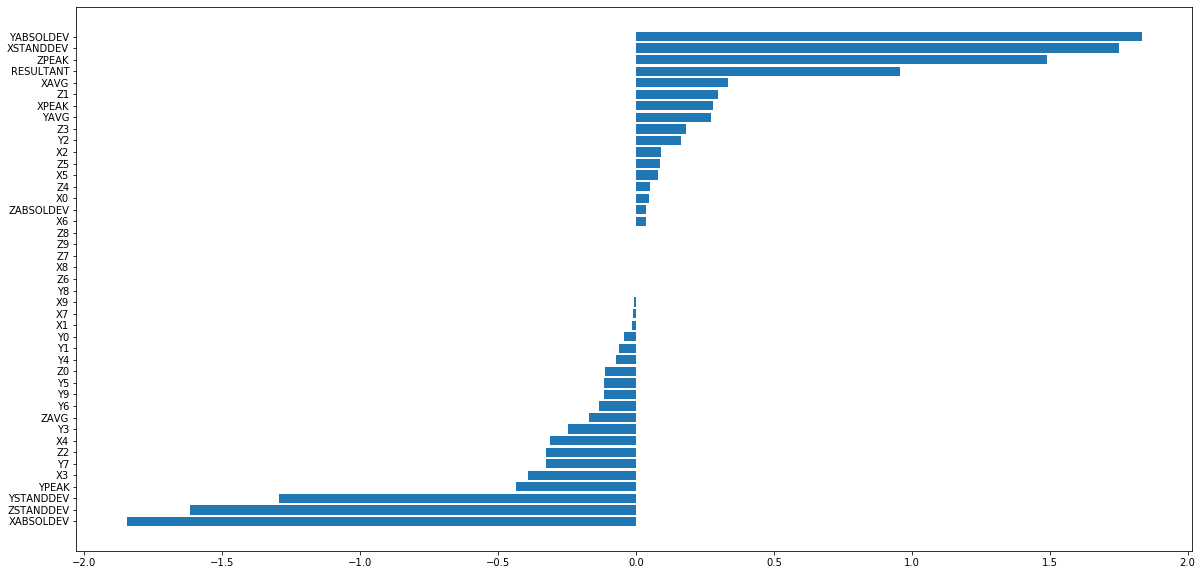

[[ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  2  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  8  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  6

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


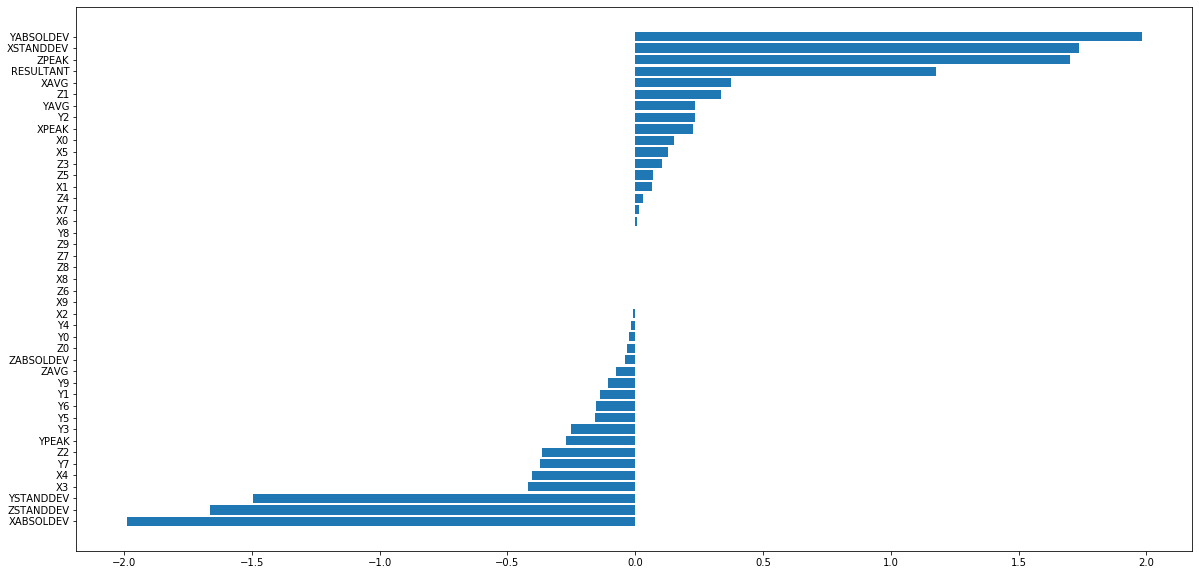

[[ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


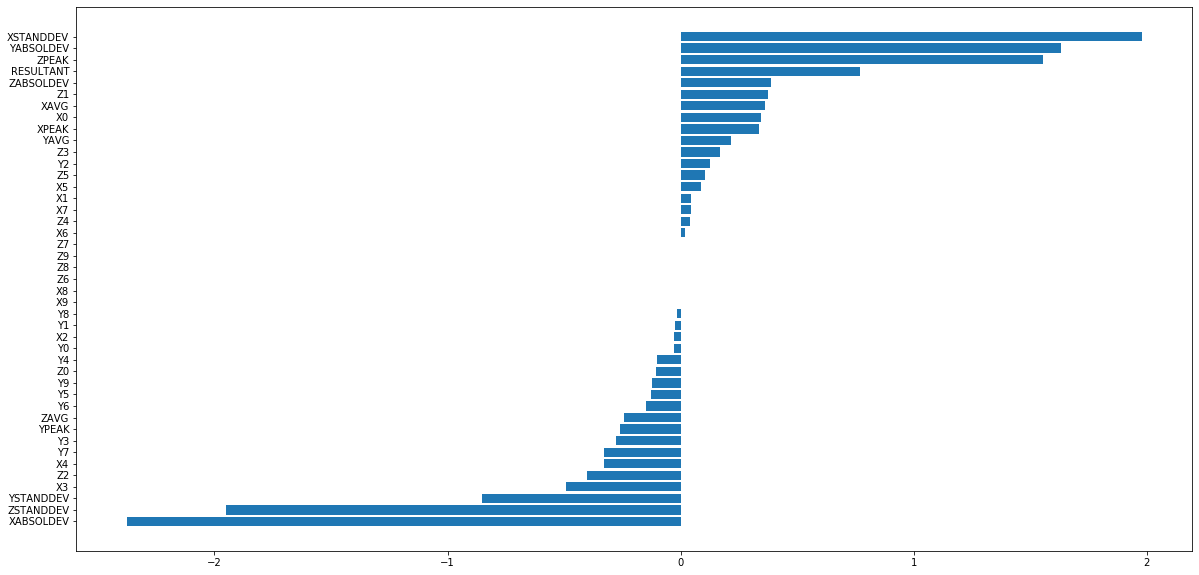

[[ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 15  0  0  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  4  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


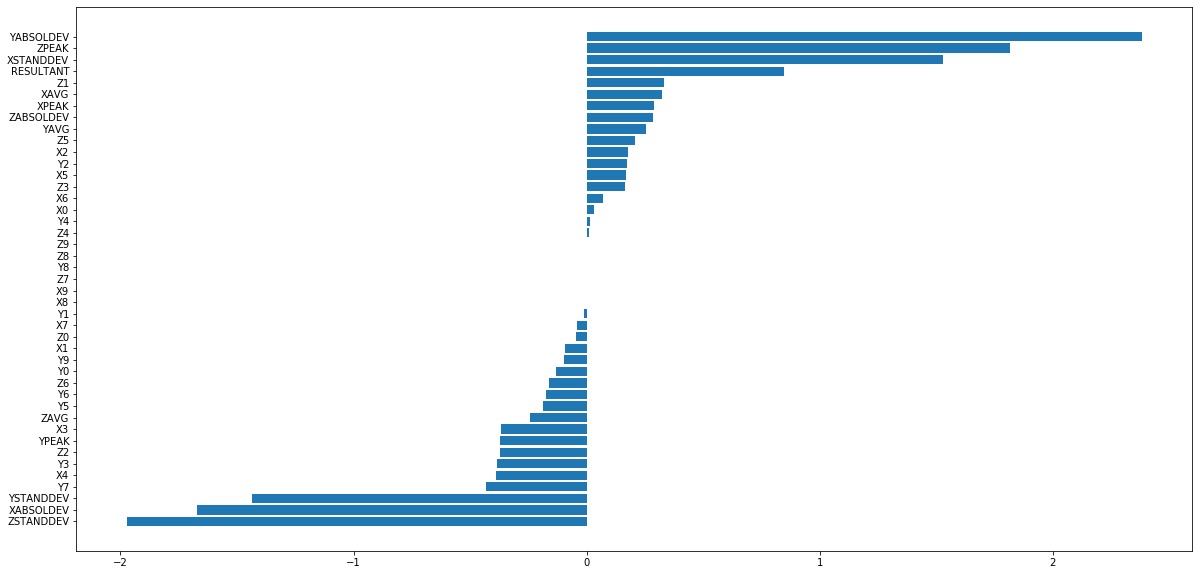

[[ 0  0  0  0  0  0  4  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  4  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 19  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  1  0  0  0  3]
 [ 0  0  0  0  0  0 21  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  2  0  0  0  3  0  0  0  2]
 [ 0  0  0  0  0  0 19  0  0  1

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Subject ID 1604:


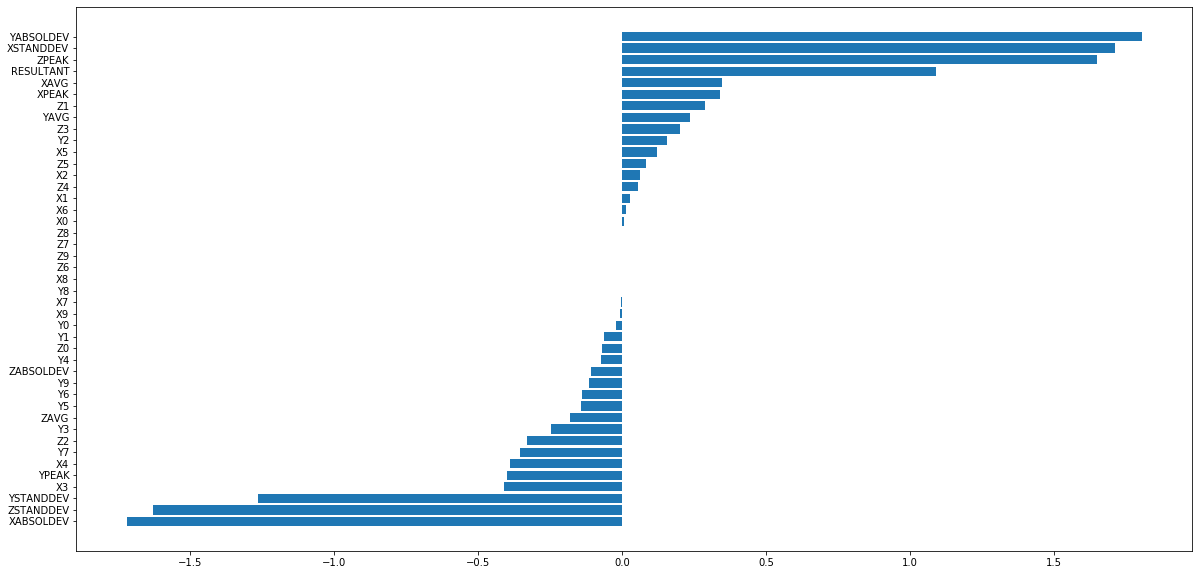

[[ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  3

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


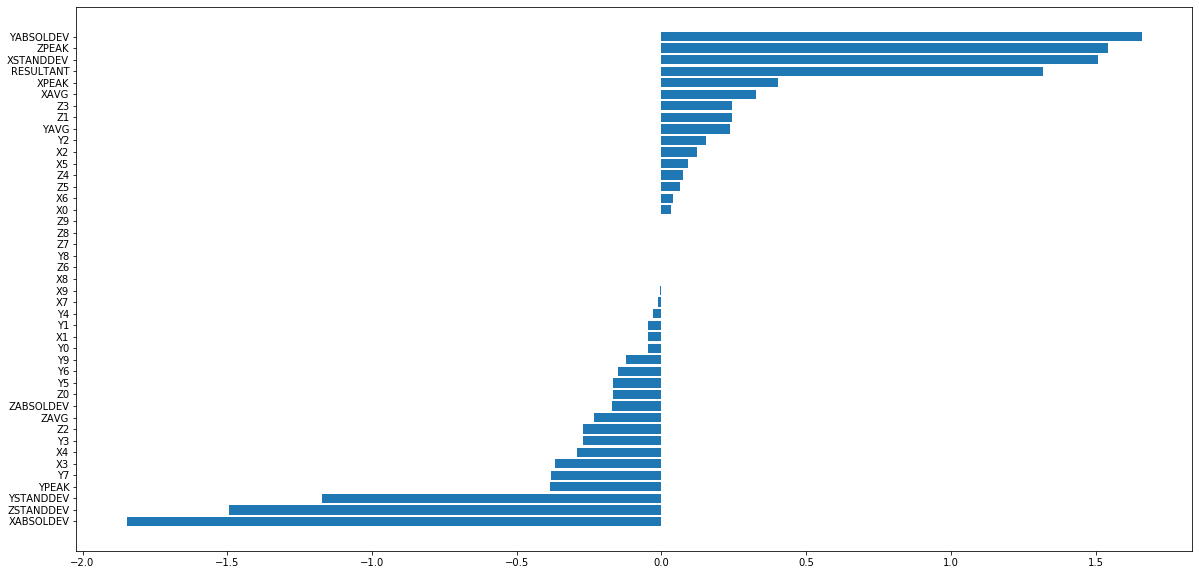

[[ 0  0  0  0  0  0 21  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


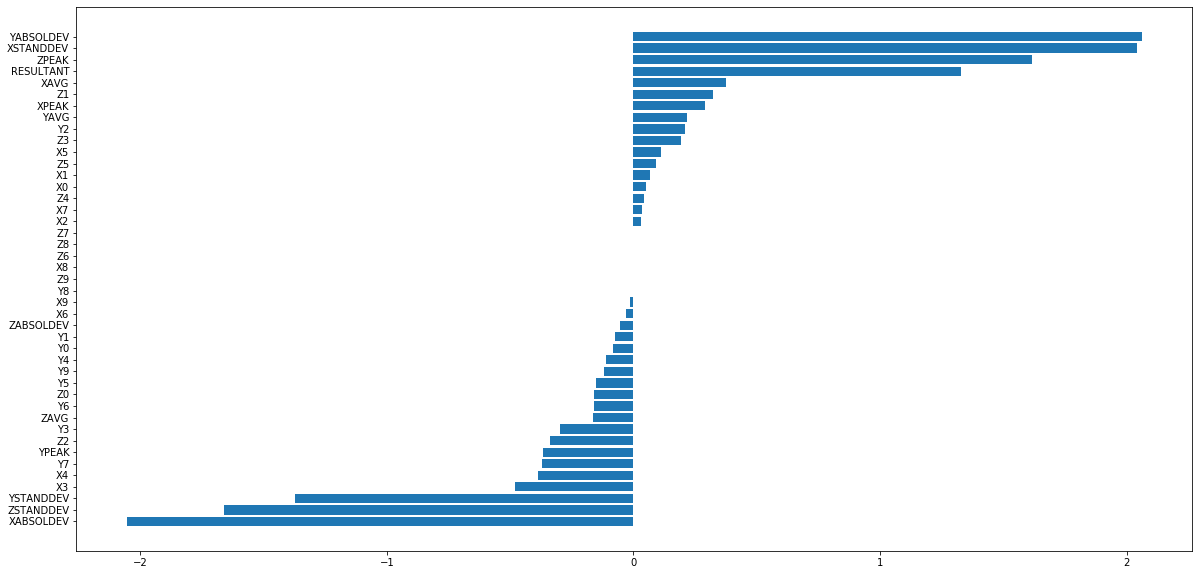

[[ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  1  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


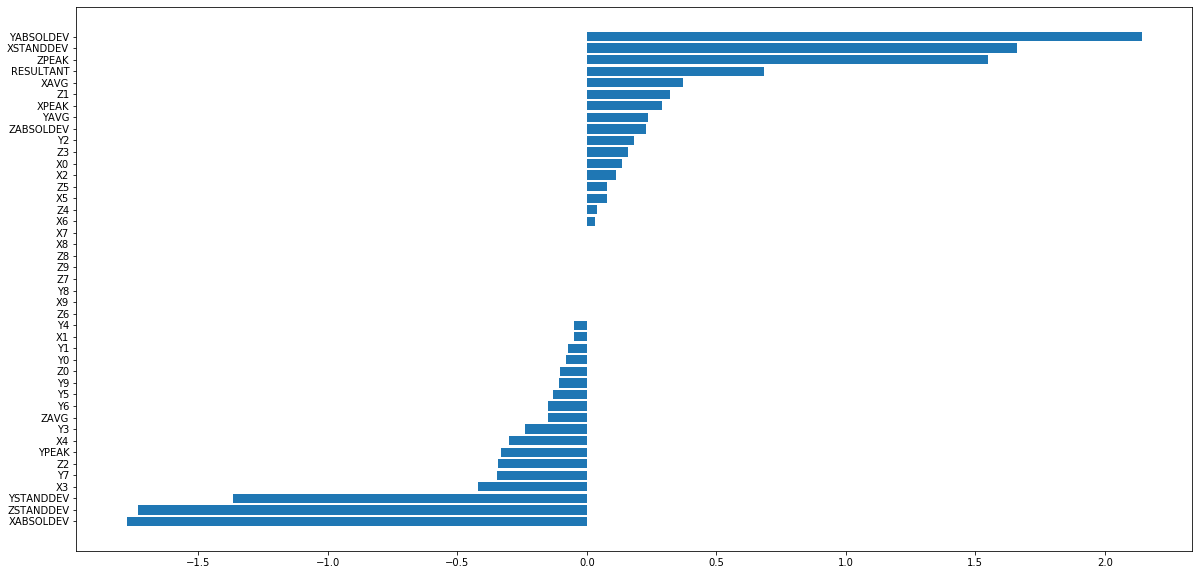

[[ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Subject ID 1608:


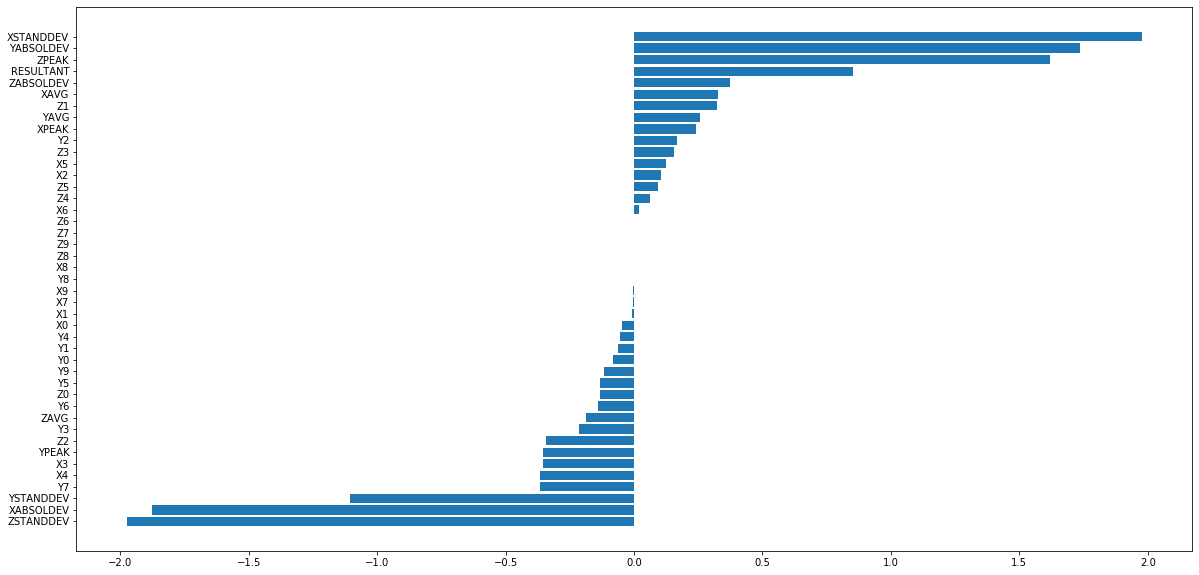

[[ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


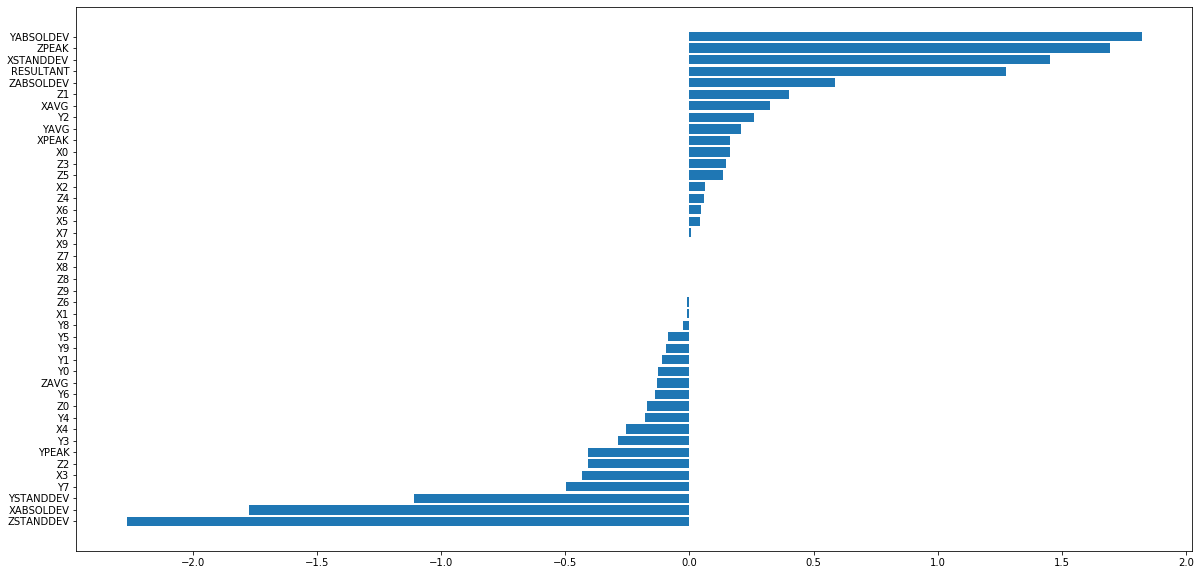

[[ 0  0  0  0  0  0 15  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00   

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


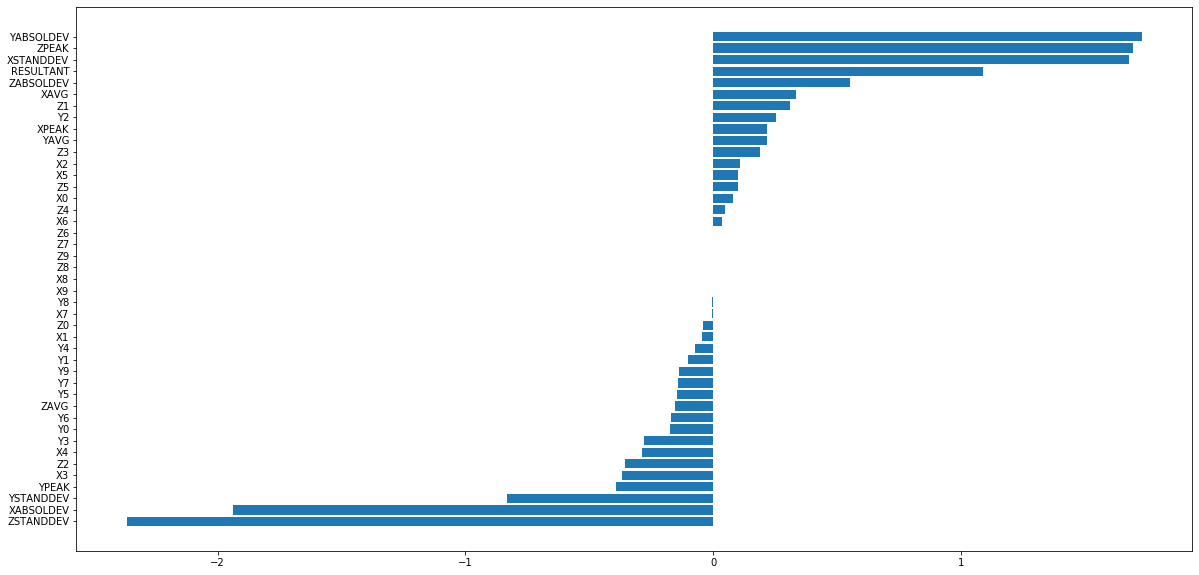

[[ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  8  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


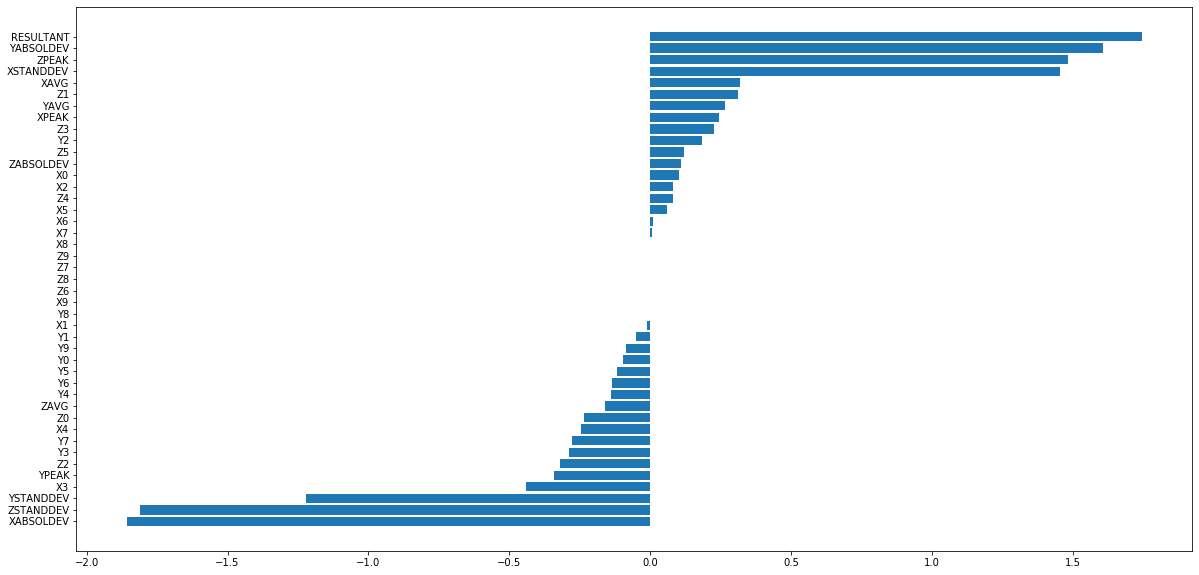

In [ ]:
#Loop for taking each dataset in sequence
for fileindex,filelist in enumerate(files):
    overall_acc_dic = {}
    overall_precision_dic = {}
    overall_recall_dic = {}
    overall_f1_dic = {}
    scaler = StandardScaler()
    le = preprocessing.LabelEncoder()
    data = pd.concat( [ pd.read_csv(csvfile) for csvfile in filelist ] )
    print(data.shape)
    
    #Get all the subject id list
    subject_id_list = list(set(data.loc[:, "class"]))
    print(subject_id_list)
    
    accuracies = []
    
    #For each subject id and apply LOSO for that subject id
    for subject_id in subject_id_list:
        train_data = data[data["class"]!=subject_id]
        test_data = data[data["class"]==subject_id]
        #print(test_data.shape)

        #Select only the 43 features
        X1_train = train_data.loc[:, "X0":"ZSTANDDEV"]
        X2_train = train_data.loc[:, 'RESULTANT']   
        y_train = train_data.loc[:, "ACTIVITY"]
        #y_train = train_data[:, -1]


        X1_test = test_data.loc[:, "X0":"ZSTANDDEV"]
        X2_test = test_data.loc[:, 'RESULTANT']   
        y_test = test_data.loc[:, "ACTIVITY"]


        #Use np.column.stack to stack the 43 features
        X_train = np.column_stack((np.array(X1_train),np.array(X2_train)))
        X_train = scaler.fit_transform(X_train)


        X_test = np.column_stack((np.array(X1_test),np.array(X2_test)))
        #X_test = scaler.fit_transform(X_test)

        y_train = le.fit_transform(y_train)
        le_name_mapping = dict(zip(le.transform(le.classes_),le.classes_))
        y_test = le.fit_transform(y_test)

        print("Subject ID %s:"% (subject_id))
        
        #Function to plot feature importance. Removed the code where we column stack only the features which was out put of this function
        svm_feature(X_train,y_train)

        #X_train,y_train = sklearn.utils.shuffle(X_train,y_train,random_state=0)
        
        #Hyperparameter search for the following paramters to train SVM. This is currectly commented as it takes more time
        '''
        param_grid={
        "kernel":('linear', 'rbf','poly','sigmoid'),
              "C": np.logspace(0, 3, 4),
              "degree": np.logspace(-2, 1, 4),
              "coef0": [0.1, 1],
              "gamma": ("auto", "scale")
        }

        #k_fold_model = sklearn.model_selection.StratifiedKFold(10, random_state=0)
        SVC = sklearn.svm.SVC()
        grid_search_cv = sklearn.model_selection.GridSearchCV(SVC, param_grid, cv=2, n_jobs=10)
        grid_search_cv.fit(X_train, y_train)
        print(grid_search_cv.best_params_)
        C_val = grid_search_cv.best_params_['C']
        gamma_val = grid_search_cv.best_params_['gamma']
        coef0_val = grid_search_cv.best_params_['coef0']
        kernel_val = grid_search_cv.best_params_['kernel']
        degree_val = grid_search_cv.best_params_['degree']

        #SVC = sklearn.svm.SVC()
        #clf = svm.SVC(kernel='linear')
        '''

        #Commented the SVM training with hyperparameter search results
        #clf = svm.SVC(C=C_val, coef0=coef0_val, degree=degree_val, gamma=gamma_val, kernel=kernel_val)
        
        #Using SVM linear
        clf = svm.SVC(kernel='linear')

        clf.fit(X_train,y_train)

        y_pred = clf.predict(X_test)

        #Print the confusion matrix
        cf = sklearn.metrics.confusion_matrix(y_test, y_pred)
        print(cf)
        
        #print the classification report
        print(classification_report(y_test, y_pred))
        
        #Compute the score information for each activity
        labels=list(set(y_pred))
        label_acc_dic = {}
        label_precision_dic = {}
        label_recall_dic = {}
        label_f1_dic = {}
        i = 0
        for label in labels:
            #print(label)
            TP, FP, FN, TN = calculate_cf(cf, i, to_print=True)
            #print(le_name_mapping[label])
            decode_label = le_name_mapping[label]
            actual_class = activity_names[decode_label]
            label_acc_dic[decode_label] = ((TP+TN)/(TP+FP+FN+TN))*100
            if TP != 0:
                label_precision_dic[decode_label] = (TP)/(TP+FP)
                label_recall_dic[decode_label] = (TP)/(TP+FN)
                label_f1_dic[decode_label] = (TP)/(TP+ (0.5 *(FP+FN)))
            else:
                label_precision_dic[decode_label] = 0
                label_recall_dic[decode_label] = 0
                label_f1_dic[decode_label] = 0
            i +=1

        #Get the accuracy score for the LOSO validation for that subject ID
        acc = sklearn.metrics.accuracy_score(y_test, y_pred)
        accuracies.append((acc*100))
        
        #Print the accuracy, precision, recall and f1-measure for each acitivity
        print("Subject ID %s: %.2f%%"% (subject_id,(acc*100)))
        t = PrettyTable(['Class', 'Accuracy', 'Precision', 'Recall', 'F1-Measure'])
        for activity in dict(sorted(label_acc_dic.items())):
            t.add_row([activity_names[activity],str(str(round(label_acc_dic[activity],2))+"%"),round(label_precision_dic[activity],2),round(label_recall_dic[activity],2),round(label_f1_dic[activity],2)])
            #List the scores for each subject to find the overall scores
            if activity in overall_acc_dic:
                temp_acc_list = overall_acc_dic[activity]
                temp_pre_list = overall_precision_dic[activity]
                temp_re_list = overall_recall_dic[activity]
                temp_f1_list = overall_f1_dic[activity]
                overall_acc_dic[activity] = temp_acc_list + [round(label_acc_dic[activity],2)]
                overall_precision_dic[activity] = temp_pre_list + [round(label_precision_dic[activity],2)]
                overall_recall_dic[activity] = temp_re_list + [round(label_recall_dic[activity],2)]
                overall_f1_dic[activity] = temp_f1_list + [round(label_f1_dic[activity],2)]
            else:
                #print(type(overall_acc_dic))
                overall_acc_dic[activity] = [round(label_acc_dic[activity],2)]
                overall_precision_dic[activity] = [round(label_precision_dic[activity],2)]
                overall_recall_dic[activity] = [round(label_recall_dic[activity],2)]
                overall_f1_dic[activity] = [round(label_f1_dic[activity],2)]

        #Print the table of scores for each activity for a subject
        print(t)
    
    #Print Overall accuracy
    accuracy = sum(accuracies)/len(accuracies)
    print(accuracy)
    
    #Compute the average scores for overall subjects
    for key in overall_acc_dic:
        sum_acc_key = 0
        temp_list = overall_acc_dic[key]
        for i in temp_list:
            sum_acc_key += i
        if sum_acc_key != 0:
            overall_acc_dic[key] = round(sum_acc_key/len(temp_list),2)
        else:
            overall_acc_dic[key] = 0
    
    for key in overall_precision_dic:
        sum_precision_key = 0
        temp_list = overall_precision_dic[key]
        for i in temp_list:
            sum_precision_key += i
        if sum_precision_key != 0:
            overall_precision_dic[key] = round(sum_precision_key/len(temp_list),2)
        else:
            overall_precision_dic[key] = 0
    

    for key in overall_recall_dic:
        sum_recall_key = 0
        temp_list = overall_recall_dic[key]
        for i in temp_list:
            sum_recall_key += i
        if sum_recall_key != 0:
            overall_recall_dic[key] = round(sum_recall_key/len(temp_list),2)
        else:
            overall_recall_dic[key] = 0
    
    
    for key in overall_f1_dic:
        sum_f1_key = 0
        temp_list = overall_f1_dic[key]
        for i in temp_list:
            sum_f1_key += i
        if sum_f1_key != 0:
            overall_f1_dic[key] = round(sum_f1_key/len(temp_list),2)
        else:
            overall_f1_dic[key] = 0
    
    
    #Print the overall score for each acitivity
    print("Overall Score for %s"%file_dict[fileindex])
    to = PrettyTable(['Class', 'Accuracy', 'Precision', 'Recall', 'F1-Measure'])
    for activity in dict(sorted(label_acc_dic.items())):
        to.add_row([activity_names[activity],str(str(overall_acc_dic[activity])+"%"),overall_precision_dic[activity],overall_recall_dic[activity],overall_f1_dic[activity]])

    print(to)
    print("-----------------------------------------------------------------------------------------")
